In [187]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import mplhep as hep

hep.style.use('ATLAS')

In [2]:
bins_pT = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 2])
bins_pz = np.array([0.3, 0.5, 0.62, 0.75, 0.88, 1.0, 1.2, 1.5,
                    2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 17.0,
                    20.0, 24.0, 28.0, 34.0, 40.0, 48.0, 56.0,
                    68.0, 80.0])

In [191]:
def unit_vector(vector): # Returns the unit vector of the vector.                                                                                            
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2): # Returns the angle in radians between vectors 'v1' and 'v2'                                                                      
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
beam_direction = (0.0, 0.0, 1.0)

In [3]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

Process 19 masses


In [4]:
pT_arr = []
pz_arr = []

for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr.append(pT)
                    pz_arr.append(pz)

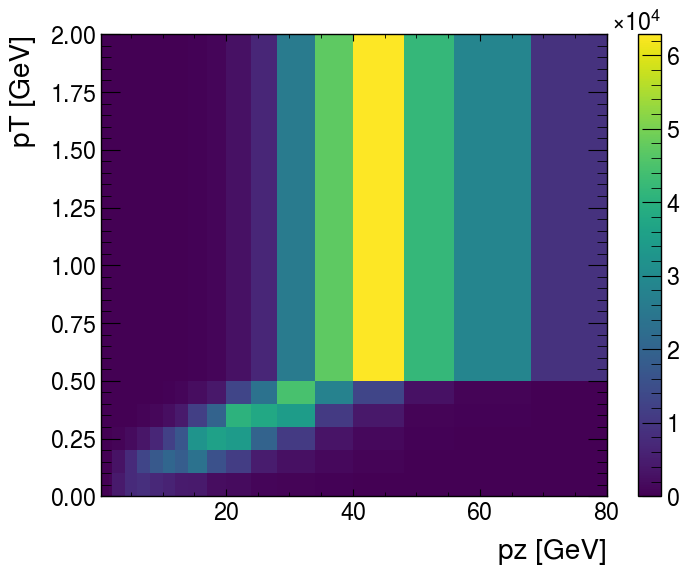

In [70]:
hist, xa, ya = np.histogram2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])

fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.colorbar(h[3], ax=ax)

fig.show()

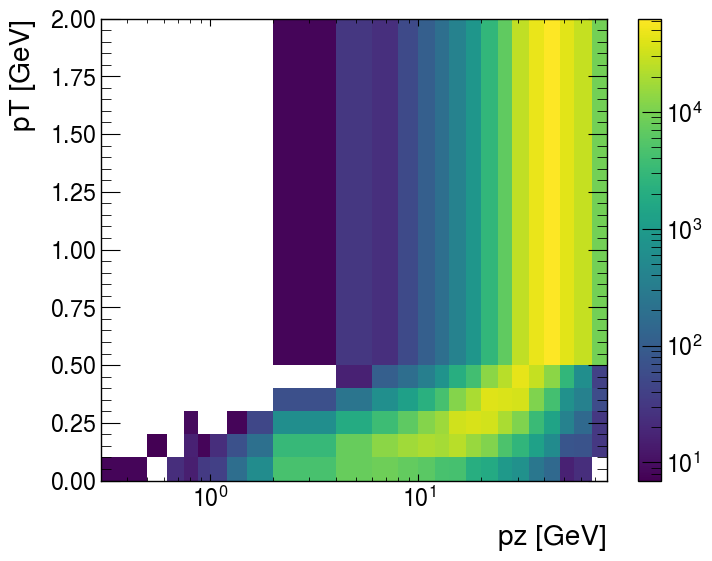

In [6]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT], norm=mpl.colors.LogNorm())
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
ax.set_xscale('log')

fig.colorbar(h[3], ax=ax)

fig.show()

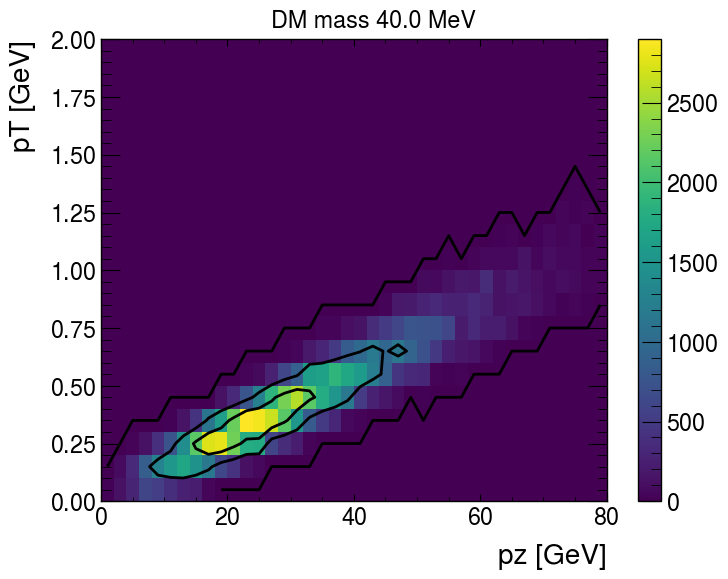

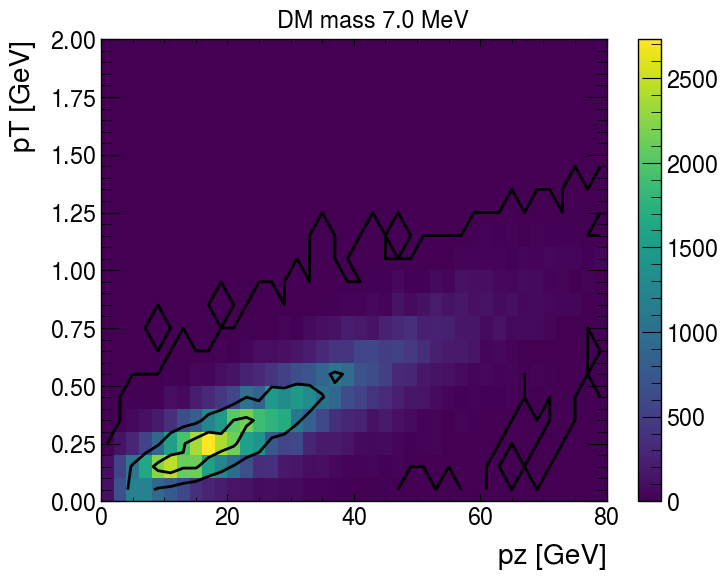

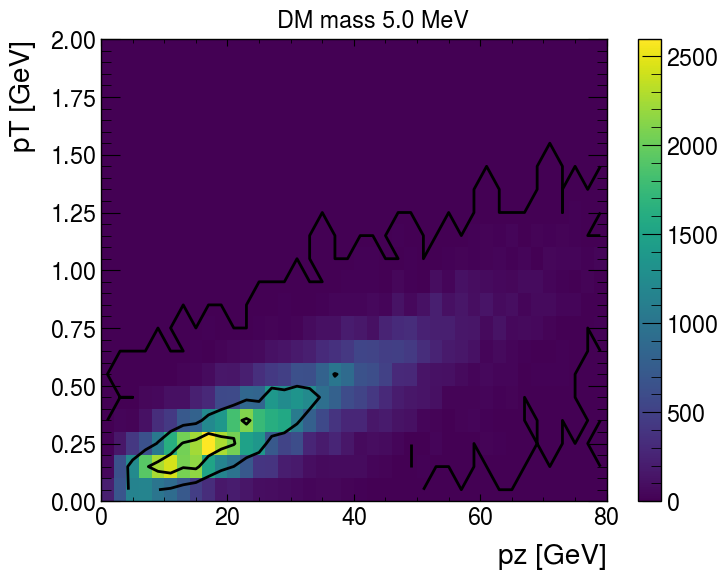

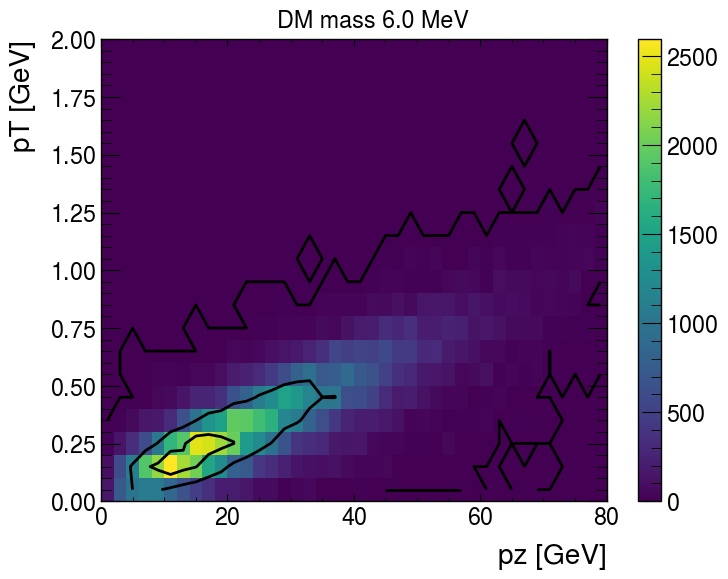

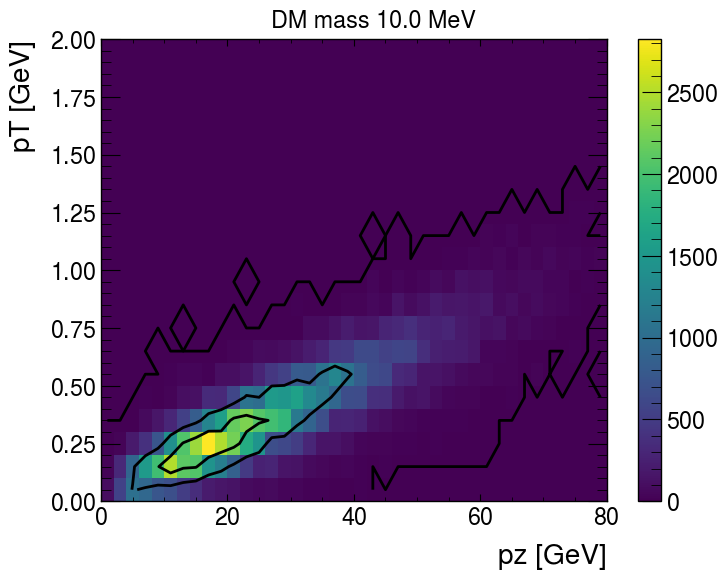

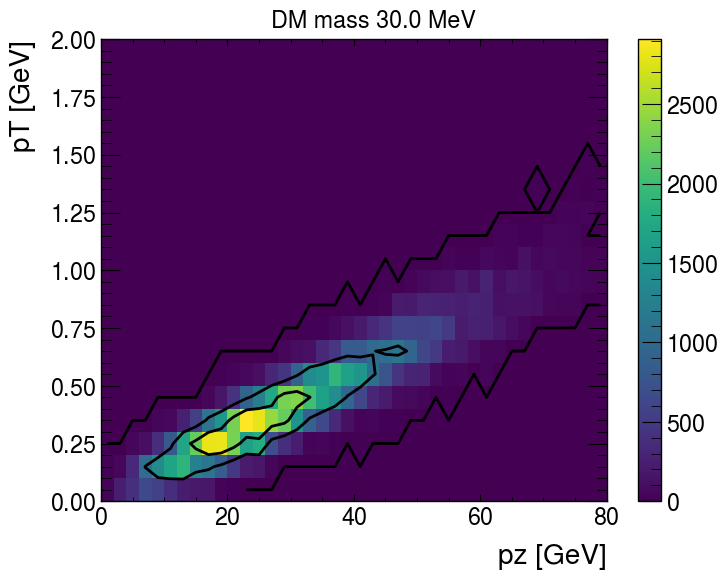

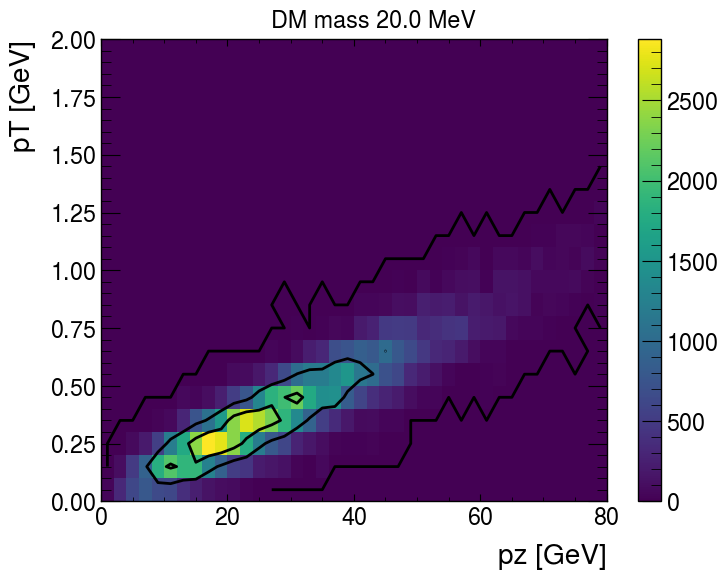

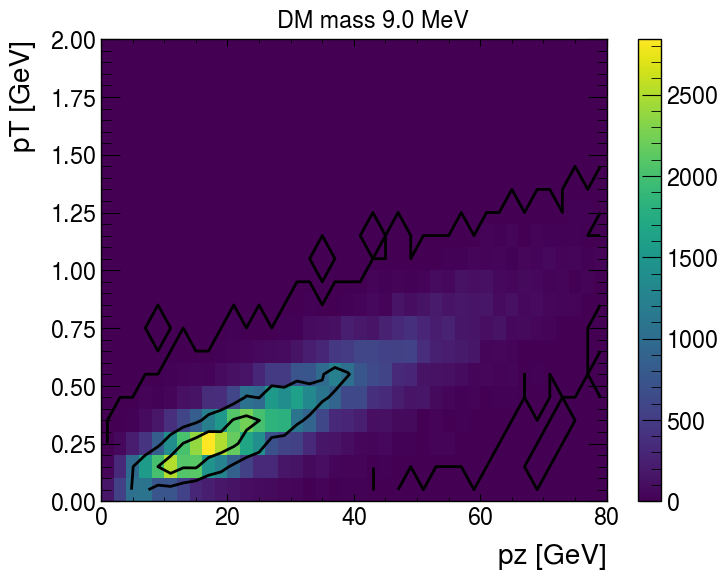

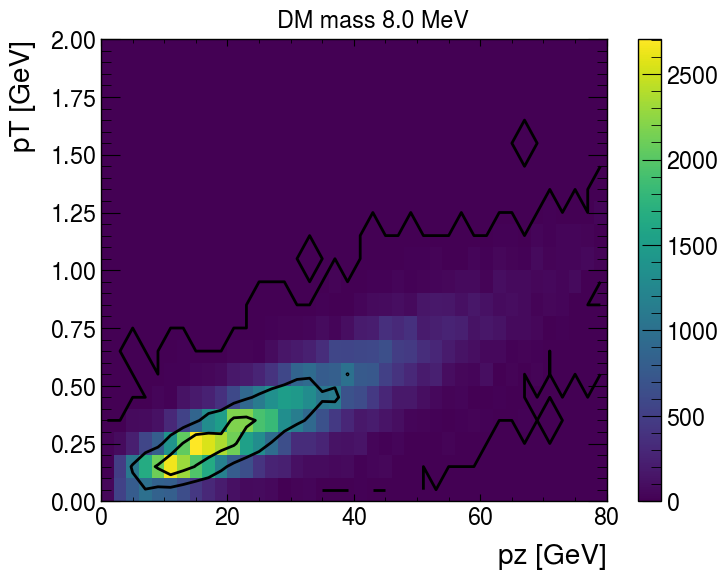

In [69]:
for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        pT_arr_m = []
        pz_arr_m = []
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr_m.append(pT)
                    pz_arr_m.append(pz)
        HH, xe, ye = np.histogram2d(pz_arr_m, pT_arr_m, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
        grid = HH.transpose()
        midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
        fig, ax = plt.subplots()
        h = ax.hist2d(pz_arr_m, pT_arr_m, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
        ax.contour(*midpoints, grid, levels=2, colors='k', zorder=500)
        ax.set_xlabel('pz [GeV]')
        ax.set_ylabel('pT [GeV]')
        fig.colorbar(h[3], ax=ax)
        fig.suptitle('DM mass {0} MeV'.format(dm_mass))

        fig.show()

In [8]:
bdnmc_hist, xedges, yedges = np.histogram2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])

MIPP_piplus = np.array([[3.31E-1, 3.25E-1, 1.93E-1, 1.06E-1, 0.0, 0.0],
               [9.2e-2, 1.37e-1, 9.03e-2, 4.92E-2, 1.42E-2, 0.0],
               [6.02E-2, 1.11E-1, 8.26E-2, 4.32E-2, 2.19E-2, 0.0],
               [4.27E-2, 9.19E-2, 7.46E-2, 4.21E-2, 2.16E-2, 0.0],
               [3.42E-2, 7.5E-2, 6.68E-2, 3.82E-2, 1.99E-2, 0.0],
               [3.91E-2, 9.98E-2, 9.27E-2, 5.2E-2, 2.85E-2, 0.0],
               [4.23E-2, 9.12E-2, 1.01E-1, 7.65E-2, 4.76E-2, 0.0],
               [4.01E-2, 8.8E-2, 1.26E-1, 9.94E-2, 6.99E-2, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # pz = 2-4 GeV
               [1.54E-2, 5.12E-2, 6.47E-2, 6.79E-2, 0.0, 0.0],
               [7.94E-3, 2.69E-2, 3.93E-2, 4.01E-2, 3.11E-2, 0.0],
               [3.99E-3, 1.39E-2, 2.32E-2, 2.46E-2, 2.14E-2, 5.8E-2],
               [2.35E-2, 8.25E-3, 1.5E-2, 1.66E-2, 1.45E-2, 3.78E-2],
               [1.62E-3, 5.84E-3, 1.01E-2, 1.12E-2, 1.01E-2, 2.79E-2],
               [1.78E-3, 5.51E-3, 9.61E-3, 1.19E-2, 1.08E-2, 3.02E-2],
               [1.01E-3, 3.39E-3, 5.73E-3, 7.56E-3, 7.07E-3, 2.2E-2],
               [9.77E-4, 2.84E-3, 4.82E-3, 6.28E-3, 6.53E-3, 2.01E-2],
               [6.89E-4, 1.7E-3, 2.75E-3, 3.57E-3, 3.96E-3, 1.45E-2],
               [5.65E-4, 1.81E-3, 2.5E-3, 3.24E-3, 3.36E-3, 1.34E-2],
               [4.64E-4, 1.18E-3, 1.62E-3, 1.83E-3, 2.05E-3, 8.81E-3],
               [3.98E-4, 7.99E-4, 1.15E-3, 1.33E-3, 1.54E-3, 7.02E-3],
               [1.87E-4, 4.48E-4, 7.06E-4, 7.71E-4, 7.46E-4, 3.88E-3],
               [1.9E-4, 4.24E-4, 5.8E-4, 6.27E-4, 4.84E-4, 2.81E-3],
               [0.0, 0.0, 2.36E-4, 1.88E-4, 1.88E-4, 9.29E-4]])

MIPP_piplus_syst = np.array([[9.77, 4.86, 5.30, 8.15, 0.00, 0.00],
                             [5.10, 4.72, 5.64, 4.77, 8.18, 0.00],
                             [4.94, 4.75, 4.65, 5.62, 5.78, 0.00],
                             [4.74, 4.68, 4.62, 5.50, 4.71, 0.00],
                             [4.74, 4.68, 4.64, 5.57, 8.53, 0.00],
                             [6.21, 4.65, 4.62, 5.65, 5.42, 0.00],
                             [6.27, 4.61, 5.00, 4.64, 5.25, 0.00],
                             [4.62, 4.88, 4.65, 4.71, 4.63, 0.00],
                             [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                             [5.03, 4.67, 4.79, 5.61, 0.00, 0.00],
                             [5.40, 4.64, 4.69, 4.79, 5.92, 0.00],
                             [6.90, 4.89, 4.69, 4.66, 4.66, 6.20],
                             [5.30, 4.67, 4.63, 4.75, 4.70, 5.46],
                             [5.34, 4.89, 4.62, 4.65, 4.68, 4.72],
                             [5.19, 4.78, 5.01, 4.72, 4.64, 4.66],
                             [5.12, 4.71, 4.65, 4.74, 4.70, 4.62],
                             [5.85, 4.73, 4.89, 4.67, 4.66, 4.75],
                             [8.24, 5.06, 5.28, 4.73, 4.82, 4.66],
                             [4.97, 4.74, 4.88, 4.92, 4.61, 4.65],
                             [5.41, 5.42, 4.74, 4.73, 4.68, 4.73],
                             [4.70, 5.22, 4.79, 4.69, 4.93, 4.83],
                             [4.80, 4.99, 4.96, 4.92, 4.69, 4.67],
                             [4.92, 4.65, 5.96, 4.68, 4.76, 4.79],
                             [0.00, 0.00, 5.45, 4.89, 4.80, 4.75]])

MIPP_piplus_stat = np.array([[0.97, 1.05, 1.46, 1.97, 0.00, 0.00],
                             [1.22, 1.18, 1.57, 2.12, 5.39, 0.00],
                             [1.41, 1.33, 1.59, 2.09, 3.12, 0.00],
                             [1.74, 1.48, 1.67, 2.19, 2.84, 0.00],
                             [1.87, 1.69, 1.85, 2.87, 2.90, 0.00],
                             [2.04, 1.83, 2.06, 2.46, 4.18, 0.00],
                             [2.35, 2.07, 2.20, 2.51, 3.11, 0.00],
                             [2.90, 2.44, 2.41, 2.70, 3.14, 0.00],
                             [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                             [11.19, 7.63, 8.72, 9.31, 0.00, 0.00],
                             [4.78, 3.55, 3.82, 3.88, 7.89, 0.00],
                             [3.55, 6.28, 1.70, 1.86, 2.64, 5.87],
                             [4.01, 1.95, 1.72, 2.10, 2.79, 4.18],
                             [4.98, 2.43, 2.00, 2.14, 2.40, 2.96],
                             [4.62, 2.50, 1.88, 1.87, 2.12, 2.15],
                             [5.78, 2.99, 2.17, 2.45, 2.55, 1.88],
                             [5.79, 3.22, 2.98, 2.52, 2.72, 2.02],
                             [6.65, 5.74, 3.92, 3.49, 3.35, 2.05],
                             [11.39, 5.12, 4.06, 3.45, 3.36, 2.13],
                             [8.56, 5.38, 4.20, 3.51, 3.44, 1.88],
                             [9.82, 6.32, 4.63, 4.11, 3.83, 2.01],
                             [11.91, 10.33, 5.87, 5.31, 5.21, 2.46],
                             [11.86, 9.19, 6.28, 5.64, 6.22, 2.77],
                             [0.00, 0.00, 10.32, 10.39, 10.15, 4.69]])

MIPP_piminus = np.array([[2.76E-1, 3.56E-1, 1.91E-1, 9.49E-2, 0.0, 0.0],
                [7.54E-2, 1.44E-1, 9.24E-2, 4.63E-2, 2.23E-2, 0.0],
                [5.14E-2, 1.13E-1, 8.14E-2, 4.33E-2, 2.22E-2, 0.0],
                [3.9E-2, 9.04E-2, 7.11E-2, 4.03E-2, 2.09E-2, 0.0],
                [3.23E-2, 7.25E-2, 6.19E-2, 3.61E-2, 1.93E-2, 0.0],
                [3.65E-2, 9.09E-2, 8.22E-2, 5.25E-2, 3.01E-2, 0.0],
                [3.72E-2, 8.83E-2, 9.32E-2, 6.58E-2, 3.87E-2, 0.0],
                [3.2E-2, 8.2E-2, 1.08E-1, 8.3E-2, 5.61E-2, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [1.74E-2, 4.82E-2, 5.64E-2, 5.79E-2, 0.0, 0.0],
                [8.64E-3, 2.6E-2, 3.47E-2, 3.26E-2, 2.53E-2, 0.0],
                [4.46E-3, 1.2E-2, 1.9E-2, 2.09E-2, 1.72E-2, 4.86E-2],
                [2.63E-2, 8.44E-3, 1.27E-2, 1.4E-2, 1.21E-2, 3.1E-2],
                [1.68E-3, 5.1E-3, 7.65E-3, 9.51E-3, 8.74E-3, 2.21E-2],
                [1.61E-3, 4.73E-3, 7.06E-3, 8.99E-3, 8.2E-3, 2.54E-2],
                [9.19E-4, 2.61E-3, 3.98E-3, 5.11E-3, 5.59E-3, 1.68E-2],
                [6.4E-4, 2.04E-3, 2.91E-3, 4.04E-3, 4.18E-3, 1.51E-2],
                [4.61E-4, 1.14E-3, 1.48E-3, 2.17E-3, 2.5E-3, 1.04E-2],
                [3.88E-4, 8.67E-4, 1.2E-3, 1.62E-3, 2.11E-3, 8.83E-3],
                [2.63E-4, 5.55E-4, 7.23E-4, 8.38E-4, 1.09E-3, 5.25E-3],
                [1.38E-4, 2.92E-4, 4.77E-4, 5.04E-4, 6.55E-4, 3.58E-3],
                [0.0, 1.55E-4, 2.15E-4, 2.19E-4, 3.05E-4, 1.8E-3],
                [0.0, 8.79E-5, 1.71E-4, 1.52E-4, 1.57E-4, 1.03E-3],
                [0.0, 0.0, 0.0, 0.0, 0.0, 3.33E-4]])

MIPP_piminus_syst = np.array([[9.09, 4.93, 5.24, 7.39, 0.00, 0.00],
                              [4.98, 4.70, 5.92, 5.24, 8.33, 0.00],
                              [4.85, 4.74, 4.63, 5.43, 5.47, 0.00],
                              [4.68, 4.65, 4.61, 5.68, 4.77, 0.00],
                              [4.69, 4.62, 4.60, 4.68, 5.04, 0.00],
                              [5.33, 4.64, 4.60, 4.74, 4.63, 0.00],
                              [8.47, 4.62, 4.90, 4.60, 5.40, 0.00],
                              [4.59, 4.93, 4.65, 4.66, 4.63, 0.00],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                              [5.83, 4.91, 4.86, 4.73, 0.00, 0.00],
                              [6.40, 4.95, 4.62, 4.71, 5.24, 0.00],
                              [7.02, 4.84, 4.73, 4.68, 4.68, 5.19],
                              [8.46, 4.97, 4.62, 4.69, 4.80, 5.17],
                              [5.28, 5.08, 4.72, 4.61, 4.74, 4.70],
                              [5.45, 6.56, 4.68, 4.69, 4.72, 4.61],
                              [6.20, 5.45, 5.10, 4.72, 4.71, 4.69],
                              [10.03, 4.66, 4.67, 5.05, 4.64, 4.65],
                              [4.68, 5.09, 5.29, 4.78, 4.67, 4.67],
                              [5.79, 5.79, 4.74, 4.65, 5.13, 4.61],
                              [4.60, 4.84, 5.10, 4.74, 4.78, 4.69],
                              [5.20, 4.90, 4.61, 5.62, 5.07, 4.63],
                              [0.00, 4.89, 5.22, 5.18, 4.93, 4.66],
                              [0.00, 5.70, 4.69, 5.76, 5.32, 5.04],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 5.06]])

MIPP_piminus_stat = np.array([[0.86, 0.75, 1.09, 1.68, 0.00, 0.00],
                              [1.16, 0.85, 1.14, 1.76, 2.81, 0.00],
                              [1.31, 0.94, 1.12, 1.52, 2.47, 0.00],
                              [1.55, 1.05, 1.18, 1.54, 2.26, 0.00],
                              [1.62, 1.22, 1.33, 1.58, 2.15, 0.00],
                              [1.71, 1.31, 1.41, 1.67, 2.05, 0.00],
                              [1.91, 1.50, 1.60, 1.80, 2.19, 0.00],
                              [2.58, 1.79, 1.73, 1.95, 2.31, 0.00],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                              [7.94, 4.23, 4.48, 5.64, 0.00, 0.00],
                              [3.46, 2.57, 2.49, 3.14, 6.11, 0.00],
                              [3.22, 8.47, 1.60, 1.91, 2.87, 6.33],
                              [4.12, 2.01, 1.78, 1.91, 2.62, 4.26],
                              [5.10, 2.61, 2.11, 2.12, 2.38, 2.96],
                              [5.05, 2.68, 2.09, 2.01, 2.27, 2.01],
                              [6.85, 3.66, 2.68, 2.73, 2.69, 2.01],
                              [7.74, 4.12, 3.87, 3.10, 2.95, 1.89],
                              [9.09, 7.25, 6.47, 3.92, 3.49, 2.01],
                              [13.69, 8.86, 5.64, 5.02, 3.81, 2.00],
                              [11.23, 7.33, 6.14, 5.63, 4.98, 2.36],
                              [16.11, 10.10, 7.49, 7.10, 6.21, 2.76],
                              [0.00, 13.69, 10.82, 10.36, 8.80, 3.62],
                              [0.00, 16.67, 11.59, 11.85, 11.15, 4.51],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 7.34]])

In [9]:
MIPP_avg = np.zeros_like(MIPP_piplus)
MIPP_avg_syst = np.zeros_like(MIPP_piplus)
MIPP_avg_stat = np.zeros_like(MIPP_piplus)
for i in range(len(MIPP_piplus)):
    for j in range(len(MIPP_piplus[i])):
        MIPP_avg[i][j] = (MIPP_piplus[i][j] + MIPP_piminus[i][j])/2
        MIPP_avg_syst[i][j] = np.sqrt((MIPP_piplus_syst[i][j])**2 + (MIPP_piminus_syst[i][j])**2)/2
        MIPP_avg_stat[i][j] = np.sqrt((MIPP_piplus_stat[i][j])**2 + (MIPP_piminus_stat[i][j])**2)/2
print(np.sum(MIPP_piplus))
print(np.sum(MIPP_piminus))
print(np.sum(MIPP_avg))
print(np.sum(bdnmc_hist))

4.181476
3.8305849
4.00603045
897066.0


In [11]:
hist_norm = hist[0]/np.sum(hist[0])

correction = 0

for i in range(len(MIPP_avg)):
    for j in range(len(MIPP_avg[i])):
        correction += hist_norm[i][j]*MIPP_avg[i][j]
print(correction)

0.006387992774054525


/tmp/ipykernel_15300/1353444770.py:5: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(X, Y, np.log(MIPP_avg_T))


Text(0.5, 0.98, 'MIPP data')

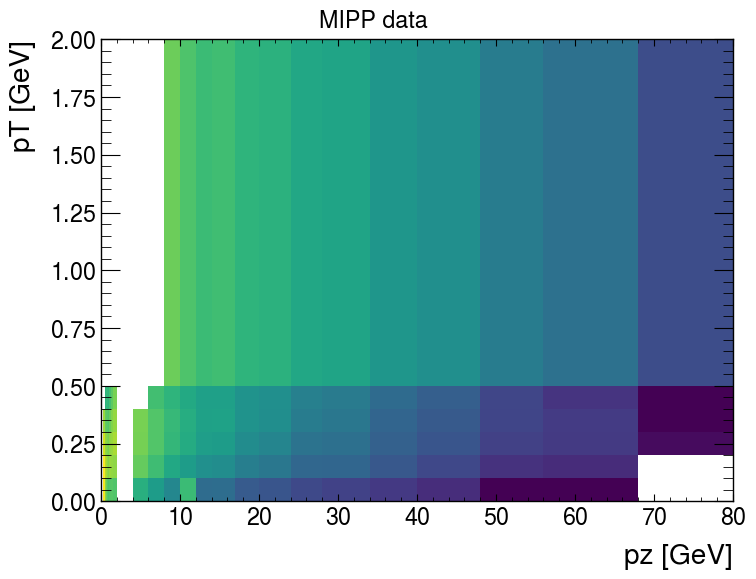

In [12]:
MIPP_avg_T = MIPP_avg.T
fig = plt.figure()#figsize=(7, 3))
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
ax.pcolormesh(X, Y, np.log(MIPP_avg_T))
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP data')

In [13]:
evnpath = "/exp/nova/app/users/thoroho/bdnmc/eve/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

pT_arr_full = []
pz_arr_full = []

for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events_')[1]).split('.dat')[0])
        if dm_mass != 1:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr_full.append(pT)
                    pz_arr_full.append(pz)

Process 4 masses


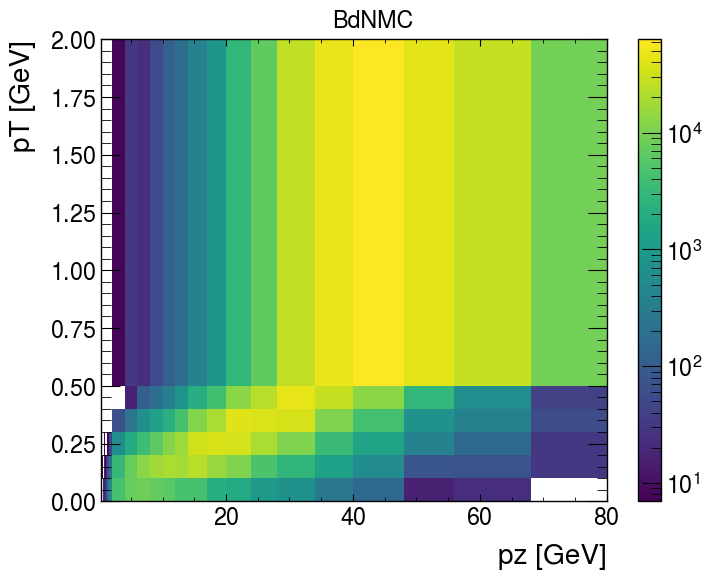

In [14]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT], norm=mpl.colors.LogNorm())
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.suptitle('BdNMC')

fig.colorbar(h[3], ax=ax)

fig.show()

In [15]:
def binvals(bins):
    vals = []
    for i in range(len(bins)-1):
        vals.append((bins[i] + bins[i+1])/2)
    return vals
def normalize(weights, bins):
    width = 1000000
    weights_norm = []
    for i in range(len(bins)-1):
        thiswidth = bins[i+1] - bins[i]
        if thiswidth < width:
            width = thiswidth
    for i in range(len(bins)-1):
        weights_norm.append(weights[i]*width/(bins[i+1] - bins[i]))
    return weights_norm

/tmp/ipykernel_15300/4111459223.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


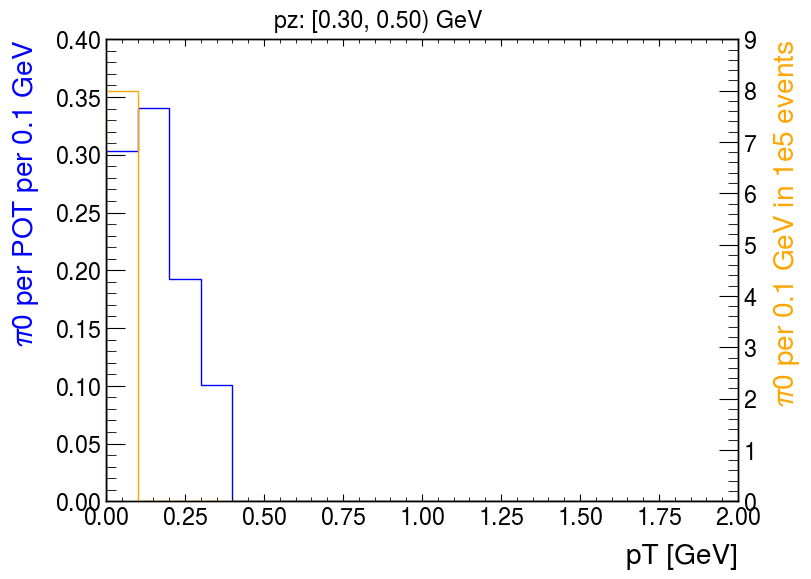

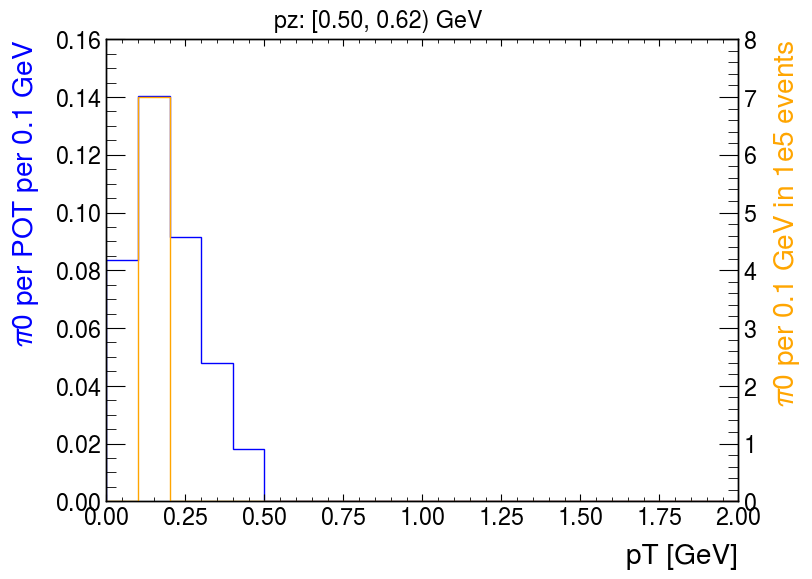

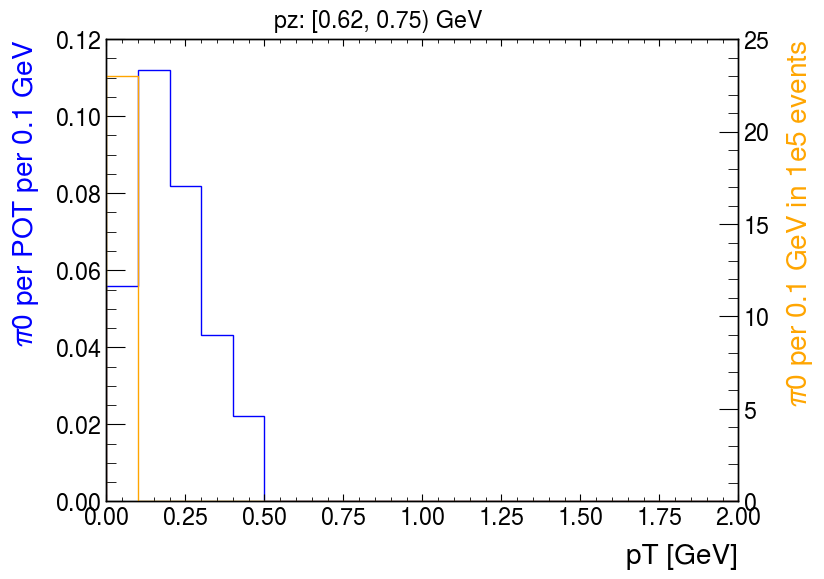

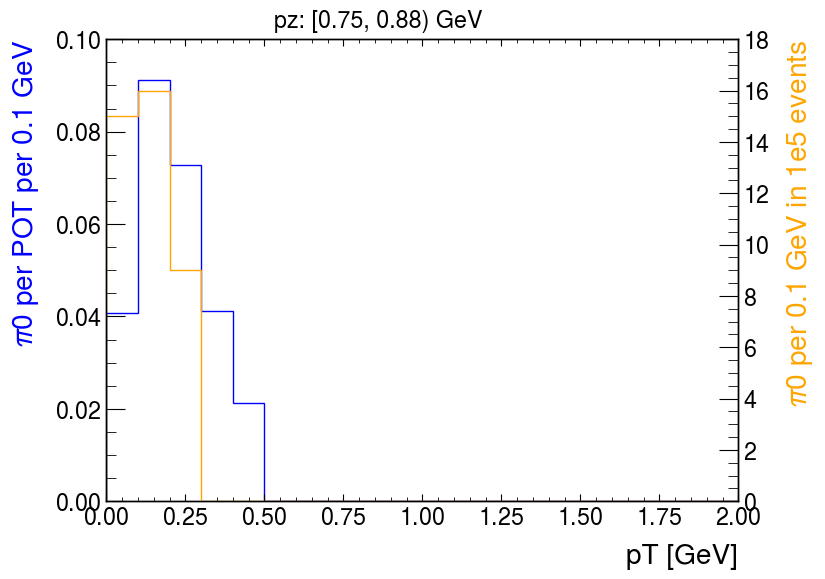

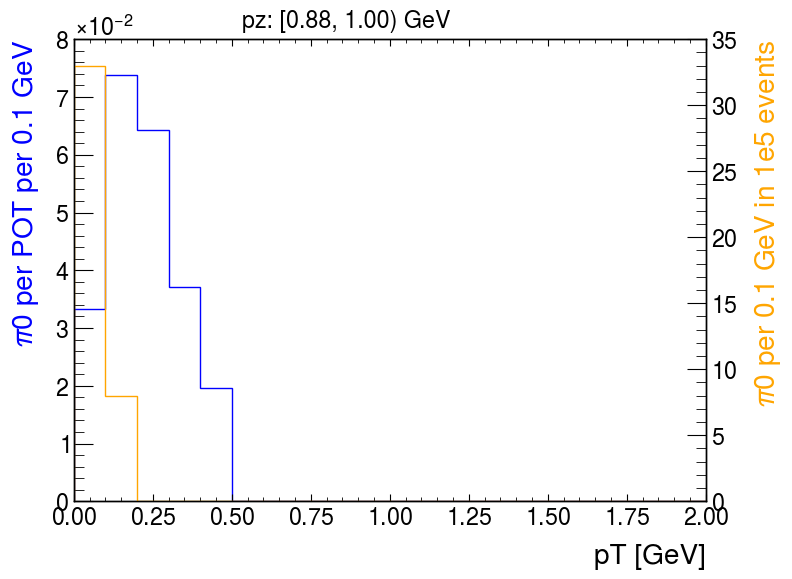

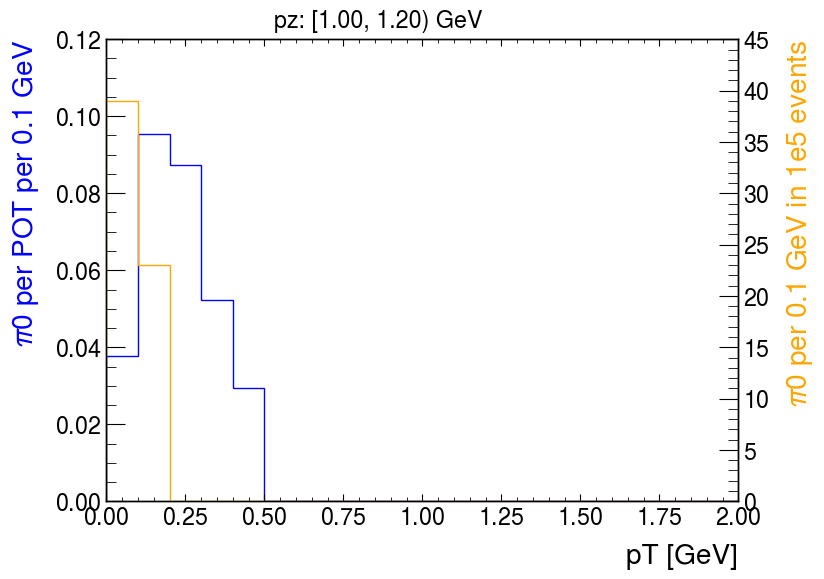

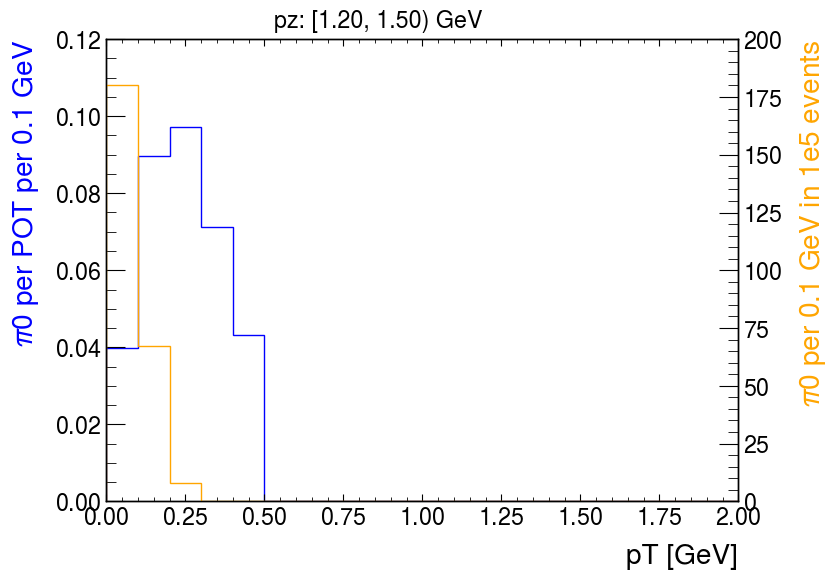

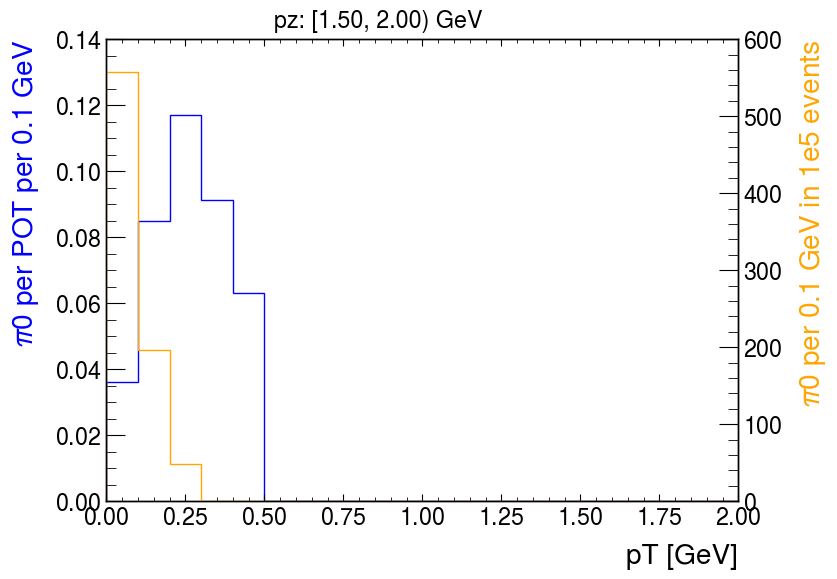

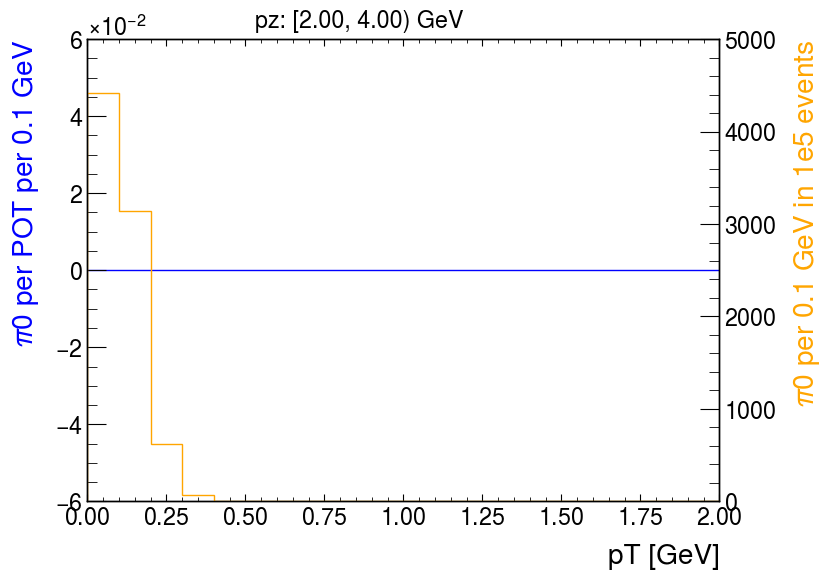

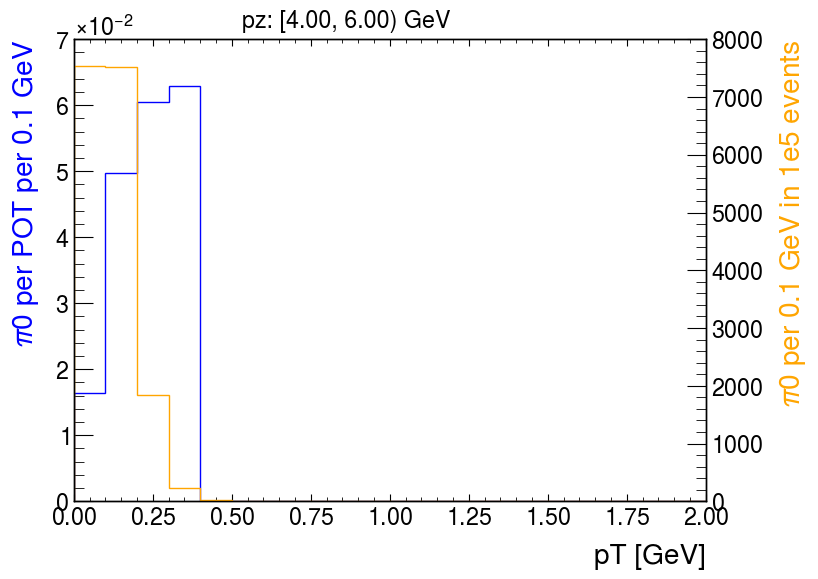

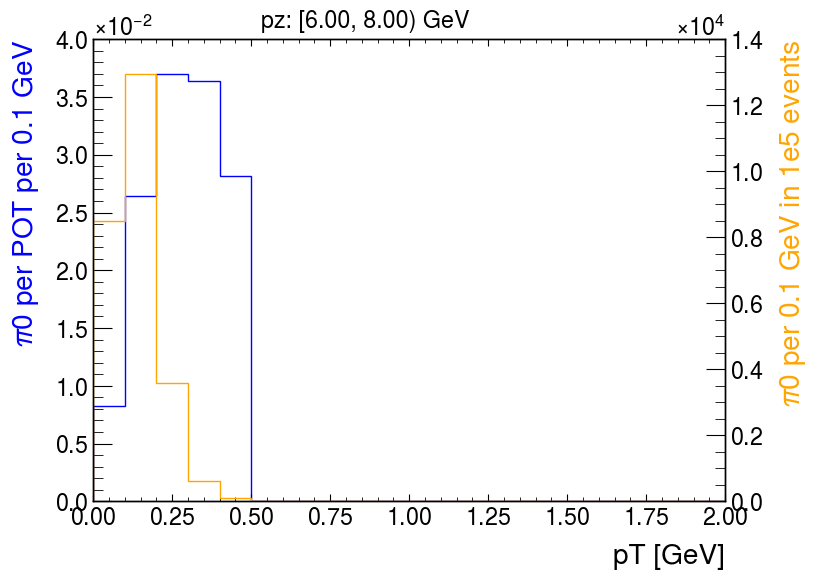

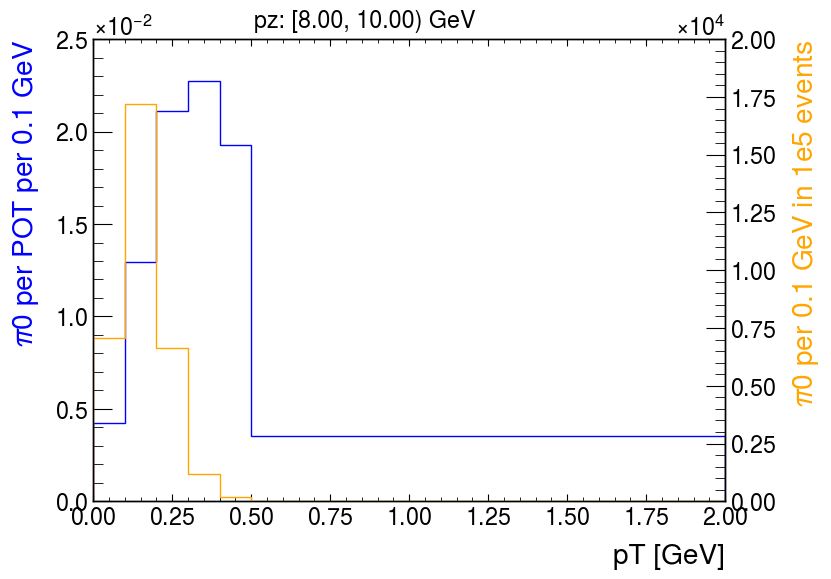

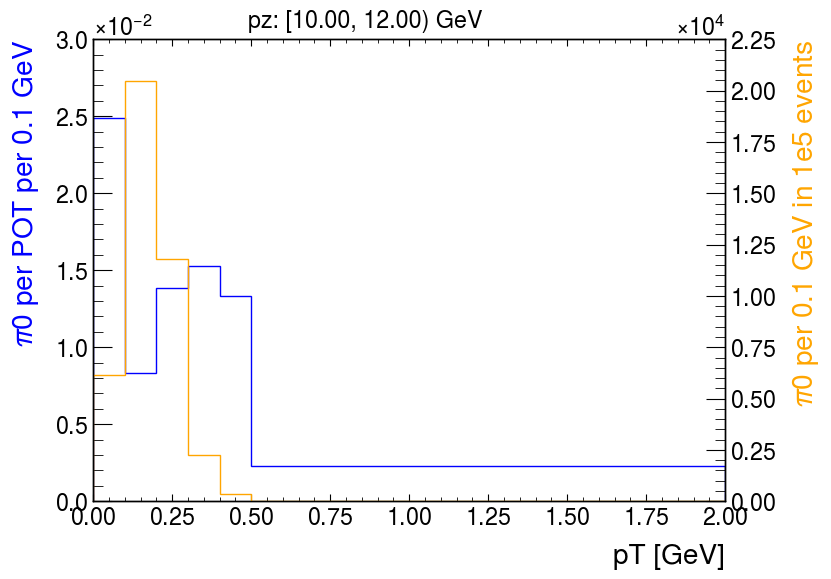

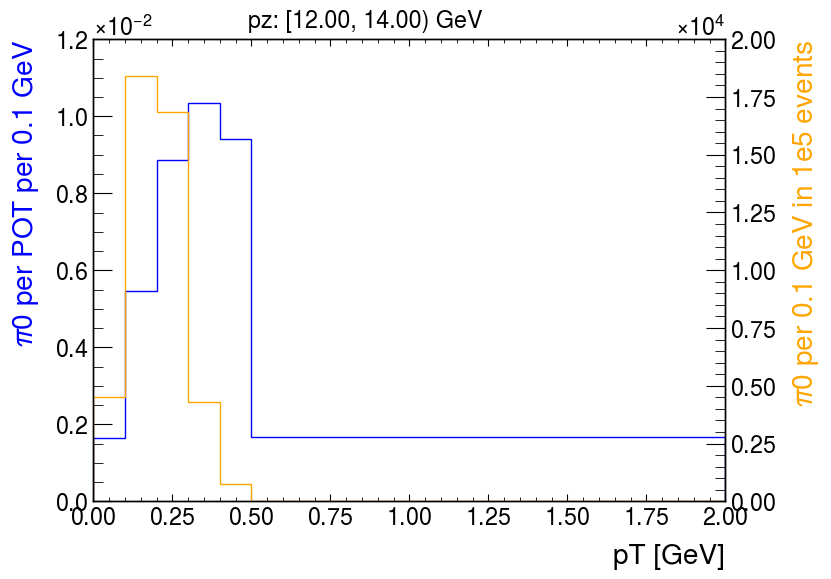

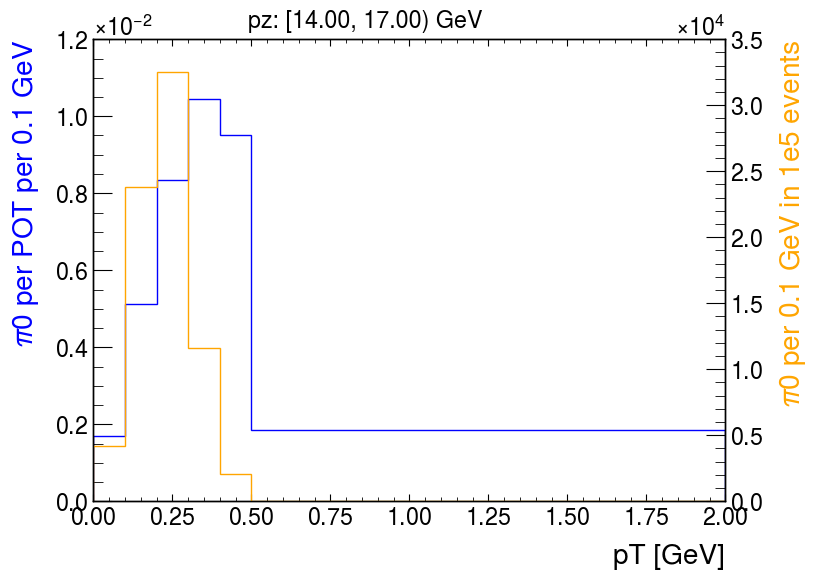

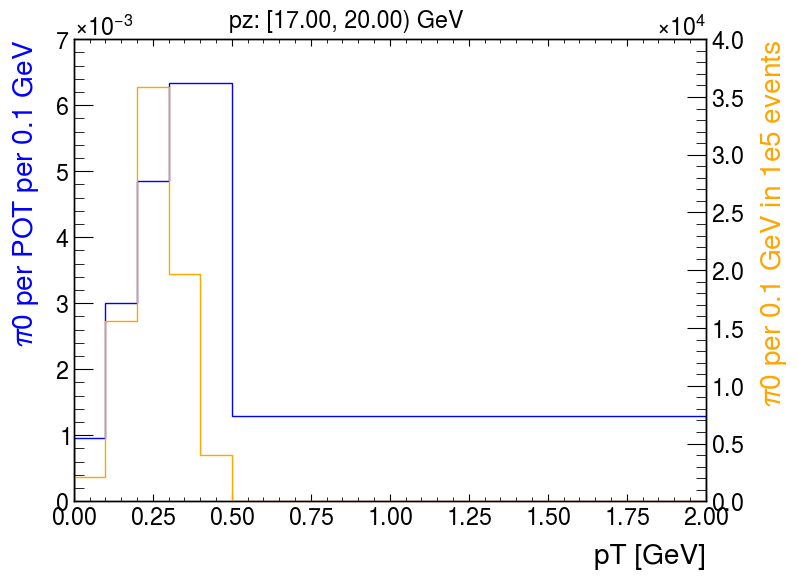

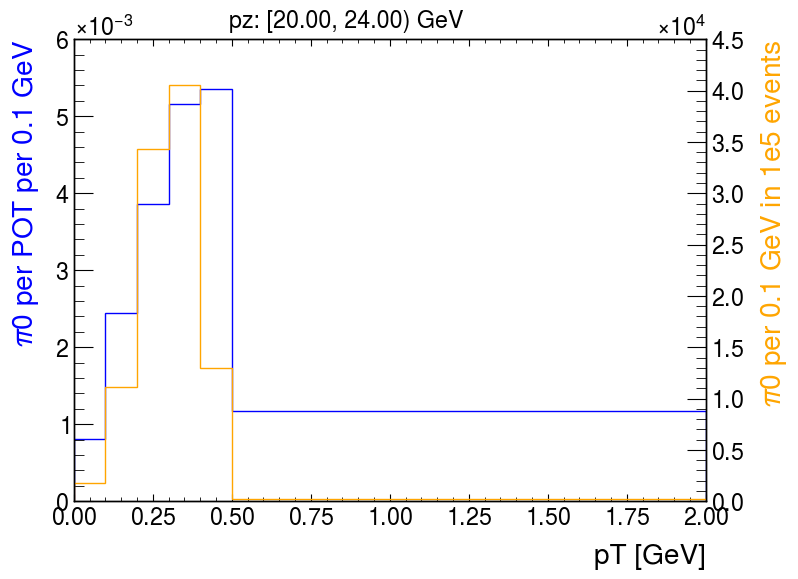

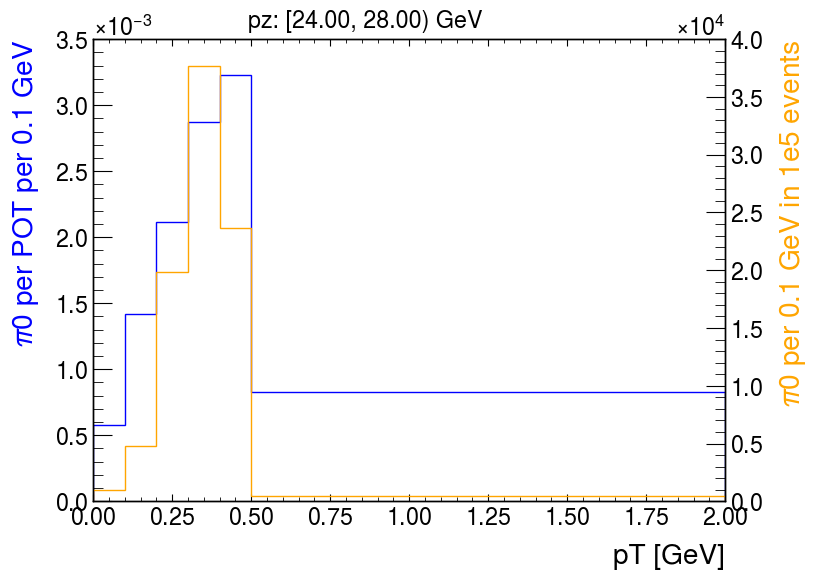

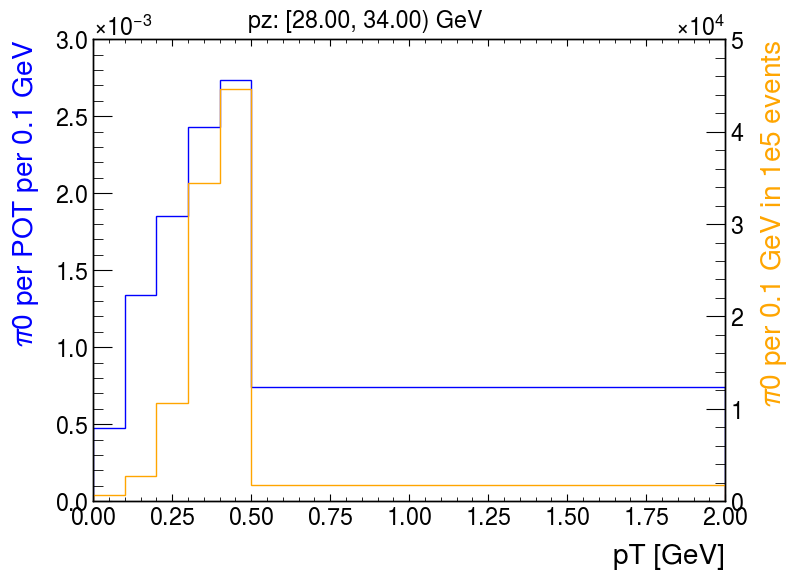

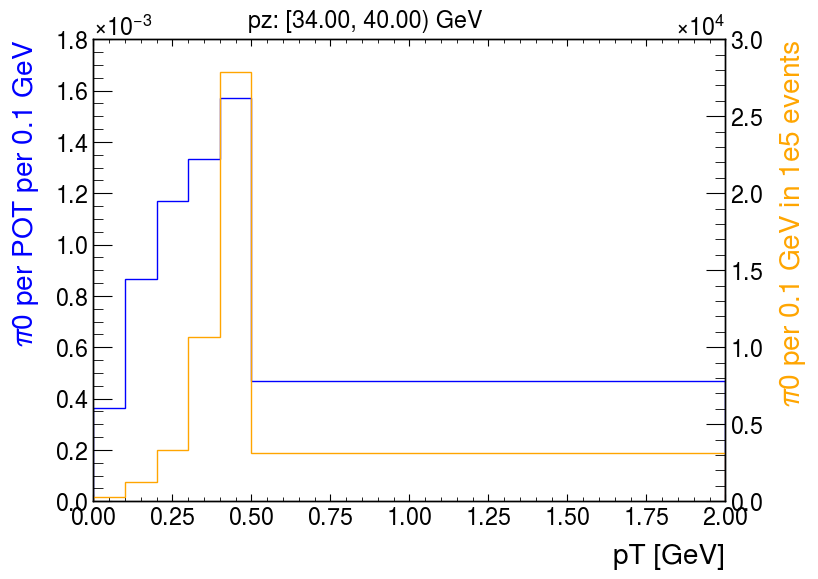

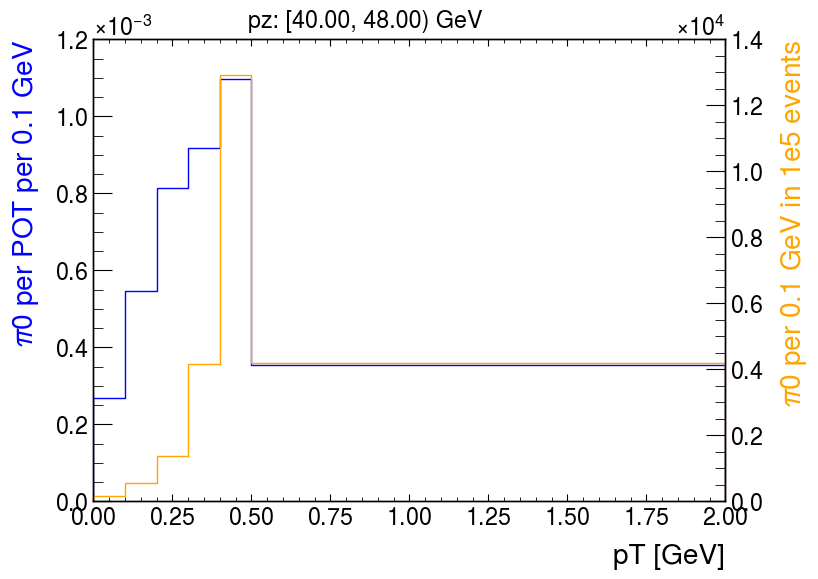

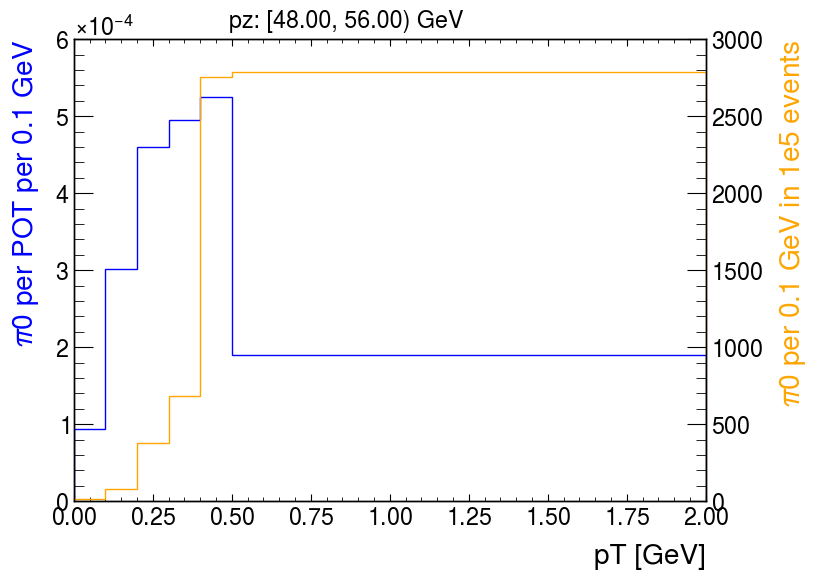

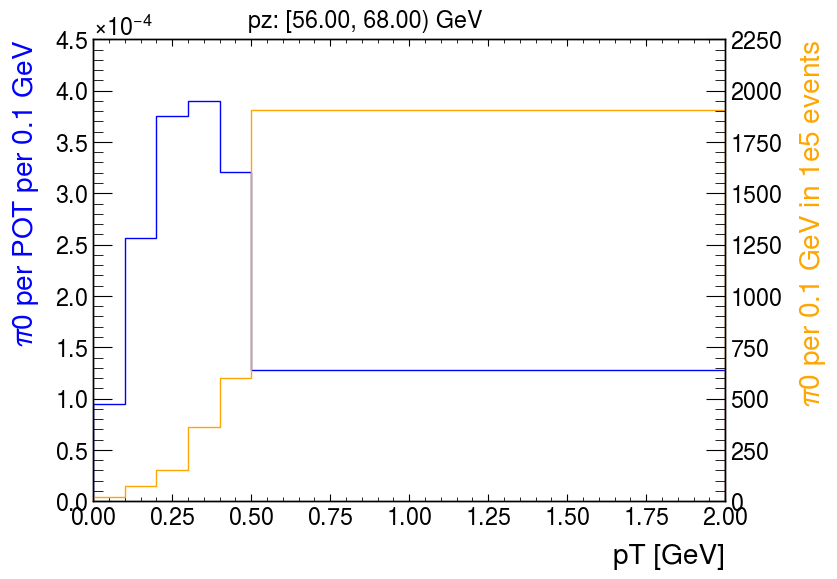

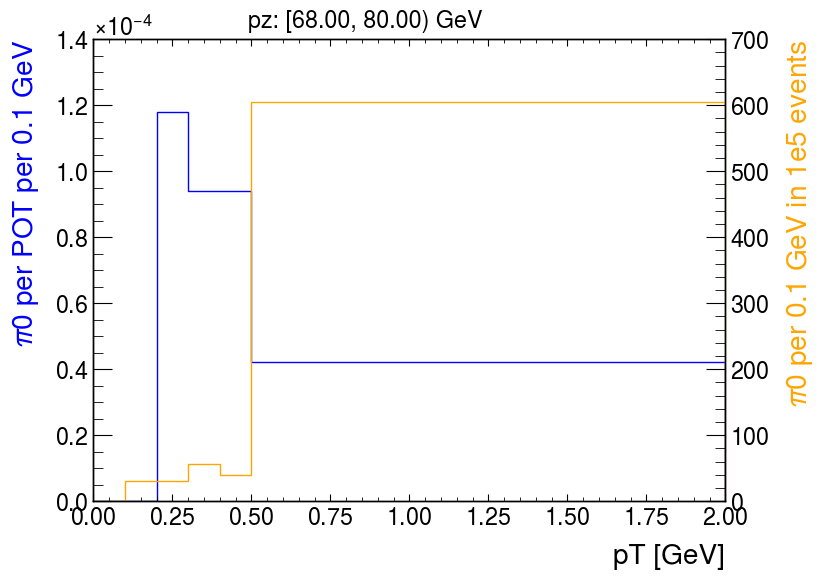

In [16]:
pz_range = ['[0.30, 0.50) GeV', '[0.50, 0.62) GeV', '[0.62, 0.75) GeV', '[0.75, 0.88) GeV', '[0.88, 1.00) GeV',
            '[1.00, 1.20) GeV', '[1.20, 1.50) GeV', '[1.50, 2.00) GeV', '[2.00, 4.00) GeV', '[4.00, 6.00) GeV',
            '[6.00, 8.00) GeV', '[8.00, 10.00) GeV', '[10.00, 12.00) GeV', '[12.00, 14.00) GeV', '[14.00, 17.00) GeV',
            '[17.00, 20.00) GeV', '[20.00, 24.00) GeV', '[24.00, 28.00) GeV', '[28.00, 34.00) GeV', '[34.00, 40.00) GeV',
            '[40.00, 48.00) GeV', '[48.00, 56.00) GeV', '[56.00, 68.00) GeV', '[68.00, 80.00) GeV']

for i in range(len(MIPP_avg)):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    hist1 = ax1.hist(binvals(bins_pT), bins=bins_pT, weights=normalize(MIPP_avg[i], bins_pT),histtype='step', label='MIPP data',color='blue')
    hist2 = ax2.hist(binvals(bins_pT), bins=bins_pT, weights=normalize(bdnmc_hist[i], bins_pT),histtype='step', label='BdNMC',color='orange')
    #ax1.legend()
    ax1.set_xlabel('pT [GeV]')
    ax1.set_ylabel('$\pi$0 per POT per 0.1 GeV', color='blue')
    ax2.set_ylabel('$\pi$0 per 0.1 GeV in 1e5 events', color='orange')
    fig.suptitle('pz: ' + pz_range[i])
    fig.show()

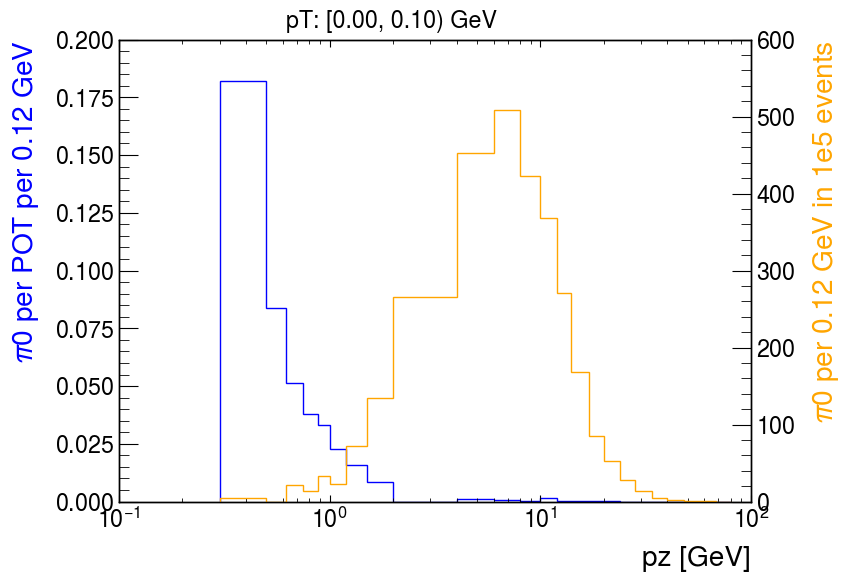

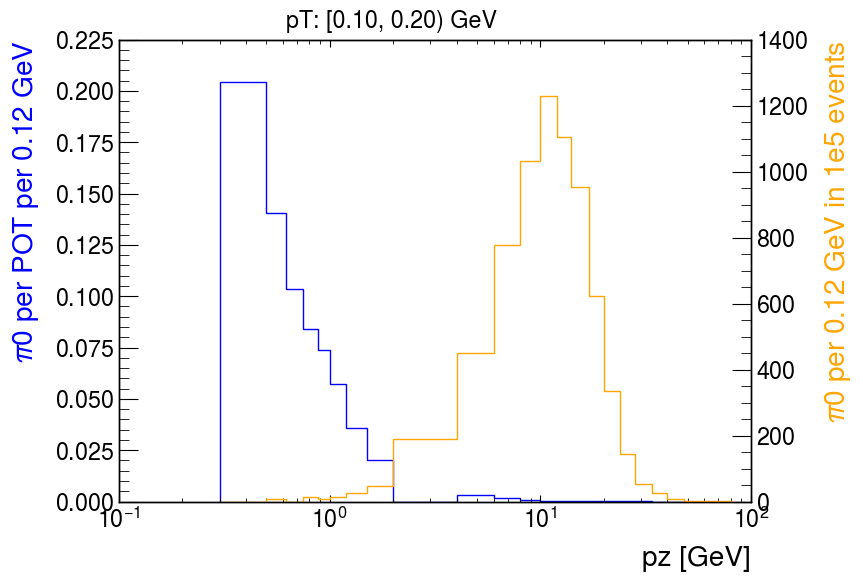

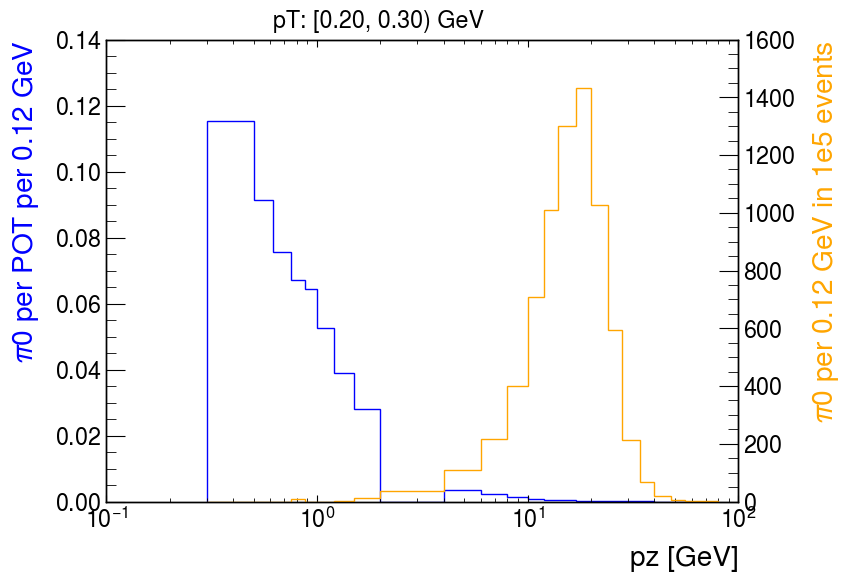

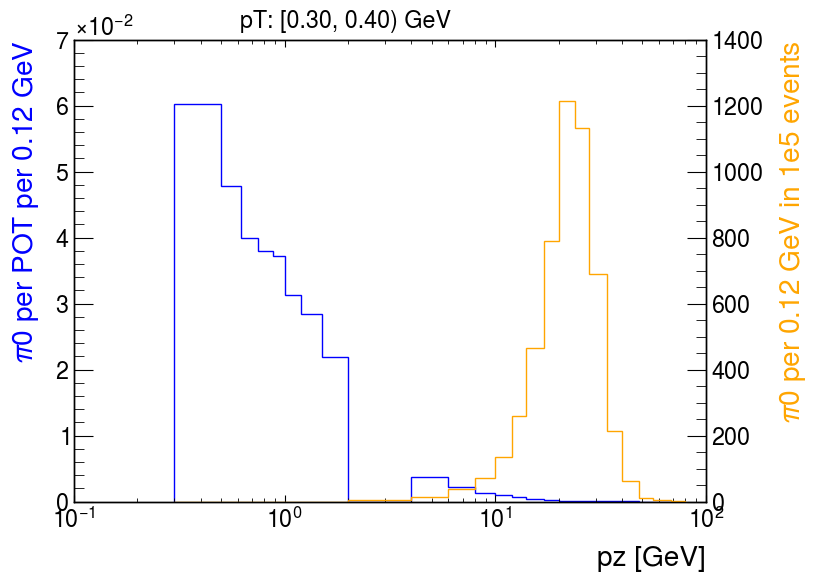

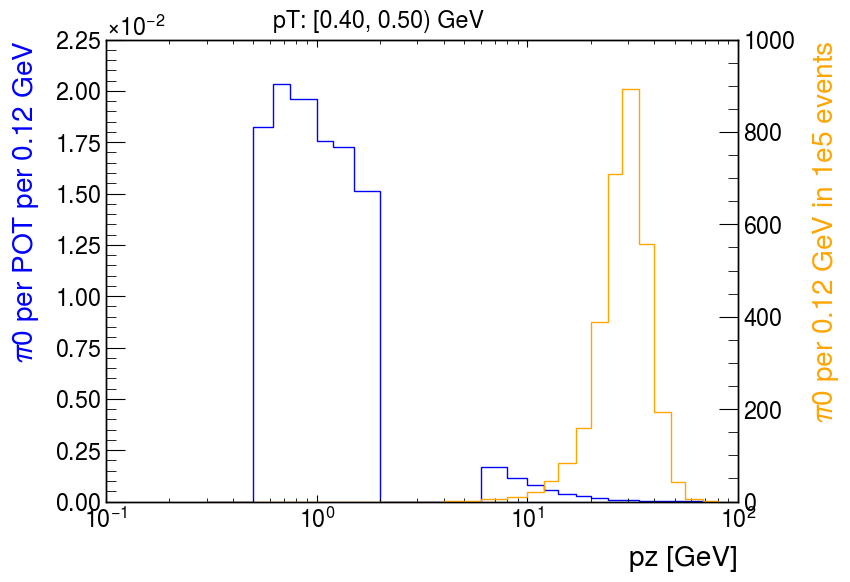

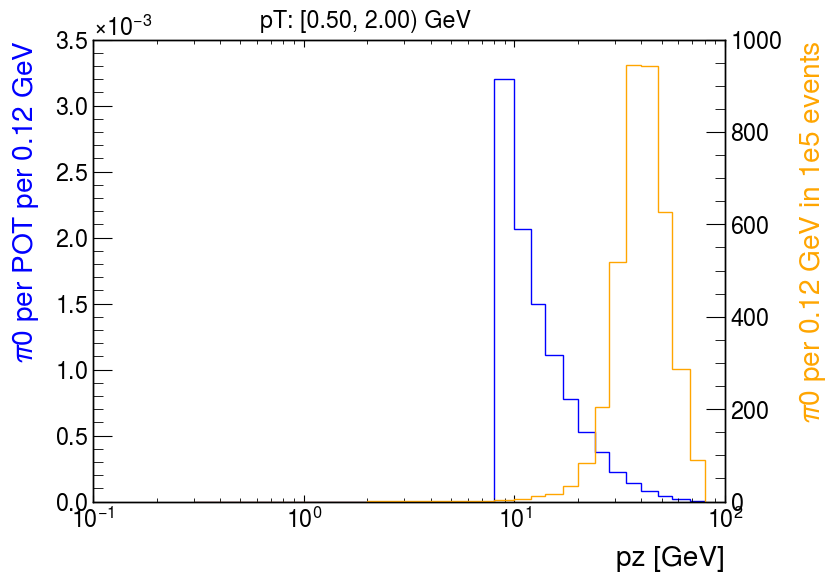

In [17]:
pT_range = ['[0.00, 0.10) GeV', '[0.10, 0.20) GeV', '[0.20, 0.30) GeV', '[0.30, 0.40) GeV', '[0.40, 0.50) GeV', '[0.50, 2.00) GeV']

for i in range(len(MIPP_avg.T)):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist(binvals(bins_pz), bins=bins_pz, weights=normalize(MIPP_avg.T[i], bins_pz),histtype='step', label='MIPP data',color='blue')
    ax2.hist(binvals(bins_pz), bins=bins_pz, weights=normalize(bdnmc_hist.T[i], bins_pz),histtype='step', label='BdNMC',color='orange')
    ax1.set_xscale('log')
    ax1.set_xlabel('pz [GeV]')
    ax1.set_ylabel('$\pi$0 per POT per 0.12 GeV', color='blue')
    ax2.set_ylabel('$\pi$0 per 0.12 GeV in 1e5 events',color='orange')
    fig.suptitle('pT: ' + pT_range[i])
    fig.show()

In [48]:
bmpt_source = np.array([[16.2717 , 0.044223],
[6.5693 , 0.099219],
[4.35776 , 0.0586082],
[11.7664 , 0.0155917],
[21.7112 , 0.0197227],
[11.9088 , 0.0303749],
[3.99932 , 0.157979],
[8.53618 , 0.0543629],
[1.29062 , 0.44824],
[4.90888 , 0.173556],
[14.3764 , 0.0270243],
[6.67177 , 0.0590721],
[2.89169 , 0.205355],
[1.64557 , 0.549785],
[37.5301 , 0.0158295],
[50.7954 , 0.00954416],
[0.133225 , 0.858157],
[2.15305 , 0.336802],
[39.0245 , 0.0101441],
[22.0663 , 0.0220295],
[26.2321 , 0.0127095],
[5.58523 , 0.057941],
[16.9769 , 0.0254554],
[8.08377 , 0.0614313],
[20.6585 , 0.018267],
[7.47355 , 0.0506678],
[34.9825 , 0.00868769],
[12.4468 , 0.0320469],
[9.55514 , 0.0855934],
[24.7555 , 0.0242873],
[6.63107 , 0.0355899],
[17.0324 , 0.00772986],
[4.6021 , 0.158827],
[2.74272 , 0.0551522],
[1.45296 , 0.165586],
[1.67581 , 0.249979],
[17.8089 , 0.0212967],
[5.59079 , 0.0714696],
[1.22187 , 0.505038],
[15.5622 , 0.0235733],
[0.265162 , 1.38591],
[10.6686 , 0.0445019],
[0.71768 , 0.0929448],
[1.3682 , 0.0950779],
[0.755433 , 0.116098],
[24.0818 , 0.0331119],
[25.5037 , 0.0117242],
[74.1569 , 0.00515289],
[0.291277 , 0.276388],
[3.59581 , 0.0728888],
[10.651 , 0.0251578],
[27.1063 , 0.00663513],
[20.0407 , 0.0037522],
[3.18922 , 0.0876899],
[7.37075 , 0.0998136],
[23.1243 , 0.0213522],
[5.52522 , 0.108411],
[18.5067 , 0.0168714],
[16.2083 , 0.0178991],
[3.54783 , 0.125908],
[1.48197 , 0.0948898],
[4.27363 , 0.0346774],
[3.02128 , 0.172983],
[0.960371 , 0.39307],
[12.7431 , 0.016364],
[1.4536 , 0.18022],
[5.72481 , 0.08764],
[22.4473 , 0.0108759],
[26.7618 , 0.0181144],
[4.88225 , 0.0907152],
[0.227286 , 0.97987],
[53.3773 , 0.00789399],
[7.73968 , 0.0842525],
[77.5334 , 0.00839557],
[0.201937 , 0.634027],
[7.62393 , 0.0825413],
[12.888 , 0.020814],
[1.75303 , 0.590622],
[5.21138 , 0.0140567],
[12.3678 , 0.0170027],
[7.84855 , 0.0313488],
[0.501496 , 0.524769],
[22.8839 , 0.0134905],
[1.64458 , 0.136394],
[17.8822 , 0.0233387],
[25.1889 , 0.0248288],
[4.02478 , 0.0666952],
[3.25107 , 0.0563245],
[0.885567 , 0.35029],
[11.9862 , 0.0312869],
[17.3279 , 0.00920008],
[18.4768 , 0.0199189],
[17.542 , 0.00466039],
[60.9186 , 0.00970869],
[15.9199 , 0.0146143],
[32.8299 , 0.0122732],
[31.0904 , 0.0129721],
[0.392792 , 0.368095],
[16.4728 , 0.0399331],
[5.96229 , 0.0323423],
[5.46151 , 0.137689],
[1.78546 , 0.218471],
[6.45979 , 0.106172],
[6.50958 , 0.0675333],
[24.848 , 0.0185256],
[34.3167 , 0.0258569],
[16.0635 , 0.0276406],
[32.3557 , 0.0127432],
[29.4902 , 0.035807],
[38.7145 , 0.012557],
[8.50521 , 0.0748995],
[10.1799 , 0.0889046],
[3.39124 , 0.0413645],
[1.60205 , 0.202364],
[41.7046 , 0.0156562],
[1.95436 , 0.192864],
[10.3915 , 0.0304628],
[7.39437 , 0.116707],
[4.12773 , 0.0746589],
[26.8426 , 0.0093306],
[0.414221 , 0.987308],
[9.36735 , 0.0422476],
[0.614762 , 0.55441],
[4.20217 , 0.0262418],
[11.8259 , 0.0368497],
[2.26631 , 0.152133],
[1.19313 , 0.157935],
[0.284594 , 0.256691],
[14.3476 , 0.019564],
[45.34 , 0.00289148],
[8.69182 , 0.0302467],
[1.33424 , 0.348722],
[4.72735 , 0.0825257],
[2.48433 , 0.0666877],
[0.912882 , 0.0516677],
[5.82166 , 0.070337],
[3.30036 , 0.154975],
[41.4519 , 0.00472709],
[0.301614 , 1.0347],
[3.28745 , 0.0585989],
[2.43367 , 0.117503],
[0.404699 , 0.339478],
[6.50702 , 0.0577233],
[9.98311 , 0.0126741],
[14.2894 , 0.0278625],
[6.8049 , 0.0659534],
[29.2973 , 0.0179098],
[0.986785 , 0.187797],
[9.00423 , 0.00726935],
[2.88655 , 0.115433],
[6.3117 , 0.0403611],
[1.60014 , 0.323964],
[1.35898 , 0.421202],
[29.2583 , 0.0134408],
[3.79737 , 0.0505735],
[13.0863 , 0.0503262],
[13.6326 , 0.0177707],
[23.4901 , 0.014437],
[11.829 , 0.0201202],
[15.9581 , 0.0207672],
[10.1305 , 0.0428612],
[13.6182 , 0.0217153],
[23.3334 , 0.0268547],
[0.16529 , 0.769771],
[0.128745 , 0.394881],
[23.9679 , 0.026877],
[8.69932 , 0.0190174],
[1.31967 , 0.0204185],
[1.3235 , 0.194478],
[0.519339 , 0.340753],
[2.61693 , 0.119124],
[12.6248 , 0.0283093],
[9.12784 , 0.00566681],
[25.5755 , 0.0356716],
[30.0712 , 0.0150996],
[4.84021 , 0.0582127],
[2.8095 , 0.323078],
[44.6742 , 0.0106106],
[14.7758 , 0.014528],
[8.91743 , 0.0407453],
[16.154 , 0.00344239],
[3.82369 , 0.13559],
[12.7569 , 0.075633],
[22.137 , 0.00974965],
[15.4929 , 0.0223018],
[27.3699 , 0.0321591],
[5.09983 , 0.0370637],
[0.34956 , 0.285219],
[9.72344 , 0.0253513],
[32.0417 , 0.0159629],
[7.5447 , 0.05942],
[1.95681 , 0.338159],
[15.3932 , 0.0290028],
[22.8349 , 0.0407909],
[0.914905 , 0.774249],
[3.56189 , 0.0587666],
[0.908813 , 0.0895445],
[0.29985 , 1.29684],
[3.30163 , 0.185848],
[0.889884 , 0.242828],
[39.0548 , 0.0259789],
[0.23257 , 1.48852],
[30.7002 , 0.00816994],
[0.921363 , 0.421926],
[3.1447 , 0.0535883],
[4.88359 , 0.109063],
[15.9118 , 0.0243203],
[2.10921 , 0.126791],
[30.2883 , 0.0147059],
[26.7371 , 0.0183742],
[10.1428 , 0.0907782],
[22.5068 , 0.0313577],
[3.34863 , 0.144074],
[42.4037 , 0.00521345],
[1.38854 , 0.1792],
[14.8406 , 0.015771],
[19.4758 , 0.0178481],
[18.3532 , 0.0174819],
[0.327216 , 0.173245],
[6.83615 , 0.0610868],
[0.434457 , 0.537874],
[1.55402 , 0.188292],
[1.20134 , 0.0718908],
[12.5198 , 0.0333845],
[32.511 , 0.0118451],
[2.84202 , 0.0593721],
[10.5497 , 0.0640048],
[7.76131 , 0.033536],
[2.95963 , 0.0749098],
[5.6774 , 0.0588102],
[13.9386 , 0.0335741],
[36.2325 , 0.0183978],
[10.425 , 0.0087252],
[1.50897 , 0.0349176],
[3.0153 , 0.0926136],
[7.35505 , 0.0390905],
[2.53981 , 0.208381],
[28.4771 , 0.00961516],
[20.1645 , 0.0163814],
[3.57882 , 0.173188],
[1.25932 , 0.486043],
[3.77415 , 0.0948818],
[7.62762 , 0.0160851],
[2.236 , 0.274675],
[3.65216 , 0.140703],
[2.59741 , 0.0846293],
[1.71908 , 0.311929],
[6.68857 , 0.0306433],
[2.43115 , 0.0404273],
[4.90121 , 0.038231],
[21.6762 , 0.0134755],
[9.46258 , 0.0797823],
[8.72632 , 0.0389571],
[9.71655 , 0.0514192],
[5.78635 , 0.0282069],
[1.9984 , 0.0275646],
[13.0473 , 0.0487551],
[2.84673 , 0.233228],
[4.12659 , 0.0558054],
[20.1394 , 0.0214902],
[7.29817 , 0.046522],
[20.9963 , 0.0159703],
[8.92524 , 0.040627],
[12.8372 , 0.028381],
[1.86446 , 0.265003],
[2.50653 , 0.11054],
[3.4335 , 0.0354382],
[3.60191 , 0.178166],
[1.22359 , 0.604816],
[52.7951 , 0.0120513],
[7.06965 , 0.0679989],
[12.6876 , 0.0506509],
[4.90459 , 0.134001],
[16.2265 , 0.0241479],
[23.9068 , 0.0151435],
[73.2404 , 0.00287785],
[1.08248 , 0.171013],
[21.3531 , 0.0248525],
[48.8628 , 0.00142112],
[1.64517 , 0.114564],
[15.3074 , 0.0121865],
[10.836 , 0.0324426],
[38.8517 , 0.00803657],
[0.913079 , 0.438194],
[19.3895 , 0.0112321],
[36.281 , 0.0125393],
[0.652354 , 0.714852],
[20.7599 , 0.00972612],
[31.6547 , 0.0259647],
[1.32588 , 0.555798],
[15.0077 , 0.0211172],
[1.18496 , 0.0315989],
[0.373023 , 0.990289],
[12.8674 , 0.0198147],
[1.98803 , 0.131763],
[1.69946 , 0.26603],
[6.71151 , 0.0509706],
[48.6034 , 0.0134941],
[60.2135 , 0.0203257],
[6.83928 , 0.0677595],
[3.54552 , 0.0308936],
[13.9469 , 0.00493249],
[71.3417 , 0.00598236],
[63.1794 , 0.00311567],
[23.5097 , 0.0127536],
[17.6119 , 0.0152767],
[19.2742 , 0.0378375],
[43.5482 , 0.0133495],
[1.29716 , 0.524574],
[1.21692 , 0.0101039],
[1.87506 , 0.237195],
[5.71178 , 0.0466786],
[7.68332 , 0.0525446],
[20.2211 , 0.0353947],
[7.17412 , 0.0307634],
[4.01825 , 0.0631526],
[19.9576 , 0.0206677],
[2.95731 , 0.0610707],
[5.3934 , 0.0763265],
[19.5476 , 0.00409667],
[18.3736 , 0.0344383],
[31.3587 , 0.00867058],
[23.631 , 0.0143917],
[1.13195 , 0.161063],
[2.24786 , 0.0167173],
[28.4519 , 0.00743781],
[9.51239 , 0.0367078],
[4.676 , 0.0430709],
[11.5731 , 0.0170441],
[0.169789 , 0.62679],
[8.96473 , 0.089729],
[11.0632 , 0.0158527],
[4.01403 , 0.137497],
[39.2501 , 0.0132696],
[0.324006 , 1.32885],
[20.7151 , 0.0264686],
[0.909992 , 0.100507],
[13.8917 , 0.0249657],
[2.30016 , 0.211143],
[17.2329 , 0.0167959],
[56.6884 , 0.00143451],
[10.793 , 0.011683],
[47.379 , 0.0109287],
[6.15431 , 0.0353889],
[30.6175 , 0.00968671],
[25.341 , 0.00899383],
[6.61033 , 0.0443771],
[11.0123 , 0.0448933],
[1.82489 , 0.490155],
[31.8504 , 0.00968409],
[48.9927 , 0.00271508],
[16.45 , 0.0510518],
[1.90138 , 0.123154],
[7.25723 , 0.0744514],
[3.73685 , 0.168645],
[1.50708 , 0.418699],
[2.73519 , 0.121238],
[15.7274 , 0.020322],
[2.04664 , 0.136191],
[4.55754 , 0.00488904],
[51.3392 , 0.00707581],
[8.13321 , 0.0243401],
[17.0424 , 0.0290548],
[0.393279 , 0.89221],
[82.1764 , 0.0057495],
[1.84088 , 0.0277154],
[8.77657 , 0.0103374],
[7.00995 , 0.0392285],
[7.81492 , 0.014425],
[3.86566 , 0.191296],
[3.45509 , 0.28412],
[11.4147 , 0.0810926],
[43.2193 , 0.0101022],
[5.29925 , 0.0609481],
[4.74147 , 0.0394408],
[3.60877 , 0.102074],
[21.4104 , 0.00843998],
[3.38116 , 0.152995],
[45.4717 , 0.00923905],
[6.91106 , 0.00921542],
[3.09694 , 0.09573],
[16.5953 , 0.0278359],
[27.1131 , 0.0326199],
[4.61576 , 0.0400028],
[20.0621 , 0.0554603],
[4.01721 , 0.0558633],
[11.2383 , 0.00486117],
[32.0893 , 0.00907627],
[4.38053 , 0.0483369],
[54.5316 , 0.00525446],
[38.3285 , 0.00789393],
[2.85183 , 0.0568736],
[1.16962 , 0.476432],
[14.0509 , 0.0284301],
[3.69804 , 0.0478318],
[5.00115 , 0.0361807],
[6.06364 , 0.0405232],
[4.76407 , 0.0561746],
[17.4216 , 0.0446872],
[0.495077 , 0.703416],
[30.5325 , 0.00468216],
[6.98198 , 0.157881],
[14.1676 , 0.011966],
[9.94368 , 0.0223059],
[36.3889 , 0.0112753],
[0.46431 , 0.518355],
[5.4661 , 0.0978294],
[2.14076 , 0.18922],
[1.45853 , 0.0870854],
[23.6538 , 0.00913446],
[11.358 , 0.0569091],
[34.7083 , 0.00231548],
[24.6912 , 0.0136163],
[0.181973 , 0.604687],
[0.644393 , 0.210549],
[2.47223 , 0.293139],
[29.1839 , 0.00526322],
[14.3392 , 0.0386389],
[7.38331 , 0.0767151],
[39.5686 , 0.0196738],
[2.31711 , 0.0846675],
[0.60993 , 0.36179],
[2.13945 , 0.138875],
[0.371682 , 1.2025],
[2.04611 , 0.0488047],
[0.503325 , 0.354642],
[42.9792 , 0.00974307],
[11.8958 , 0.00765752],
[1.48739 , 0.387249],
[3.03309 , 0.0622453],
[1.68048 , 0.167066],
[1.73893 , 0.10746],
[1.80583 , 0.183071],
[35.6986 , 0.00263619],
[8.01506 , 0.138994],
[11.82 , 0.0364233],
[3.47894 , 0.102299],
[35.4749 , 0.00688183],
[1.92339 , 0.0260649],
[1.58648 , 0.166706],
[1.34729 , 0.173946],
[12.1587 , 0.0349546],
[3.55335 , 0.0988488],
[9.16389 , 0.0721887],
[4.73852 , 0.0832603],
[6.84353 , 0.0531201],
[26.604 , 0.00876995],
[18.3355 , 0.0233341],
[10.8826 , 0.00360545],
[40.758 , 0.00686438],
[10.6762 , 0.0366128],
[1.98164 , 0.148264],
[23.1789 , 0.00304804],
[6.2594 , 0.0557684],
[0.582383 , 0.658452],
[18.0948 , 0.0271585],
[16.0352 , 0.0132407],
[8.96617 , 0.0522201],
[3.50535 , 0.0442567],
[2.07069 , 0.0934372],
[26.8117 , 0.0182465],
[5.72866 , 0.0848468],
[3.70512 , 0.141124],
[11.3673 , 0.0221768],
[0.249231 , 0.184841],
[2.90834 , 0.152749],
[11.383 , 0.0664145],
[3.04457 , 0.121846],
[13.8808 , 0.0556879],
[0.211907 , 0.423648],
[2.27872 , 0.0440924],
[1.95292 , 0.132719],
[1.25123 , 0.365755],
[1.67985 , 0.134763],
[24.0002 , 0.021903],
[2.15271 , 0.363895],
[2.11066 , 0.107595],
[16.6061 , 0.0167284],
[3.30543 , 0.240961],
[5.44779 , 0.0264187],
[4.03562 , 0.0199071],
[4.39499 , 0.0267793],
[1.40606 , 0.217667],
[4.72506 , 0.0918578],
[0.378595 , 1.19935],
[9.95313 , 0.0427193],
[0.454322 , 0.14769],
[10.5416 , 0.016834],
[3.36014 , 0.196658],
[1.45165 , 0.354328],
[3.79368 , 0.0902072],
[25.2118 , 0.00900941],
[7.08345 , 0.0181191],
[70.5544 , 0.00816712],
[0.417673 , 1.19405],
[12.2358 , 0.00551042],
[3.84152 , 0.11621],
[2.70672 , 0.0362852],
[23.291 , 0.0249924],
[2.68476 , 0.0706394],
[1.5331 , 0.0451438],
[10.8193 , 0.0817407],
[35.7316 , 0.0163249],
[29.591 , 0.010878],
[3.5417 , 0.0693067],
[16.3431 , 0.0191052],
[0.464846 , 0.274678],
[48.927 , 0.00920653],
[0.89984 , 0.254364],
[27.8162 , 0.0113316],
[57.8917 , 0.00246933],
[36.1475 , 0.0159454],
[13.3432 , 0.0173326],
[23.3743 , 0.0170394],
[0.840242 , 0.0800727],
[4.16126 , 0.0935668],
[79.2621 , 0.00503115],
[1.44569 , 0.173714],
[1.86307 , 0.102366],
[3.10933 , 0.136],
[82.5564 , 0.00928924],
[29.7204 , 0.0122792],
[0.699276 , 0.439541],
[3.40846 , 0.0462015],
[3.90639 , 0.105435],
[2.95034 , 0.259014],
[15.2145 , 0.0122197],
[5.29378 , 0.0615916],
[8.98336 , 0.00931271],
[1.39166 , 0.349483],
[1.93388 , 0.0997332],
[7.10191 , 0.0303243],
[0.983899 , 0.0744464],
[24.6216 , 0.0425782],
[11.3879 , 0.0460128],
[2.10247 , 0.165867],
[7.5133 , 0.045919],
[9.67515 , 0.0516387],
[7.55698 , 0.0811133],
[1.477 , 0.161021],
[76.2736 , 0.00642342],
[5.82467 , 0.117789],
[36.6224 , 0.0245591],
[61.0333 , 0.0127347],
[8.05637 , 0.0375436],
[7.87695 , 0.0270433],
[3.07461 , 0.0586469],
[66.7139 , 0.00860302],
[0.65445 , 0.396357],
[26.2179 , 0.0172127],
[21.3307 , 0.00890174],
[6.61818 , 0.147663],
[2.76134 , 0.0483831],
[11.1803 , 0.0513717],
[12.3113 , 0.0186464],
[4.86602 , 0.058125],
[23.3606 , 0.0106226],
[31.9635 , 0.00266592],
[1.93296 , 0.115764],
[8.68177 , 0.0595893],
[0.390561 , 0.728101],
[0.983896 , 0.828944],
[14.9428 , 0.0185087],
[76.832 , 0.00376073],
[12.4873 , 0.0363297],
[6.53025 , 0.0839664],
[2.1613 , 0.146288],
[3.3102 , 0.0641413],
[1.86272 , 0.125411],
[4.42489 , 0.0376348],
[19.3162 , 0.013755],
[37.7432 , 0.00950571],
[3.66875 , 0.0272517],
[6.11838 , 0.0382365],
[28.4013 , 0.00695543],
[10.1735 , 0.00993609],
[42.2373 , 0.00420948],
[2.99961 , 0.0821414],
[4.34103 , 0.0358958],
[58.9353 , 0.0170541],
[7.05731 , 0.0566027],
[7.7916 , 0.0214937],
[9.51843 , 0.0248981],
[2.79524 , 0.0774355],
[4.87308 , 0.0595167],
[2.31684 , 0.107751],
[18.8367 , 0.036358],
[7.52811 , 0.0826149],
[14.6234 , 0.0361932],
[3.21827 , 0.232885],
[0.477004 , 0.827018],
[1.49837 , 0.296766],
[27.1245 , 0.0252582],
[13.5515 , 0.0113927],
[2.12227 , 0.294209],
[58.3739 , 0.0109964],
[30.2864 , 0.00748265],
[85.4835 , 0.012193],
[10.1788 , 0.0330364],
[1.24718 , 0.49685],
[1.54703 , 0.0609171],
[3.78637 , 0.0596265],
[45.1739 , 0.00746499],
[9.72206 , 0.049908],
[19.7713 , 0.009554],
[13.7277 , 0.0436121],
[3.50631 , 0.0817357],
[0.327616 , 0.412201],
[16.8824 , 0.0252014],
[71.4773 , 0.0100827],
[11.1602 , 0.0208584],
[14.3344 , 0.037679],
[0.786748 , 0.0934563],
[2.19126 , 0.0219323],
[7.0323 , 0.0558093],
[5.91529 , 0.163534],
[2.42573 , 0.344788],
[60.3743 , 0.00355599],
[4.98802 , 0.0460577],
[12.4042 , 0.0254067],
[10.8695 , 0.0359814],
[34.8986 , 0.0161233],
[0.277092 , 1.16396],
[19.3841 , 0.0372392],
[5.71761 , 0.085919],
[7.13009 , 0.0131418],
[8.34421 , 0.0260338],
[66.8277 , 0.00363623],
[1.41327 , 0.113126],
[18.186 , 0.0180452],
[23.1912 , 0.0247602],
[3.9998 , 0.00958967],
[3.26628 , 0.111263],
[53.4259 , 0.00382377],
[27.9287 , 0.0255314],
[0.102153 , 1.13622],
[34.292 , 0.0181208],
[46.0461 , 0.00291333],
[2.18619 , 0.0533056],
[1.56616 , 0.203441],
[0.372419 , 0.290713],
[62.942 , 0.00324177],
[6.24342 , 0.0230667],
[1.53625 , 0.41578],
[4.74461 , 0.0640768],
[19.2562 , 0.0345635],
[3.8123 , 0.119449],
[1.70273 , 0.124732],
[2.02114 , 0.439626],
[10.6667 , 0.0205863],
[47.8467 , 0.00499492],
[6.72268 , 0.0309877],
[1.7967 , 0.113906],
[29.894 , 0.0143932],
[27.6415 , 0.0143719],
[24.0721 , 0.0247555],
[8.49398 , 0.102398],
[1.32311 , 0.127593],
[10.5403 , 0.0486204],
[2.16974 , 0.189012],
[2.8935 , 0.0533537],
[7.57529 , 0.111066],
[12.3626 , 0.0259855],
[50.4028 , 0.0220318],
[7.9992 , 0.0450646],
[29.1629 , 0.0228873],
[11.4629 , 0.0453091],
[4.98304 , 0.0115522],
[1.18342 , 0.151732],
[3.3209 , 0.118319],
[24.2819 , 0.0178145],
[9.02186 , 0.0411287],
[13.0934 , 0.0309654],
[6.79084 , 0.0851034],
[14.6125 , 0.0222853],
[0.461058 , 0.584353],
[3.45631 , 0.0458686],
[9.13961 , 0.0374868],
[3.75589 , 0.0563979],
[1.8857 , 0.207289],
[41.8273 , 0.00477298],
[1.36881 , 0.218513],
[12.0913 , 0.0257612],
[3.94757 , 0.185401],
[90.0975 , 0.00649554],
[12.6595 , 0.0390585],
[16.3166 , 0.0267141],
[13.9711 , 0.0141743],
[13.0767 , 0.00861699],
[3.22425 , 0.166484],
[22.5308 , 0.0196376],
[1.04878 , 0.116426],
[4.74437 , 0.0328632],
[1.7628 , 0.161068],
[3.70631 , 0.146998],
[0.638583 , 0.084716],
[1.69305 , 0.563419],
[7.71268 , 0.0191128],
[8.5568 , 0.0810633],
[1.57856 , 0.0975782],
[2.93849 , 0.118966],
[4.21666 , 0.107331],
[6.03418 , 0.011544],
[23.3973 , 0.0206211],
[0.913113 , 0.327661],
[3.02947 , 0.07093],
[3.22 , 0.0583956],
[3.93534 , 0.164449],
[17.6436 , 0.012482],
[2.15819 , 0.106421],
[9.22251 , 0.111985],
[0.991906 , 0.197],
[0.626296 , 0.167823],
[13.0152 , 0.0363671],
[10.8929 , 0.0628132],
[4.37369 , 0.136642],
[2.186 , 0.0341803],
[3.8946 , 0.0175663],
[1.09747 , 0.119727],
[1.41656 , 0.304439],
[3.8127 , 0.0614675],
[5.34626 , 0.0903527],
[29.6159 , 0.00629087],
[1.28508 , 0.0308006],
[2.41132 , 0.175457],
[1.65672 , 0.159113],
[1.74205 , 0.305881],
[19.5297 , 0.0306384],
[2.4419 , 0.0959374],
[21.2734 , 0.0150409],
[28.8518 , 0.0131507],
[41.1169 , 0.017211],
[6.45087 , 0.0781423],
[0.696202 , 0.146759],
[1.78993 , 0.155333],
[46.8978 , 0.0122305],
[3.40076 , 0.1555],
[2.46581 , 0.225128],
[1.17673 , 0.0956241],
[20.1407 , 0.0115623],
[26.2381 , 0.0222463],
[7.08122 , 0.110508],
[2.91716 , 0.103885],
[2.29248 , 0.0900844],
[5.40605 , 0.109442],
[14.6609 , 0.0188291],
[5.81984 , 0.0724017],
[1.24363 , 0.328556],
[15.511 , 0.0274728],
[2.59585 , 0.217695],
[44.499 , 0.0129037],
[5.11773 , 0.107718],
[2.13957 , 0.0465151],
[54.3811 , 0.00366218],
[5.53569 , 0.282432],
[28.3179 , 0.0355013],
[28.3934 , 0.0229542],
[20.7198 , 0.00827702],
[25.2621 , 0.0340825],
[10.899 , 0.0171096],
[31.0943 , 0.0155052],
[4.42032 , 0.0934009],
[0.54603 , 0.192171],
[4.63404 , 0.0426991],
[6.82661 , 0.147834],
[6.19874 , 0.0411193],
[20.9764 , 0.00273395],
[3.74559 , 0.0823078],
[1.08425 , 0.46065],
[4.19604 , 0.0804446],
[7.15763 , 0.0896014],
[18.0907 , 0.0167506],
[2.15686 , 0.0642959],
[23.5666 , 0.0194078],
[5.35453 , 0.0476884],
[7.40335 , 0.0262647],
[9.88417 , 0.0638611],
[3.79365 , 0.059185],
[40.0779 , 0.0133964],
[22.4641 , 0.046595],
[3.22393 , 0.0261935],
[5.30021 , 0.10367],
[11.9904 , 0.0198105],
[9.94845 , 0.0160199],
[2.49692 , 0.374691],
[35.0626 , 0.00642375],
[42.6523 , 0.0169693],
[19.1016 , 0.0265362],
[11.5108 , 0.0428072],
[2.71161 , 0.232115],
[1.46486 , 0.10538],
[4.23136 , 0.116437],
[16.6013 , 0.0036439],
[1.54598 , 0.238102],
[0.528059 , 0.363959],
[8.22667 , 0.13252],
[3.41442 , 0.078975],
[10.2007 , 0.0464653],
[4.96119 , 0.203516],
[3.45782 , 0.132352],
[8.73786 , 0.0586615],
[0.357277 , 0.64472],
[2.6214 , 0.126654],
[4.9443 , 0.0839401],
[2.10162 , 0.045052],
[3.6946 , 0.0130711],
[31.0197 , 0.0340629],
[0.862663 , 0.980497],
[23.3253 , 0.0281314],
[2.60285 , 0.0741916],
[4.57131 , 0.0404349],
[4.21488 , 0.0548426],
[8.22241 , 0.0473004],
[8.16655 , 0.0490591],
[3.68561 , 0.121191],
[0.259336 , 0.177455],
[38.4994 , 0.00914476],
[23.8707 , 0.0392829],
[10.0961 , 0.0512842],
[0.848535 , 0.584436],
[3.95167 , 0.0534798],
[1.39234 , 0.388253],
[45.4793 , 0.0085281],
[1.16727 , 0.31369],
[9.24952 , 0.0344003],
[10.0314 , 0.0373439],
[74.0839 , 0.0139713],
[1.89587 , 0.120471],
[5.51647 , 0.145952],
[9.91299 , 0.0243432],
[6.8831 , 0.0360867],
[7.131 , 0.0800147],
[2.13759 , 0.0492125],
[4.35189 , 0.0995282],
[1.7581 , 0.158709],
[13.527 , 0.0322959],
[44.7883 , 0.0095822],
[54.3294 , 0.00204354],
[13.0442 , 0.0616603],
[1.80964 , 0.357242],
[0.284199 , 0.801116],
[25.4197 , 0.0572054],
[2.23924 , 0.0571977],
[31.9343 , 0.0320368],
[0.696858 , 0.158761],
[17.4913 , 0.00917927],
[4.59127 , 0.00457591],
[9.57349 , 0.0276713],
[3.09398 , 0.19625],
[15.2609 , 0.0252434],
[1.83017 , 0.0979278],
[6.05007 , 0.0665899],
[2.27901 , 0.145021],
[21.1551 , 0.0210814],
[0.600676 , 0.10979],
[12.4607 , 0.038357],
[7.85511 , 0.0714817],
[41.5011 , 0.00380739],
[62.3452 , 0.00241513],
[1.27696 , 0.23105],
[2.11758 , 0.346135],
[16.7531 , 0.0446512],
[8.17126 , 0.0394859],
[54.1887 , 0.0145795],
[6.02736 , 0.111593],
[16.5314 , 0.0303402],
[6.13941 , 0.0510055],
[1.22243 , 0.216044],
[2.23873 , 0.0397562],
[8.41749 , 0.0372728],
[24.5143 , 0.0211657],
[2.7523 , 0.236388],
[10.6211 , 0.0437833],
[3.1553 , 0.0966627],
[0.983759 , 0.269382],
[16.3391 , 0.0174099],
[3.89935 , 0.0836172],
[6.37932 , 0.0597875],
[5.41497 , 0.0431183],
[5.56386 , 0.0319116],
[4.28328 , 0.0483635],
[3.0769 , 0.0482222],
[1.72317 , 0.0484418],
[1.60014 , 0.228967],
[8.96858 , 0.0363717],
[2.06858 , 0.135658],
[1.33548 , 0.208524],
[2.86854 , 0.0173494],
[4.90355 , 0.0473601],
[18.3743 , 0.0373989],
[11.448 , 0.0466233],
[18.1256 , 0.0109068],
[26.5172 , 0.0252775],
[37.6294 , 0.0105699],
[30.9221 , 0.0120556],
[0.287389 , 0.226945],
[9.09851 , 0.0175534],
[6.01835 , 0.062794],
[2.97979 , 0.125825],
[16.2881 , 0.0107559],
[2.16564 , 0.435616],
[2.47635 , 0.0910142],
[16.6563 , 0.0173346],
[2.42378 , 0.181069],
[3.59021 , 0.0666592],
[19.3387 , 0.014916],
[18.3212 , 0.0191835],
[1.67796 , 0.38571],
[2.41998 , 0.303976],
[16.6125 , 0.0156355],
[5.63097 , 0.0432993],
[22.1617 , 0.0197783],
[4.45636 , 0.0296948],
[27.4086 , 0.0101906],
[1.83033 , 0.20824],
[4.91402 , 0.0352419],
[4.86999 , 0.0322612],
[2.19433 , 0.0891703],
[14.0304 , 0.0125185],
[16.9399 , 0.0153231],
[34.0146 , 0.00837553],
[8.85538 , 0.0198413],
[84.9279 , 0.0019027],
[4.75563 , 0.0046359],
[1.60985 , 0.136345],
[1.84273 , 0.0803698],
[18.5483 , 0.0103144],
[15.8579 , 0.0312399],
[5.79553 , 0.025891],
[12.417 , 0.041448],
[34.8009 , 0.00271283],
[13.6301 , 0.0751085],
[13.2953 , 0.049446],
[5.68374 , 0.080394],
[16.3902 , 0.0363623],
[16.1517 , 0.0199147],
[23.7631 , 0.00808213],
[2.29491 , 0.128487],
[10.9486 , 0.0635069],
[21.9513 , 0.0234622],
[0.102589 , 0.338653],
[1.19664 , 0.0892644],
[15.5413 , 0.0361767],
[0.676621 , 0.983456],
[1.50236 , 0.303768],
[37.0975 , 0.0178124],
[7.61239 , 0.0543408],
[93.0863 , 0.00341044],
[13.1302 , 0.0137693],
[19.6312 , 0.010497],
[21.1357 , 0.0163506],
[8.59996 , 0.0545854],
[13.2016 , 0.0763583],
[8.72253 , 0.0906806],
[44.2665 , 0.011532],
[28.0287 , 0.0398857],
[14.5646 , 0.0162591],
[1.77029 , 0.125881],
[5.77494 , 0.0441709],
[17.1628 , 0.0394513],
[24.3887 , 0.026637],
[5.31642 , 0.063428],
[6.46982 , 0.0840602],
[25.4061 , 0.00604074],
[18.0454 , 0.00698058],
[8.07537 , 0.0641145],
[1.57943 , 0.161285],
[2.0345 , 0.0572757],
[63.7458 , 0.00438538],
[26.4147 , 0.0118125],
[1.14736 , 0.212927],
[4.92706 , 0.0347434],
[3.94408 , 0.0132309],
[8.38379 , 0.0350772],
[1.84541 , 0.181881],
[3.72425 , 0.0116756],
[51.3885 , 0.0185922],
[13.2221 , 0.0123973],
[40.398 , 0.00237935],
[3.70467 , 0.0155802],
[0.992752 , 0.20739],
[20.0509 , 0.0222018],
[2.35895 , 0.501777],
[2.00825 , 0.0322223],
[18.0329 , 0.00595561],
[2.58929 , 0.0729404],
[17.4315 , 0.0458561],
[9.50163 , 0.0595346],
[0.984581 , 0.286565],
[16.3005 , 0.0357001],
[8.76497 , 0.00435651],
[6.75498 , 0.0764567],
[12.5241 , 0.0269176],
[9.59559 , 0.0437446],
[12.1462 , 0.0185637],
[6.43646 , 0.0513581],
[9.64643 , 0.024692],
[21.7046 , 0.0261306],
[1.60682 , 0.102003],
[8.52004 , 0.00845197],
[20.1268 , 0.0064633],
[48.5794 , 0.0214927],
[2.43952 , 0.200592],
[66.762 , 0.0111477],
[7.08638 , 0.0767882],
[0.782989 , 0.330887],
[1.02453 , 0.482643],
[65.1851 , 0.00516811],
[7.9528 , 0.0617349],
[4.03766 , 0.0691717],
[4.04492 , 0.158792],
[28.4061 , 0.0143162],
[25.1418 , 0.00733903],
[10.9067 , 0.0228982],
[2.99514 , 0.0809972],
[6.31163 , 0.0193184],
[1.46271 , 0.170646],
[0.417986 , 0.777879],
[18.1409 , 0.0159391],
[2.73518 , 0.237423],
[31.8925 , 0.0228968],
[3.71371 , 0.143217],
[23.272 , 0.0194476],
[29.5654 , 0.0116728],
[0.422251 , 0.817039],
[11.4398 , 0.0462969],
[1.57872 , 0.149162],
[2.58757 , 0.0661937],
[33.121 , 0.0235901],
[26.1157 , 0.0250941],
[15.8848 , 0.0409852],
[6.29063 , 0.0320666],
[1.95346 , 0.192007],
[0.608597 , 0.708287],
[5.61573 , 0.0850494],
[2.49516 , 0.147964],
[3.6971 , 0.0575478],
[9.95431 , 0.0477502],
[18.3867 , 0.02415],
[0.674399 , 0.372319],
[11.5533 , 0.0187397],
[9.39091 , 0.0459756],
[7.42278 , 0.0497049],
[2.61475 , 0.169819],
[4.86953 , 0.0443152],
[12.2733 , 0.0268048],
[3.08151 , 0.0538075],
[47.8329 , 0.00992178],
[4.45234 , 0.0683768],
[5.2603 , 0.0602409],
[15.3835 , 0.00239683],
[37.0623 , 0.0169752],
[1.04228 , 0.38383],
[22.4443 , 0.00515561],
[2.65505 , 0.0387115],
[13.0119 , 0.0248748],
[24.4202 , 0.0360879],
[0.873287 , 0.196246],
[2.52949 , 0.148546],
[18.1116 , 0.0103711],
[3.20727 , 0.0785136],
[31.0766 , 0.00741815],
[0.652209 , 0.252198],
[4.35819 , 0.0505264],
[7.41898 , 0.0385299],
[18.0418 , 0.00766692],
[1.88925 , 0.135848],
[5.02126 , 0.0243054],
[4.3384 , 0.10406],
[3.51861 , 0.0517434],
[3.65324 , 0.0413097],
[0.89641 , 0.560943],
[36.4136 , 0.027104],
[0.181951 , 1.07513],
[6.18468 , 0.0374224],
[0.44665 , 1.12554],
[1.01512 , 0.191109],
[2.73892 , 0.168052],
[32.2089 , 0.00119457],
[12.1716 , 0.0337251],
[17.6229 , 0.0142167],
[2.68353 , 0.160079],
[19.5381 , 0.0393509],
[3.4577 , 0.0506489],
[5.92322 , 0.0634828],
[4.57399 , 0.019757],
[11.2309 , 0.0378084],
[2.30563 , 0.143116],
[21.8377 , 0.00285619],
[41.954 , 0.00475331],
[0.344518 , 0.350868],
[15.0765 , 0.0598958],
[8.05177 , 0.0513666],
[13.2828 , 0.02937],
[0.089943 , 0.323185],
[3.40519 , 0.10002],
[27.5634 , 0.029206],
[0.448742 , 0.0328697],
[35.8483 , 0.00339357],
[24.0284 , 0.0358764],
[3.77077 , 0.124604],
[28.9748 , 0.00908787],
[2.59575 , 0.0631167],
[7.54205 , 0.0571521],
[0.722067 , 0.449635],
[40.8806 , 0.0109562],
[2.56376 , 0.0628366],
[0.461872 , 0.316346],
[11.8944 , 0.0227852],
[9.09035 , 0.0310881],
[11.4104 , 0.0262341],
[5.41406 , 0.0521111],
[2.21973 , 0.0181674],
[51.2143 , 0.00732867],
[13.4383 , 0.0126097],
[3.07439 , 0.037416],
[12.1044 , 0.0129587],
[2.59668 , 0.316129],
[10.3756 , 0.00416246],
[43.1847 , 0.0232345],
[3.80987 , 0.0650928],
[8.69419 , 0.0577938],
[41.8331 , 0.00936584],
[62.9248 , 0.00353985],
[55.4241 , 0.00739237],
[2.42163 , 0.102756],
[0.767429 , 0.409438],
[18.1673 , 0.00515882],
[2.50121 , 0.11215],
[31.0941 , 0.0101449],
[21.7615 , 0.0124709],
[3.4878 , 0.0829798],
[35.381 , 0.0245771],
[0.417797 , 0.856721],
[2.99535 , 0.049687],
[19.3548 , 0.00988176],
[33.3999 , 0.0155373],
[13.7153 , 0.0153579],
[5.37351 , 0.0236779],
[5.16035 , 0.0306382],
[56.9312 , 0.00847618],
[1.0932 , 0.235893],
[1.20228 , 0.486392],
[21.0454 , 0.0235862],
[27.7477 , 0.012174],
[41.8889 , 0.00570751],
[15.432 , 0.0157152],
[71.5111 , 0.00570225],
[67.89 , 0.00903244],
[7.89346 , 0.0694308],
[0.687781 , 0.76669],
[1.99965 , 0.101986],
[26.9722 , 0.0232648],
[2.27743 , 0.145603],
[0.0962759 , 1.02406],
[4.17149 , 0.0832293],
[1.69543 , 0.331344],
[3.4725 , 0.0812209],
[3.09872 , 0.0119044],
[1.15335 , 0.351093],
[4.54107 , 0.161308],
[10.4452 , 0.00997694],
[8.05827 , 0.0943492],
[12.6295 , 0.0272362],
[4.95234 , 0.232762],
[7.35193 , 0.0848485],
[6.96576 , 0.0830105],
[52.4019 , 0.0064458],
[3.7009 , 0.0661493],
[16.7565 , 0.0591306],
[11.9107 , 0.0256855],
[2.48333 , 0.22603],
[14.6695 , 0.0364468],
[5.30451 , 0.0704367],
[4.43865 , 0.0441053],
[5.0137 , 0.0674942],
[17.3967 , 0.0077952],
[16.1014 , 0.0258525],
[17.2017 , 0.0413321],
[5.31746 , 0.114933],
[1.41826 , 0.0515765],
[23.1617 , 0.0178112],
[0.22757 , 1.15595],
[64.37 , 0.00498931],
[18.7995 , 0.0146824],
[18.4712 , 0.0172315],
[1.79355 , 0.216728],
[6.31842 , 0.0197027],
[2.66655 , 0.195674],
[3.71195 , 0.112055],
[20.9459 , 0.00991051],
[12.5642 , 0.0831899],
[5.45789 , 0.029509],
[15.1451 , 0.0134107],
[0.679907 , 0.324019],
[2.60114 , 0.133678],
[33.4738 , 0.0181546],
[40.7129 , 0.00592717],
[5.85641 , 0.0440339],
[16.7138 , 0.0392248],
[2.90442 , 0.188518],
[2.70998 , 0.111983],
[6.27539 , 0.0733387],
[6.54836 , 0.0474498],
[7.97434 , 0.093707],
[4.02883 , 0.051144],
[16.7744 , 0.0520117],
[0.686249 , 0.0759852],
[1.07974 , 0.409474],
[5.82028 , 0.0124961],
[1.53984 , 0.240208],
[0.337302 , 0.721356],
[3.94853 , 0.132008],
[2.60377 , 0.0649234],
[2.40794 , 0.191806],
[4.58464 , 0.0873396],
[5.31741 , 0.0417263],
[3.54721 , 0.0474567],
[12.6848 , 0.0554928],
[1.69185 , 0.074692],
[1.07482 , 0.494249],
[36.1659 , 0.0125004],
[10.4096 , 0.0209133],
[35.4399 , 0.0112795],
[3.67788 , 0.0939642],
[12.5065 , 0.0215767],
[2.63049 , 0.140995],
[10.0745 , 0.00572814],
[5.40925 , 0.0501478],
[4.02635 , 0.0495591],
[1.55966 , 0.294342],
[8.33568 , 0.0518431],
[2.12301 , 0.146592],
[29.7046 , 0.0178742],
[51.6765 , 0.00802798],
[4.76373 , 0.0808241],
[8.10113 , 0.0612885],
[0.961943 , 0.345389],
[5.32688 , 0.0408136],
[53.4135 , 0.0147139],
[44.2921 , 0.0119774],
[19.6303 , 0.0148528],
[0.237151 , 0.963643],
[1.88033 , 0.118651],
[8.74795 , 0.0385793],
[11.2634 , 0.0602696],
[2.0404 , 0.0854548],
[17.6054 , 0.0101257],
[14.7027 , 0.0141567],
[48.7059 , 0.0183607],
[5.34997 , 0.0283865],
[2.69676 , 0.0321737],
[1.34452 , 0.0765671],
[2.81948 , 0.180964],
[10.1746 , 0.0610364],
[1.9882 , 0.11423],
[5.42659 , 0.0628065],
[61.1369 , 0.0119004],
[3.59999 , 0.168486],
[34.4075 , 0.013747],
[18.4578 , 0.0317346],
[0.838952 , 0.156663],
[12.2137 , 0.0237396],
[37.5177 , 0.00426541],
[2.63854 , 0.125423],
[14.291 , 0.0269567],
[2.69897 , 0.187472],
[1.72138 , 0.334892],
[9.95335 , 0.038396],
[7.01826 , 0.0273828],
[23.1325 , 0.0154729],
[1.88245 , 0.143297],
[1.66567 , 0.101263],
[1.90874 , 0.364545],
[18.5368 , 0.01953],
[4.06111 , 0.171346],
[10.9601 , 0.058591],
[0.597483 , 0.594013],
[1.73657 , 0.159235],
[26.6746 , 0.0221801],
[33.4371 , 0.0209672],
[0.511822 , 0.209472],
[2.72016 , 0.30524],
[73.318 , 0.00713264],
[5.71291 , 0.0373017],
[8.69761 , 0.0358477],
[7.98177 , 0.0683136],
[4.2705 , 0.0684559],
[12.2541 , 0.0347308],
[2.21819 , 0.249726],
[2.81511 , 0.210841],
[42.4155 , 0.00611397],
[6.94788 , 0.0878933],
[8.1059 , 0.0430356],
[3.79925 , 0.092631],
[4.91676 , 0.0166031],
[23.5802 , 0.00544743],
[2.46108 , 0.0885387],
[18.5879 , 0.0288851],
[8.76691 , 0.0613695],
[2.97959 , 0.154541],
[8.65916 , 0.0278292],
[1.11226 , 0.331123],
[22.8879 , 0.0186004],
[3.01576 , 0.0269165],
[47.7954 , 0.0165244],
[1.63406 , 0.149415],
[14.3268 , 0.00380016],
[0.615963 , 0.460097],
[39.926 , 0.00900387],
[8.61495 , 0.0449677],
[7.37875 , 0.055308],
[48.153 , 0.00538294],
[1.61974 , 0.0824597],
[35.3574 , 0.0188562],
[32.7712 , 0.0122771],
[2.11496 , 0.126001],
[4.70419 , 0.0773562],
[2.15587 , 0.0163035],
[22.773 , 0.0108531],
[3.17247 , 0.160574],
[10.9078 , 0.046995],
[3.41008 , 0.120422],
[15.8281 , 0.0352636],
[16.2901 , 0.0483606],
[3.18809 , 0.0651104],
[19.01 , 0.0323281],
[16.6686 , 0.0027971],
[3.31066 , 0.177411],
[1.52026 , 0.143221],
[6.81119 , 0.0807789],
[19.5553 , 0.00758118],
[6.05273 , 0.101995],
[1.71542 , 0.106175],
[9.5785 , 0.0149318],
[1.21318 , 0.0490014],
[0.351625 , 0.339439],
[28.6936 , 0.0122834],
[5.05228 , 0.0612267],
[6.17719 , 0.0425157],
[29.691 , 0.0109692],
[14.0442 , 0.0132628],
[16.7518 , 0.042245],
[3.40375 , 0.0114039],
[8.98654 , 0.034514],
[4.12491 , 0.083015],
[2.40621 , 0.219796],
[48.1632 , 0.00679475],
[2.09548 , 0.274289],
[48.0438 , 0.00501515],
[0.945563 , 0.515511],
[48.9103 , 0.00511921],
[32.7581 , 0.00350003],
[18.2279 , 0.00118626],
[0.377651 , 0.167612],
[1.37815 , 0.123928],
[14.8743 , 0.0245379],
[0.929446 , 0.414857],
[0.586044 , 0.302017],
[9.00098 , 0.0348588],
[1.84402 , 0.260863],
[1.41569 , 0.0907604],
[1.19817 , 0.124582],
[9.10454 , 0.0372625],
[8.17475 , 0.0202423],
[17.9266 , 0.012629],
[5.04722 , 0.162782],
[85.9246 , 0.0186837],
[54.9473 , 0.00549359],
[23.707 , 0.00897048],
[37.1524 , 0.020598],
[24.4522 , 0.0145343],
[14.532 , 0.0270261],
[10.7024 , 0.0331951],
[6.38095 , 0.0524782],
[54.256 , 0.013701],
[7.41251 , 0.0644084],
[45.1383 , 0.0179584],
[14.7816 , 0.0182889],
[8.16021 , 0.0574194],
[13.6271 , 0.0154521],
[5.01858 , 0.108799],
[5.97138 , 0.0541133],
[22.6535 , 0.0070776],
[8.11801 , 0.0895874],
[23.2533 , 0.0114975],
[13.2528 , 0.0447709],
[0.511948 , 0.554918],
[0.717326 , 0.149039],
[7.77667 , 0.0403987],
[33.8526 , 0.0420717],
[13.182 , 0.0631358],
[11.9743 , 0.0273741],
[0.707234 , 0.584135],
[13.7605 , 0.0274106],
[14.6307 , 0.0230817],
[1.34284 , 0.124072],
[0.0978419 , 0.499187],
[26.854 , 0.00747893],
[0.926976 , 0.279485],
[4.46057 , 0.0270442],
[18.0091 , 0.0526841],
[6.86898 , 0.0778768],
[27.2032 , 0.0168687],
[4.11182 , 0.115113],
[0.313622 , 0.969352],
[2.2958 , 0.108765],
[50.0805 , 0.0041264],
[47.746 , 0.00619189],
[0.462868 , 0.116915],
[3.07797 , 0.0899152],
[4.79639 , 0.0577601],
[35.3614 , 0.00827858],
[1.08118 , 0.203897],
[0.283141 , 0.15313],
[2.57609 , 0.235648],
[23.2749 , 0.0279423],
[1.98072 , 0.176018],
[1.11293 , 0.0849757],
[2.4806 , 0.103737],
[27.124 , 0.0242862],
[8.90136 , 0.0333462],
[1.46755 , 0.134883],
[15.5589 , 0.0337148],
[24.3415 , 0.0220681],
[0.54241 , 0.186791],
[1.08933 , 0.386452],
[41.559 , 0.013136],
[3.63239 , 0.0801772],
[0.439111 , 0.696595],
[1.71755 , 0.124399],
[13.691 , 0.0115769],
[43.9083 , 0.00905617],
[0.590055 , 0.171033],
[4.21615 , 0.0534581],
[4.73825 , 0.00940195],
[3.90676 , 0.177905],
[4.05229 , 0.0398455],
[18.6022 , 0.0201709],
[5.26609 , 0.0645719],
[35.7749 , 0.0155965],
[16.1788 , 0.0192726],
[43.8688 , 0.00964947],
[9.21167 , 0.0189167],
[22.0201 , 0.0327968],
[31.8601 , 0.010152],
[5.9026 , 0.0661184],
[6.30906 , 0.0804275],
[10.1749 , 0.0315911],
[33.3069 , 0.00683907],
[73.548 , 0.00406203],
[8.39823 , 0.00434333],
[1.81315 , 0.170896],
[1.60229 , 0.14839],
[7.15435 , 0.0512233],
[33.5117 , 0.0116026],
[36.8385 , 0.00461084],
[19.6565 , 0.0348895],
[46.5408 , 0.00760942],
[0.544066 , 0.18671],
[25.7474 , 0.0101007],
[7.88019 , 0.0888625],
[2.94378 , 0.0250165],
[1.34874 , 0.300828],
[7.60855 , 0.0734052],
[0.710733 , 0.226743],
[28.1015 , 0.0205199],
[1.30239 , 0.122458],
[0.526145 , 0.220109],
[44.3052 , 0.0123389],
[8.73935 , 0.0177259],
[16.1155 , 0.0236612],
[4.63468 , 0.0435832],
[19.9809 , 0.0124329],
[9.3914 , 0.0621252],
[19.1479 , 0.0122789],
[28.8061 , 0.0380936],
[28.0808 , 0.0226967],
[1.49265 , 0.119672],
[2.26952 , 0.195629],
[2.72748 , 0.0878927],
[7.6595 , 0.0629348],
[3.08773 , 0.0907249],
[10.5767 , 0.0211976],
[2.27407 , 0.227347],
[4.98326 , 0.152669],
[70.7101 , 0.00201999],
[0.479958 , 0.201727],
[7.54899 , 0.093955],
[1.00621 , 0.274853],
[20.417 , 0.0137623],
[5.56936 , 0.117968],
[4.29054 , 0.103219],
[0.891882 , 0.511581],
[2.35387 , 0.483702],
[5.95381 , 0.0425051],
[4.21493 , 0.143682],
[52.0498 , 0.00416183],
[18.8266 , 0.0236843],
[17.0696 , 0.022535],
[1.67801 , 0.134103],
[7.22931 , 0.0537116],
[46.3795 , 0.00441617],
[7.11132 , 0.0626553],
[5.43645 , 0.0758326],
[16.6103 , 0.0372877],
[2.69623 , 0.0500511],
[7.07298 , 0.0222585],
[18.7843 , 0.00947021],
[1.66436 , 0.214379],
[1.34124 , 0.505265],
[58.8692 , 0.00782377],
[16.5689 , 0.0411229],
[0.729899 , 0.0951339],
[14.1885 , 0.0154572],
[2.36302 , 0.233382],
[12.1257 , 0.0129647],
[2.2085 , 0.114437],
[3.20796 , 0.0619208],
[0.88188 , 0.369454],
[19.012 , 0.00746869],
[0.632039 , 0.260814],
[3.30276 , 0.133574],
[3.73587 , 0.102759],
[85.0311 , 0.00613301],
[1.7243 , 0.216121],
[8.53016 , 0.0390764],
[6.29039 , 0.0990289],
[2.68959 , 0.136499],
[0.635423 , 0.129514],
[1.98289 , 0.36352],
[9.37998 , 0.0290856],
[4.15037 , 0.114855],
[2.62806 , 0.118804],
[19.6394 , 0.00943559],
[27.2225 , 0.0235408],
[1.03599 , 0.620025],
[7.66165 , 0.0377134],
[11.5709 , 0.0184022],
[25.2207 , 0.0145687],
[0.736502 , 0.605494],
[86.7808 , 0.00607552],
[12.2358 , 0.0680646],
[10.3948 , 0.045631],
[40.8625 , 0.00983021],
[19.5676 , 0.0212235],
[25.2307 , 0.0174585],
[6.86683 , 0.0187939],
[3.29747 , 0.00859849],
[2.97522 , 0.0475646],
[3.71179 , 0.0973761],
[9.27509 , 0.0931659],
[0.932345 , 0.702891],
[23.2278 , 0.0166935],
[52.4871 , 0.0103628],
[0.517483 , 1.43872],
[29.9047 , 0.00491395],
[1.98423 , 0.0242372],
[39.6771 , 0.00861279],
[48.9931 , 0.0157971],
[4.34458 , 0.0757079],
[16.8927 , 0.00800542],
[0.307911 , 0.590334],
[2.47746 , 0.152046],
[1.81463 , 0.177085],
[1.39516 , 0.131716],
[7.88129 , 0.0292644],
[18.7123 , 0.0511295],
[21.2531 , 0.0444185],
[17.0204 , 0.0134368],
[1.12936 , 0.3265],
[12.4281 , 0.0464906],
[50.112 , 0.0180675],
[22.7197 , 0.0100616],
[47.1517 , 0.0104782],
[15.9156 , 0.0150236],
[16.4118 , 0.0122557],
[5.05279 , 0.163252],
[5.78295 , 0.142623],
[1.4246 , 0.137123],
[0.736553 , 0.307429],
[26.7274 , 0.0246213],
[40.1325 , 0.0116126],
[15.432 , 0.0198467],
[7.62899 , 0.00779381],
[15.2539 , 0.016886],
[0.843086 , 0.0872953],
[36.5965 , 0.00442548],
[3.81972 , 0.047439],
[9.04025 , 0.026413],
[2.68517 , 0.220812],
[19.0273 , 0.0379024],
[17.4498 , 0.0146486],
[4.46702 , 0.0739358],
[4.04973 , 0.037123],
[8.28075 , 0.0252854],
[10.7248 , 0.0584177],
[19.9177 , 0.0189202],
[23.5505 , 0.0231292],
[32.8432 , 0.00933522],
[53.5563 , 0.00698267],
[3.71422 , 0.0360653],
[1.6488 , 0.385961],
[11.5174 , 0.0463116],
[4.3887 , 0.0783465],
[3.46177 , 0.0495846],
[5.71982 , 0.127806],
[1.06511 , 0.597067],
[8.04745 , 0.026514],
[19.8812 , 0.00876109],
[0.564232 , 0.482248],
[0.379757 , 1.38771],
[1.06651 , 0.119752],
[29.1056 , 0.0179893],
[28.0405 , 0.00747705],
[1.84091 , 0.0525831],
[1.76352 , 0.201835],
[0.28676 , 0.367732],
[10.7159 , 0.0498088],
[3.65509 , 0.0683875],
[29.0243 , 0.0316642],
[4.75686 , 0.0761167],
[24.7846 , 0.0146503],
[0.72801 , 0.190186],
[18.0437 , 0.0324904],
[0.620783 , 0.367809],
[23.2701 , 0.00499112],
[6.90297 , 0.0397242],
[9.72824 , 0.028747],
[0.526167 , 0.458283],
[3.29996 , 0.0247756],
[0.736831 , 0.376793],
[1.00019 , 0.161745],
[12.9281 , 0.0361984],
[1.53445 , 0.0793326],
[1.06399 , 0.207991],
[0.724611 , 0.231491],
[2.1722 , 0.161648],
[1.05912 , 0.127363],
[10.4946 , 0.0425335],
[4.52418 , 0.0381879],
[21.2635 , 0.0513425],
[0.24689 , 0.95746],
[7.74052 , 0.0241214],
[14.6668 , 0.0397488],
[13.2675 , 0.00840891],
[4.55844 , 0.102174],
[3.62837 , 0.129502],
[8.29023 , 0.0564794],
[10.7913 , 0.0696059],
[18.6522 , 0.0234506],
[7.47068 , 0.0314475],
[1.28937 , 0.0715426],
[5.8412 , 0.104017],
[32.3919 , 0.027382],
[38.1506 , 0.0119142],
[0.785855 , 0.161291],
[3.37181 , 0.0408504],
[10.2004 , 0.0224043],
[6.46009 , 0.0817461],
[1.68069 , 0.271368],
[6.40586 , 0.0471632],
[0.280824 , 0.54013],
[2.5144 , 0.0862377],
[8.27745 , 0.0294347],
[11.66 , 0.0234357],
[0.66319 , 0.243131],
[35.1988 , 0.0127553],
[0.822623 , 0.133177],
[10.2914 , 0.0298198],
[29.0262 , 0.0130219],
[8.35232 , 0.0371421],
[2.32042 , 0.0211289],
[2.8079 , 0.234473],
[18.5892 , 0.0456673],
[28.296 , 0.0163042],
[2.52463 , 0.0537156],
[56.0144 , 0.00657073],
[0.410113 , 0.635943],
[3.61741 , 0.0915531],
[6.93364 , 0.0107241],
[25.3809 , 0.0328579],
[28.1682 , 0.0149841],
[1.86487 , 0.0516615],
[45.5501 , 0.00687317],
[8.2774 , 0.0118912],
[3.10158 , 0.139468],
[7.94447 , 0.0942727],
[8.91758 , 0.0637616],
[15.4808 , 0.0369815],
[13.0904 , 0.0284623],
[46.0148 , 0.0113418],
[0.4159 , 1.18894],
[2.97213 , 0.158975],
[26.1573 , 0.010664],
[4.60563 , 0.0516207],
[8.304 , 0.0421986],
[5.55176 , 0.0951138],
[8.88835 , 0.06291],
[1.5848 , 0.415418],
[13.8067 , 0.044201],
[10.1185 , 0.0436695],
[0.873725 , 0.508216],
[3.07352 , 0.223916],
[30.8928 , 0.0229017],
[4.01179 , 0.199447],
[3.51547 , 0.100669],
[9.4082 , 0.0287858],
[13.2835 , 0.0260928],
[0.809262 , 1.00745],
[3.73817 , 0.0382995],
[10.059 , 0.0173574],
[9.50597 , 0.0275609],
[0.320854 , 0.269796],
[1.50618 , 0.187476],
[17.1504 , 0.0274748],
[1.89587 , 0.213094],
[4.11075 , 0.166871],
[19.4495 , 0.0273862],
[4.31138 , 0.0838402],
[36.2561 , 0.00563574],
[10.4537 , 0.0289961],
[2.22457 , 0.0836657],
[4.19048 , 0.063969],
[3.29236 , 0.0467872],
[5.13212 , 0.0653249],
[2.43595 , 0.0458227],
[32.1325 , 0.00664769],
[1.79763 , 0.151205],
[24.2579 , 0.0130246],
[33.6962 , 0.00830905],
[44.6107 , 0.00896857],
[28.1403 , 0.0314578],
[14.9317 , 0.0419294],
[1.98967 , 0.301243],
[9.80039 , 0.0414748],
[7.00442 , 0.0409401],
[3.10866 , 0.140295],
[12.6985 , 0.0246659],
[23.2029 , 0.0212204],
[2.51964 , 0.0414579],
[2.95769 , 0.0707343],
[4.00557 , 0.0671481],
[6.67929 , 0.0608286],
[7.64054 , 0.0287897],
[0.867214 , 0.163276],
[3.76049 , 0.0632392],
[44.3394 , 0.0110378],
[11.8773 , 0.0387896],
[5.34411 , 0.0679094],
[42.6654 , 0.0201482],
[36.0448 , 0.00279578],
[6.64828 , 0.0256418],
[11.2537 , 0.00763484],
[18.1452 , 0.00959017],
[12.4836 , 0.00359053],
[1.83959 , 0.102858],
[0.22687 , 0.0931513],
[5.81791 , 0.0633059],
[1.11632 , 0.211916],
[0.729563 , 0.448077],
[8.67721 , 0.110973],
[56.4187 , 0.00502067],
[37.9482 , 0.00681022],
[3.55656 , 0.0630554],
[1.54769 , 0.0801599],
[1.41467 , 0.0976691],
[1.50955 , 0.136416],
[0.678527 , 0.169413],
[33.2961 , 0.0126968],
[4.23075 , 0.106476],
[33.8119 , 0.0164615],
[28.1278 , 0.0225163],
[2.73787 , 0.104459],
[33.4952 , 0.0174796],
[11.4005 , 0.0267049],
[3.63155 , 0.109636],
[3.78314 , 0.0382612],
[10.9118 , 0.0582038],
[0.216741 , 1.03824],
[5.77856 , 0.153359],
[24.8381 , 0.0152836],
[11.7167 , 0.0514017],
[5.64404 , 0.0766978],
[1.94863 , 0.205213],
[15.7823 , 0.0363449],
[0.234141 , 0.691463],
[7.54208 , 0.0294921],
[14.3407 , 0.072846],
[15.6556 , 0.0267161],
[6.93646 , 0.0566789],
[5.12009 , 0.0632385],
[73.7312 , 0.00103212],
[3.37287 , 0.108926],
[0.654274 , 0.183101],
[28.855 , 0.00276729],
[1.09842 , 0.213237],
[4.40784 , 0.0886375],
[1.52303 , 0.0493604],
[0.570355 , 0.80117],
[1.62765 , 0.160971],
[2.02845 , 0.224604],
[16.4069 , 0.00830505],
[8.98829 , 0.00748186],
[11.4026 , 0.0332044],
[13.7318 , 0.0641735],
[2.5518 , 0.0995377],
[3.67563 , 0.0510421],
[4.36888 , 0.123243],
[2.08466 , 0.162178],
[11.583 , 0.0500217],
[13.6283 , 0.0166838],
[1.061 , 0.939548],
[1.21633 , 0.174256],
[6.42976 , 0.0404296],
[6.70307 , 0.220684],
[48.838 , 0.00168431],
[12.1619 , 0.014944],
[6.58832 , 0.0211659],
[26.5788 , 0.00976791],
[0.96367 , 0.394486],
[44.3606 , 0.0258666],
[6.28459 , 0.0561968],
[36.5606 , 0.0104003],
[1.7944 , 0.053642],
[10.887 , 0.0316443],
[3.08169 , 0.102969],
[7.00022 , 0.0329976],
[4.0933 , 0.0899001],
[33.3428 , 0.0163083],
[3.08042 , 0.0651858],
[3.78331 , 0.0865284],
[22.8234 , 0.0198386],
[0.775454 , 0.0834093],
[2.76448 , 0.215087],
[10.8713 , 0.0698616],
[6.58286 , 0.0553288],
[1.85811 , 0.294053],
[6.18702 , 0.0605534],
[7.68663 , 0.0629967],
[29.5896 , 0.0191878],
[3.31651 , 0.141936],
[5.40632 , 0.0586932],
[32.8853 , 0.0104382],
[11.0443 , 0.0861782],
[2.7116 , 0.0511909],
[29.8467 , 0.00464761],
[35.3154 , 0.00698711],
[56.3071 , 0.00554592],
[83.6043 , 0.00385281],
[44.6099 , 0.014865],
[6.49919 , 0.0379995],
[2.0386 , 0.108078],
[16.3562 , 0.0192745],
[41.0242 , 0.0142944],
[2.67789 , 0.0068845],
[1.38248 , 0.330976],
[32.7859 , 0.00853577],
[30.5884 , 0.0312303],
[19.8476 , 0.0166878],
[4.31334 , 0.0670153],
[0.750472 , 0.404156],
[0.454706 , 1.00078],
[2.66829 , 0.264025],
[17.0216 , 0.0419492],
[5.03162 , 0.176074],
[29.1803 , 0.00848732],
[0.965445 , 0.50197],
[16.6064 , 0.0355218],
[16.4511 , 0.00530429],
[21.8112 , 0.0455334],
[9.6655 , 0.0632338],
[18.4104 , 0.0186657],
[6.41396 , 0.0845333],
[23.8654 , 0.00950286],
[31.8862 , 0.00539404],
[22.8708 , 0.0128977],
[18.2827 , 0.0259759],
[8.11039 , 0.0325414],
[0.915238 , 0.18587],
[11.2621 , 0.0432135],
[3.19077 , 0.0507788],
[39.1063 , 0.00872565],
[30.4661 , 0.0253206],
[10.7109 , 0.00942034],
[7.08405 , 0.02962],
[16.7589 , 0.0157272],
[3.26873 , 0.0638463],
[2.28132 , 0.0549057],
[1.05944 , 0.299107],
[28.3837 , 0.0301717],
[0.458437 , 1.0465],
[9.82748 , 0.0367013],
[12.9272 , 0.0418412],
[1.15826 , 0.248802],
[1.41854 , 0.0950262],
[12.2156 , 0.0247581],
[12.1444 , 0.00932166],
[1.0083 , 0.443431],
[7.62869 , 0.12256],
[20.2189 , 0.000968982],
[1.46052 , 0.201424],
[3.26271 , 0.127532],
[0.599416 , 0.190035],
[1.46345 , 0.122245],
[9.92968 , 0.0433839],
[2.42285 , 0.190372],
[2.80743 , 0.184193],
[2.69387 , 0.0288287],
[2.22358 , 0.177434],
[7.69716 , 0.0702826],
[4.45238 , 0.0376424],
[1.71925 , 0.0871276],
[6.12086 , 0.0660646],
[1.93266 , 0.12103],
[8.44297 , 0.0232485],
[29.43 , 0.0169784],
[9.92339 , 0.1467],
[43.6995 , 0.00324008],
[2.66679 , 0.0537978],
[38.9992 , 0.00378338],
[2.92177 , 0.0655037],
[18.0902 , 0.00981321],
[21.9993 , 0.0459906],
[10.1349 , 0.0600823],
[10.2934 , 0.033895],
[15.3614 , 0.0137142],
[1.33609 , 0.092103],
[5.13563 , 0.178309],
[2.78886 , 0.0657854],
[4.4083 , 0.087484],
[8.34906 , 0.016996],
[14.7631 , 0.0131955],
[0.3961 , 0.370476],
[25.9697 , 0.0097897],
[15.8117 , 0.0263629],
[5.24263 , 0.0350503],
[20.3577 , 0.0155486],
[5.32296 , 0.0882264],
[0.186966 , 0.544232],
[4.28255 , 0.0626915],
[0.75211 , 0.35639],
[36.1509 , 0.00464198],
[41.5214 , 0.009161],
[1.30554 , 0.189618],
[9.19141 , 0.0698364],
[15.6635 , 0.0332142],
[1.88547 , 0.0468126],
[1.14564 , 0.381731],
[58.1716 , 0.00613433],
[5.00189 , 0.048124],
[11.2109 , 0.0405728],
[2.88756 , 0.0995169],
[1.35753 , 0.683105],
[4.23208 , 0.0424084],
[13.8199 , 0.0482529],
[3.35824 , 0.20034],
[7.92197 , 0.0385168],
[3.2327 , 0.11271],
[0.752851 , 0.206285],
[6.53475 , 0.0387076],
[2.44382 , 0.0943527],
[9.7649 , 0.0400915],
[2.32091 , 0.0573575],
[2.14465 , 0.130429],
[2.07372 , 0.223368],
[1.91142 , 0.109954],
[9.75549 , 0.0280664],
[3.78937 , 0.0906206],
[2.11933 , 0.184863],
[2.70521 , 0.112868],
[2.95056 , 0.0354407],
[9.19556 , 0.0421105],
[42.8262 , 0.014458],
[10.3178 , 0.0309488],
[2.23464 , 0.123154],
[0.361148 , 1.4012],
[5.14791 , 0.130862],
[27.2543 , 0.0113147],
[18.8298 , 0.0204165],
[7.83793 , 0.0538049],
[8.82499 , 0.0420464],
[9.69359 , 0.0504504],
[64.1032 , 0.00375537],
[18.6119 , 0.00434507],
[0.94664 , 0.575543],
[29.6588 , 0.00623635],
[2.77801 , 0.282293],
[0.786392 , 0.176661],
[6.74856 , 0.0664288],
[2.88242 , 0.0872172],
[43.2789 , 0.00704859],
[1.36484 , 0.442267],
[4.8537 , 0.0974262],
[12.5847 , 0.0406695],
[8.31742 , 0.0428784],
[4.07171 , 0.121656],
[12.558 , 0.0371656],
[19.504 , 0.0315333],
[2.94173 , 0.164895],
[0.0981913 , 1.3038],
[47.2968 , 0.0177814],
[1.55369 , 0.243414],
[11.739 , 0.0308925],
[0.76586 , 0.255611],
[8.68631 , 0.040881],
[52.2728 , 0.00244962],
[2.08638 , 0.112752],
[33.0722 , 0.00986353],
[4.48358 , 0.126748],
[16.3249 , 0.0260131],
[13.3624 , 0.0671879],
[15.377 , 0.0177136],
[6.99229 , 0.0897899],
[0.393547 , 1.32712],
[0.999873 , 0.450549],
[1.28319 , 0.209297],
[12.0584 , 0.0425342],
[2.9526 , 0.127386],
[7.68046 , 0.00791983],
[3.45739 , 0.0652725],
[24.7797 , 0.0392212],
[5.0902 , 0.129617],
[64.0495 , 0.0064593],
[2.3423 , 0.138822],
[53.1595 , 0.00638231],
[1.71522 , 0.260221],
[3.84749 , 0.0366278],
[16.6616 , 0.0232892],
[0.65778 , 0.696782],
[5.09865 , 0.0906892],
[2.21134 , 0.292669],
[0.913288 , 0.220029],
[0.541561 , 0.183834],
[25.2769 , 0.0152207],
[9.38687 , 0.0691122],
[25.5287 , 0.0552833],
[7.26229 , 0.0550907],
[0.828603 , 0.162904],
[79.1469 , 0.00457675],
[3.4931 , 0.204619],
[4.40416 , 0.116056],
[23.3404 , 0.017012],
[50.9492 , 0.00168564],
[35.4804 , 0.0463996],
[0.133628 , 0.15933],
[3.16343 , 0.188029],
[33.8828 , 0.0141579],
[17.3557 , 0.0372158],
[0.791995 , 0.318099],
[17.4704 , 0.0170604],
[13.8579 , 0.00854095],
[20.4043 , 0.0160077],
[29.0573 , 0.0227127],
[17.2782 , 0.0248453],
[39.869 , 0.0153032],
[24.8114 , 0.0234709],
[4.15868 , 0.0788352],
[9.43947 , 0.0436979],
[53.3867 , 0.00778409],
[8.16509 , 0.0288097],
[29.9632 , 0.00394514],
[6.65971 , 0.0040772],
[11.4435 , 0.0469146],
[4.215 , 0.0885844],
[11.833 , 0.030558],
[0.707246 , 0.53077],
[3.90015 , 0.230259],
[5.5214 , 0.0491959],
[9.66314 , 0.0333139],
[11.7293 , 0.0157306],
[0.397176 , 0.436581],
[0.891916 , 0.559856],
[2.41455 , 0.260061],
[1.40311 , 0.29721],
[2.41628 , 0.171853],
[10.1407 , 0.00711217],
[19.6735 , 0.0112827],
[43.7972 , 0.0231028],
[16.7614 , 0.0447863],
[13.4056 , 0.0356732],
[0.497871 , 0.0882011],
[0.805302 , 0.350291],
[17.1467 , 0.0218537],
[2.84863 , 0.120671],
[28.0428 , 0.0122568],
[1.79937 , 0.0694219],
[4.65746 , 0.0304449],
[3.8631 , 0.0817533],
[1.09293 , 0.253601],
[11.9918 , 0.0330992],
[8.91869 , 0.0680256],
[33.4928 , 0.00693795],
[6.50322 , 0.0503756],
[4.20119 , 0.0521503],
[2.26554 , 0.153976],
[32.0369 , 0.00653585],
[37.9062 , 0.0148002],
[32.2674 , 0.0124326],
[2.27262 , 0.360157],
[0.390131 , 0.597017],
[17.2671 , 0.0301801],
[8.82699 , 0.0543238],
[10.013 , 0.0353877],
[3.21947 , 0.12855],
[2.68035 , 0.12428],
[10.1199 , 0.0201128],
[6.58116 , 0.026321],
[5.83587 , 0.104575],
[23.9975 , 0.0222378],
[5.92648 , 0.0326823],
[7.48761 , 0.131852],
[1.98693 , 0.071056],
[2.09516 , 0.140073],
[0.9494 , 0.0496893],
[2.41825 , 0.178561],
[12.274 , 0.0359397],
[0.41359 , 0.833641],
[0.400415 , 0.286456],
[17.8068 , 0.0180999],
[3.87372 , 0.118396],
[20.2935 , 0.0290929],
[21.3477 , 0.020375],
[1.40481 , 0.0775605],
[6.96287 , 0.0369799],
[12.6723 , 0.0575804],
[66.1359 , 0.00215808],
[76.4127 , 0.00525781],
[24.0433 , 0.0220361],
[24.6658 , 0.00629789],
[11.4558 , 0.01639],
[10.5542 , 0.0173977],
[5.52879 , 0.0527927],
[11.2493 , 0.090763],
[2.71476 , 0.11176],
[7.50149 , 0.025009],
[2.19787 , 0.148283],
[6.39636 , 0.0639046],
[29.7485 , 0.0208273],
[25.2327 , 0.0142701],
[0.424229 , 0.224588],
[11.7526 , 0.0152315],
[4.00351 , 0.155953],
[11.2574 , 0.0216731],
[8.23162 , 0.0215978],
[70.7192 , 0.0110782],
[8.46369 , 0.080932],
[28.7157 , 0.0196709],
[16.8433 , 0.0176103],
[26.8471 , 0.0246953],
[8.75716 , 0.0242654],
[0.382089 , 0.051948],
[0.588428 , 0.346081],
[1.63736 , 0.142772],
[3.59742 , 0.0386823],
[5.04843 , 0.0407569],
[0.264306 , 0.834147],
[23.5675 , 0.0181202],
[1.19482 , 0.108757],
[21.5022 , 0.0240487],
[8.62484 , 0.0904264],
[31.3428 , 0.0099747],
[15.7795 , 0.0564144],
[5.64098 , 0.108637],
[0.125223 , 1.55718],
[12.3395 , 0.0119554],
[10.2159 , 0.0441471],
[4.79717 , 0.0829714],
[9.68083 , 0.0812819],
[15.3941 , 0.0104709],
[4.68485 , 0.1261],
[12.9935 , 0.0633117],
[9.69318 , 0.0109914],
[11.9948 , 0.0190942],
[14.7439 , 0.0202714],
[4.69259 , 0.137825],
[3.0902 , 0.0873225],
[5.6708 , 0.0845654],
[15.2855 , 0.00788842],
[2.52444 , 0.0659825],
[70.9758 , 0.00731988],
[25.592 , 0.0163513],
[1.98898 , 0.196264],
[13.7917 , 0.0305792],
[3.94616 , 0.0864564],
[3.64419 , 0.0391625],
[16.032 , 0.0233586],
[1.06639 , 0.162065],
[2.58671 , 0.0852225],
[14.9346 , 0.0288116],
[2.55608 , 0.0623638],
[48.6401 , 0.00689247],
[70.6628 , 0.00729513],
[2.34513 , 0.172574],
[15.1608 , 0.04608],
[0.209194 , 0.486343],
[9.83879 , 0.0661285],
[59.243 , 0.0121751],
[13.4512 , 0.024272],
[3.373 , 0.0352101],
[9.70982 , 0.0345271],
[0.912884 , 0.332732],
[2.1176 , 0.112631],
[1.34383 , 0.12397],
[13.7837 , 0.0254867],
[2.63401 , 0.0770072],
[3.91205 , 0.0973121],
[23.8303 , 0.00675668],
[71.9964 , 0.0147947],
[1.62848 , 0.278315],
[11.8696 , 0.0351293],
[2.8802 , 0.0581503],
[1.34946 , 0.474879],
[11.6241 , 0.0282285],
[3.61806 , 0.0242266],
[10.2531 , 0.0636933],
[1.14341 , 0.478558],
[5.68669 , 0.0320543],
[2.38716 , 0.172634],
[20.1494 , 0.0120491],
[2.71235 , 0.188086],
[2.70695 , 0.133882],
[82.1938 , 0.00451106],
[20.2399 , 0.016915],
[2.27172 , 0.259745],
[2.52136 , 0.0863249],
[0.541417 , 0.65998],
[10.5328 , 0.0757089],
[12.7336 , 0.0457399],
[3.92328 , 0.0508653],
[20.652 , 0.0123981],
[41.6406 , 0.00535679],
[2.99389 , 0.126193],
[2.7864 , 0.17725],
[2.06916 , 0.0755968],
[0.696677 , 0.219694],
[21.2816 , 0.00767773],
[17.0933 , 0.0299969],
[3.78777 , 0.0677096],
[13.6577 , 0.0262826],
[13.1082 , 0.0227263],
[20.5647 , 0.0106302],
[3.396 , 0.125088],
[5.65625 , 0.015456],
[3.44852 , 0.158064],
[24.5602 , 0.008582],
[2.10596 , 0.188387],
[0.528153 , 0.081264],
[14.8823 , 0.0238012],
[20.0957 , 0.0136105],
[27.6782 , 0.020433],
[0.612056 , 0.380759],
[0.531324 , 0.103053],
[2.96649 , 0.0742346],
[34.0129 , 0.0174375],
[47.2774 , 0.00302498],
[22.1587 , 0.0190332],
[5.22003 , 0.0822646],
[0.918724 , 0.489954],
[11.0084 , 0.0417565],
[8.58902 , 0.0269957],
[37.2045 , 0.00389865],
[0.419095 , 0.576207],
[3.7706 , 0.048169],
[28.7121 , 0.0119266],
[2.61873 , 0.0990296],
[10.8209 , 0.045069],
[1.74695 , 0.120675],
[4.11414 , 0.0522029],
[14.0534 , 0.0706902],
[0.505822 , 0.872745],
[2.24319 , 0.0494552],
[12.0027 , 0.00536397],
[0.32243 , 1.26117],
[4.60209 , 0.078483],
[6.80474 , 0.075624],
[8.08771 , 0.0294191],
[15.5207 , 0.0330389],
[5.29394 , 0.089584],
[5.42585 , 0.0234391],
[0.258866 , 0.202074],
[55.4542 , 0.00962636],
[4.57673 , 0.0557061],
[5.03386 , 0.051838],
[3.57843 , 0.0718351],
[2.63081 , 0.0597112],
[12.5998 , 0.0385585],
[69.2169 , 0.00506832],
[83.5827 , 0.00205052],
[3.27356 , 0.11259],
[4.12688 , 0.118973],
[2.72949 , 0.34137],
[12.526 , 0.0105835],
[5.75772 , 0.209451],
[7.19195 , 0.0558706],
[27.781 , 0.0213546],
[15.22 , 0.0349443],
[11.5737 , 0.0216553],
[3.94802 , 0.113035],
[37.4595 , 0.0213653],
[7.36505 , 0.108],
[37.217 , 0.00801642],
[26.8229 , 0.00963448],
[44.1388 , 0.0128084],
[1.76988 , 0.109839],
[9.42006 , 0.010492],
[2.97531 , 0.0917307],
[1.7416 , 0.0918406],
[58.262 , 0.00254485],
[11.3481 , 0.00312144],
[2.03854 , 0.0825055],
[1.17914 , 0.319649],
[18.291 , 0.0292283],
[0.809576 , 0.0334416],
[37.533 , 0.0149896],
[14.5255 , 0.0182835],
[5.49966 , 0.0198914],
[18.3241 , 0.0179411],
[5.93134 , 0.126373],
[12.2155 , 0.0891288],
[0.138189 , 0.308343],
[7.22592 , 0.0510432],
[3.85547 , 0.125924],
[31.5039 , 0.0147988],
[15.5344 , 0.00704018],
[28.0715 , 0.0141645],
[4.51408 , 0.11551],
[50.3618 , 0.0238063],
[2.63972 , 0.186236],
[4.1201 , 0.0192544],
[0.402635 , 1.05464],
[9.72375 , 0.0178107],
[13.1564 , 0.0252262],
[8.08058 , 0.0187931],
[54.9511 , 0.0160622],
[1.44292 , 0.120704],
[77.9804 , 0.00245059],
[1.67952 , 0.0680059],
[30.5562 , 0.0162075],
[4.68799 , 0.0607439],
[0.362403 , 0.543701],
[2.46592 , 0.106671],
[58.1404 , 0.0106414],
[18.6389 , 0.0580339],
[15.0846 , 0.0193442],
[1.50543 , 0.263759],
[0.113926 , 0.598399],
[18.3005 , 0.0345916],
[1.45235 , 0.0934393],
[1.83292 , 0.338108],
[16.821 , 0.0336524],
[1.75094 , 0.184103],
[3.52915 , 0.0447323],
[10.9932 , 0.018874],
[25.7635 , 0.00809105],
[53.122 , 0.00474905],
[14.7833 , 0.0419419],
[14.5926 , 0.0323039],
[2.74343 , 0.118214],
[3.62924 , 0.100454],
[0.799301 , 0.120136],
[7.46711 , 0.0391077],
[1.25717 , 0.324046],
[1.89137 , 0.240033],
[2.4855 , 0.136428],
[42.569 , 0.00994177],
[2.27646 , 0.11657],
[3.54494 , 0.0218109],
[2.45874 , 0.0893699],
[20.4542 , 0.0234307],
[17.6133 , 0.0120696],
[1.54329 , 0.142175],
[2.31754 , 0.0444742],
[8.76472 , 0.0752805],
[25.8195 , 0.00977208],
[16.4698 , 0.0101771],
[2.55963 , 0.135464],
[22.1557 , 0.0218134],
[5.13705 , 0.101396],
[7.19174 , 0.0509302],
[45.5003 , 0.0122435],
[0.589471 , 0.342651],
[40.9429 , 0.00878174],
[6.37558 , 0.0439019],
[14.3122 , 0.0361553],
[26.7594 , 0.0214565],
[3.60876 , 0.0449039],
[3.95239 , 0.106227],
[25.4758 , 0.0366628],
[5.06427 , 0.0277068],
[0.215164 , 1.12497],
[1.59893 , 0.305271],
[4.56117 , 0.149988],
[11.7679 , 0.0711866],
[4.00998 , 0.0397533],
[3.04139 , 0.0262624],
[16.7457 , 0.0266003],
[13.1772 , 0.00214906],
[3.99721 , 0.117568],
[53.1753 , 0.0238677],
[0.498621 , 0.811653],
[2.13607 , 0.0560597],
[5.58303 , 0.0402171],
[4.27646 , 0.0827688],
[17.7353 , 0.0508328],
[9.26958 , 0.0114748],
[27.2949 , 0.0140509],
[0.678838 , 0.185752],
[14.2539 , 0.0235252],
[13.6209 , 0.0373948],
[16.0256 , 0.0113004],
[7.0742 , 0.0324053],
[0.992657 , 0.0999831],
[2.21988 , 0.0837075],
[4.40248 , 0.0436066],
[0.391146 , 0.727024],
[3.21501 , 0.279595],
[12.3433 , 0.0571647],
[28.1487 , 0.0085271],
[32.8536 , 0.0153652],
[8.93893 , 0.0164185],
[12.2392 , 0.0356346],
[38.0022 , 0.013267],
[3.73051 , 0.0248231],
[1.37751 , 0.520976],
[1.48631 , 0.346263],
[3.2059 , 0.0441685],
[42.452 , 0.0154207],
[1.60126 , 0.0935801],
[22.9032 , 0.020845],
[3.65734 , 0.276575],
[0.288207 , 0.820638],
[1.83579 , 0.0830861],
[19.7064 , 0.040977],
[12.8533 , 0.0194103],
[4.09422 , 0.101365],
[6.63026 , 0.0341575],
[1.99545 , 0.18262],
[0.566877 , 0.970758],
[12.1426 , 0.0105279],
[1.70748 , 0.108174],
[0.220988 , 1.52473],
[5.46595 , 0.00477536],
[5.69154 , 0.104133],
[0.568883 , 0.160974],
[4.17484 , 0.154109],
[0.511829 , 0.903638],
[1.1475 , 0.275316],
[8.44702 , 0.0632813],
[7.54186 , 0.0473095],
[2.04201 , 0.0969941],
[2.07715 , 0.0872183],
[19.3743 , 0.0173999],
[2.86462 , 0.0735022],
[29.3971 , 0.0105663],
[4.33785 , 0.0503119],
[0.469706 , 1.07331],
[58.6357 , 0.00933303],
[5.02594 , 0.0402299],
[35.7895 , 0.0207888],
[19.4295 , 0.00571864],
[22.6931 , 0.00366774],
[4.46275 , 0.114031],
[3.79205 , 0.0839529],
[10.0579 , 0.0885891],
[19.5891 , 0.0157747],
[45.4562 , 0.0067264],
[18.5249 , 0.0181528],
[38.6535 , 0.0128922],
[51.1303 , 0.00847011],
[4.03866 , 0.0786707],
[0.41695 , 0.720399],
[0.317256 , 0.425865],
[23.1871 , 0.0171557],
[11.813 , 0.0245217],
[1.80181 , 0.159813],
[6.11232 , 0.0530292],
[7.16144 , 0.0727944],
[0.830089 , 0.371416],
[0.751322 , 0.367137],
[6.09338 , 0.136407],
[24.0257 , 0.0272395],
[30.711 , 0.0141729],
[0.708686 , 1.08334],
[14.8803 , 0.0115067],
[9.54085 , 0.0244432],
[12.6004 , 0.0236442],
[8.33651 , 0.0340149],
[34.2745 , 0.0074411],
[8.73165 , 0.0448243],
[2.822 , 0.0814571],
[2.69497 , 0.151202],
[6.48671 , 0.0932459],
[13.0971 , 0.0433483],
[12.2668 , 0.0266642],
[1.90036 , 0.0773868],
[23.0568 , 0.0186581],
[8.03466 , 0.0370681],
[1.68834 , 0.223717],
[9.9649 , 0.0807496],
[4.95649 , 0.0437884],
[3.94614 , 0.0861775],
[7.59296 , 0.0795157],
[0.719227 , 0.139469],
[13.9556 , 0.0259226],
[39.7893 , 0.0412156],
[3.1454 , 0.131081],
[1.87615 , 0.10261],
[3.14381 , 0.0459688],
[5.35978 , 0.0504275],
[6.75391 , 0.0578185],
[29.2952 , 0.0140724],
[3.9752 , 0.06541],
[5.37324 , 0.0522282],
[23.9601 , 0.0258903],
[0.456768 , 0.613116],
[1.72483 , 0.172722],
[4.21311 , 0.12304],
[0.226773 , 0.198742],
[4.14076 , 0.0351937],
[54.4467 , 0.00973401],
[1.75766 , 0.179226],
[23.6233 , 0.0304268],
[4.9381 , 0.00578498],
[5.28718 , 0.0385456],
[24.4296 , 0.0437925],
[7.42061 , 0.0326308],
[6.006 , 0.0784777],
[14.3447 , 0.0338239],
[20.0229 , 0.0189474],
[3.42004 , 0.339375],
[8.22034 , 0.0333444],
[37.1233 , 0.0260404],
[11.6318 , 0.0354917],
[12.829 , 0.0352188],
[10.5396 , 0.0242534],
[31.2076 , 0.0101352],
[1.88165 , 0.161521],
[9.26567 , 0.0360627],
[3.98974 , 0.0943374],
[6.38746 , 0.0470516],
[19.2385 , 0.0084392],
[16.8216 , 0.0582105],
[7.1934 , 0.0333451],
[5.45795 , 0.0891675],
[55.2558 , 0.00966553],
[19.1709 , 0.0424101],
[4.20012 , 0.0458893],
[15.6059 , 0.0552197],
[18.0641 , 0.0350719],
[0.437408 , 0.269365],
[6.34323 , 0.0546198],
[50.8278 , 0.00619379],
[4.33838 , 0.104764],
[1.84291 , 0.144526],
[20.8923 , 0.0086599],
[12.5761 , 0.0840793],
[6.30834 , 0.0855456],
[6.65564 , 0.0794741],
[1.27862 , 0.472616],
[4.75454 , 0.0286764],
[3.85072 , 0.197321],
[14.1832 , 0.0288547],
[0.677606 , 0.167231],
[20.8761 , 0.0450695],
[3.11928 , 0.13231],
[26.2578 , 0.017387],
[10.3688 , 0.076967],
[2.38342 , 0.0458809],
[20.4504 , 0.0272772],
[3.88119 , 0.0264113],
[4.31722 , 0.111993],
[7.0966 , 0.0447285],
[6.86808 , 0.0482874],
[15.647 , 0.00999958],
[5.8529 , 0.118513],
[6.00703 , 0.0252804],
[13.3858 , 0.0124278],
[3.6797 , 0.0828249],
[58.6396 , 0.00286664],
[0.558651 , 0.457976],
[32.1226 , 0.00290234],
[16.8322 , 0.00178417],
[13.6899 , 0.0511392],
[0.422368 , 0.374465],
[4.75367 , 0.139138],
[31.0666 , 0.0276228],
[6.3182 , 0.0616483],
[9.04529 , 0.0289074],
[7.55025 , 0.0942167],
[7.03786 , 0.0468406],
[0.706455 , 0.265743],
[5.94758 , 0.0694136],
[3.19815 , 0.0188972],
[1.75671 , 0.396812],
[3.68078 , 0.214671],
[0.631431 , 0.0366255],
[3.68421 , 0.0991814],
[5.29111 , 0.0328801],
[5.29415 , 0.119619],
[7.96425 , 0.0816129],
[3.5925 , 0.0917517],
[1.28594 , 0.38944],
[11.2059 , 0.0232662],
[3.7439 , 0.0419206],
[6.65691 , 0.0518368],
[0.759828 , 0.663434],
[25.2756 , 0.0155691],
[25.6946 , 0.00706207],
[5.44932 , 0.0688763],
[1.92294 , 0.242987],
[9.48701 , 0.0267175],
[36.7771 , 0.00957514],
[3.48805 , 0.0455978],
[11.0457 , 0.0309476],
[1.13545 , 0.207573],
[1.879 , 0.163366],
[9.65885 , 0.0819963],
[5.78771 , 0.0626296],
[6.51692 , 0.0310165],
[6.29934 , 0.0524159],
[52.2968 , 0.00314324],
[2.0486 , 0.100586],
[3.48587 , 0.0493898],
[8.28268 , 0.0255634],
[71.2971 , 0.0110083],
[0.613027 , 0.999175],
[4.71514 , 0.0591207],
[6.92038 , 0.0160412],
[3.88518 , 0.144659],
[5.28549 , 0.158355],
[0.726572 , 0.113157],
[5.57529 , 0.0656565],
[2.50847 , 0.0695486],
[14.4301 , 0.0869344],
[29.0467 , 0.0170831],
[20.9942 , 0.0102462],
[8.89511 , 0.0199396],
[4.57092 , 0.154226],
[31.182 , 0.00541039],
[3.15235 , 0.0784882],
[0.640223 , 0.144656],
[3.29429 , 0.0644291],
[9.84751 , 0.0662712],
[3.32371 , 0.111613],
[2.50351 , 0.108947],
[20.6901 , 0.0113693],
[2.74806 , 0.127459],
[11.1001 , 0.061944],
[1.74396 , 0.396275],
[4.12122 , 0.0365837],
[1.75842 , 0.263133],
[1.0465 , 0.0632654],
[32.8716 , 0.00578524],
[2.97015 , 0.161418],
[22.7576 , 0.0300629],
[6.86045 , 0.0452032],
[25.7945 , 0.0146561],
[15.9041 , 0.0188943],
[0.71471 , 0.384096],
[13.1136 , 0.00905107],
[1.82845 , 0.103761],
[1.11786 , 0.122312],
[2.70335 , 0.138068],
[8.67427 , 0.021682],
[0.150454 , 0.986492],
[10.9382 , 0.0374977],
[10.96 , 0.0442765],
[2.76116 , 0.460577],
[9.90013 , 0.0372857],
[2.4191 , 0.0812197],
[3.36848 , 0.0861756],
[18.5806 , 0.0546968],
[20.4093 , 0.0236222],
[51.9486 , 0.0107324],
[3.12155 , 0.175305],
[85.2907 , 0.00687527],
[2.3807 , 0.0330399],
[1.14396 , 0.246098],
[4.5155 , 0.147731],
[4.76684 , 0.133053],
[4.03895 , 0.104411],
[5.56664 , 0.0249033],
[7.51093 , 0.0706829],
[21.1409 , 0.0118136],
[9.31916 , 0.110994],
[1.61267 , 0.120281],
[0.898804 , 0.452994],
[32.139 , 0.00662329],
[12.0994 , 0.0218107],
[0.540906 , 0.330889],
[14.9541 , 0.0484573],
[1.44426 , 0.2825],
[5.59103 , 0.0640071],
[7.22524 , 0.0518886],
[3.58631 , 0.224976],
[58.3469 , 0.00348232],
[8.73307 , 0.00256728],
[1.69009 , 0.511343],
[4.39747 , 0.0683189],
[14.8337 , 0.0168313],
[4.14726 , 0.00546611],
[0.75653 , 0.24259],
[4.59431 , 0.0206262],
[0.936001 , 0.150517],
[21.2771 , 0.026032],
[16.5996 , 0.0245748],
[3.35615 , 0.0908727],
[2.99497 , 0.129963],
[14.1445 , 0.0174186],
[1.66794 , 0.116586],
[1.75409 , 0.0805842],
[24.5518 , 0.0214186],
[3.37967 , 0.170224],
[0.576268 , 0.396537],
[1.11582 , 0.293208],
[6.18841 , 0.0328973],
[6.58331 , 0.170095],
[0.88317 , 0.204941],
[2.26483 , 0.0882918],
[1.79361 , 0.0515933],
[6.20664 , 0.0659126],
[4.47437 , 0.105427],
[0.423918 , 0.544062],
[2.79959 , 0.0501954],
[1.17669 , 0.406504],
[9.04082 , 0.0654049],
[6.39437 , 0.0628366],
[11.8362 , 0.0374711],
[8.58236 , 0.0358264],
[0.553083 , 0.133332],
[35.9864 , 0.00375482],
[37.8518 , 0.0139107],
[14.897 , 0.0248767],
[40.726 , 0.0135166],
[21.5636 , 0.0154596],
[0.826311 , 0.116416],
[40.9344 , 0.0167015],
[21.6179 , 0.012292],
[7.47736 , 0.0261021],
[4.74365 , 0.0783655],
[0.727285 , 0.560144],
[2.22594 , 0.223827],
[63.4978 , 0.00547824],
[1.66029 , 0.175891],
[13.8463 , 0.0287134],
[16.4224 , 0.029623],
[5.06768 , 0.0767467],
[2.57521 , 0.197167],
[7.16827 , 0.0910533],
[22.6614 , 0.0137603],
[1.4773 , 0.218648],
[0.22924 , 0.209899],
[52.6305 , 0.00344627],
[8.92877 , 0.0200853],
[4.19447 , 0.0768884],
[5.65053 , 0.183218],
[9.51218 , 0.0433665],
[2.86762 , 0.0419255],
[5.14061 , 0.0964169],
[7.52682 , 0.0303454],
[23.3727 , 0.02757],
[9.89202 , 0.0297135],
[7.70727 , 0.0534266],
[15.7993 , 0.0203864],
[15.1374 , 0.0322686],
[13.4652 , 0.0424969],
[9.43013 , 0.0517969],
[2.24797 , 0.426745],
[1.60082 , 0.0709475],
[4.02711 , 0.0886307],
[2.92915 , 0.0411776],
[34.0952 , 0.00978459],
[24.7156 , 0.0172798],
[21.7194 , 0.0625731],
[10.8784 , 0.0625159],
[17.9323 , 0.0210213],
[8.4111 , 0.0457946],
[12.7693 , 0.029688],
[24.703 , 0.00298006],
[22.0207 , 0.0137463],
[1.02149 , 0.463137],
[2.19738 , 0.116179],
[30.598 , 0.0103564],
[0.750939 , 0.626788],
[2.42972 , 0.196843],
[4.89088 , 0.0417521],
[7.10922 , 0.0180752],
[21.1861 , 0.0464306],
[7.09734 , 0.0653616],
[26.2389 , 0.0263388],
[10.2769 , 0.095945],
[13.6458 , 0.00681505],
[45.3384 , 0.00942477],
[10.8504 , 0.013788],
[9.98 , 0.0449868],
[4.32027 , 0.0286156],
[12.9458 , 0.0346745],
[28.1448 , 0.0175182],
[0.392293 , 0.537704],
[2.6287 , 0.0569889],
[6.35469 , 0.17581],
[1.30541 , 0.374092],
[1.80499 , 0.371958],
[4.22873 , 0.0514764],
[7.67496 , 0.0223471],
[36.1599 , 0.016764],
[19.6886 , 0.00663654],
[17.432 , 0.031419],
[4.09657 , 0.0442317],
[23.6257 , 0.0251433],
[2.67676 , 0.328583],
[0.24669 , 0.72318],
[15.3701 , 0.0181563],
[2.5387 , 0.056983],
[6.87044 , 0.0261557],
[15.5567 , 0.0221982],
[1.09159 , 0.156891],
[3.87142 , 0.143161],
[10.9833 , 0.0311723],
[1.53957 , 0.264553],
[3.02593 , 0.260874],
[3.46934 , 0.246329],
[33.3484 , 0.0121931],
[11.5535 , 0.0293434],
[3.12537 , 0.0743094],
[5.01024 , 0.0253747],
[29.7716 , 0.00712356],
[19.8455 , 0.0040008],
[5.13938 , 0.123103],
[4.02195 , 0.315007],
[0.46088 , 0.462459],
[17.3043 , 0.00368988],
[1.96091 , 0.224739],
[2.60446 , 0.079362],
[15.402 , 0.045223],
[0.938884 , 0.365975],
[1.62091 , 0.192819],
[6.38846 , 0.0840317],
[2.39176 , 0.0295254],
[0.869291 , 0.383525],
[2.95776 , 0.0254667],
[24.5443 , 0.0111137],
[4.12284 , 0.0527355],
[10.715 , 0.0229907],
[1.50357 , 0.16415],
[0.599075 , 0.113288],
[0.383088 , 0.607027],
[33.0977 , 0.0121745],
[3.4521 , 0.0295513],
[5.33983 , 0.0172549],
[1.57922 , 0.0897736],
[3.82597 , 0.038831],
[3.35536 , 0.116044],
[2.50886 , 0.0970531],
[0.985562 , 0.172811],
[4.6845 , 0.0303751],
[0.406878 , 0.993646],
[2.81803 , 0.0959091],
[10.2183 , 0.0263526],
[4.35341 , 0.0840201],
[20.8348 , 0.0194726],
[46.594 , 0.00799265],
[0.939404 , 0.410923],
[10.8601 , 0.0324791],
[8.91498 , 0.0430993],
[13.0105 , 0.0169584],
[24.8954 , 0.012427],
[23.3475 , 0.0408812],
[3.24637 , 0.100292],
[3.35132 , 0.0726868],
[3.21839 , 0.174872],
[12.5618 , 0.0249964],
[39.2035 , 0.00809379],
[9.88161 , 0.0348292],
[4.39756 , 0.177139],
[19.0602 , 0.00417753],
[17.0755 , 0.00368942],
[1.5598 , 0.258027],
[1.69651 , 0.215153],
[16.3886 , 0.0241286],
[39.3276 , 0.000165052],
[8.6165 , 0.0163251],
[9.42975 , 0.0255215],
[32.3951 , 0.0104051],
[2.19596 , 0.134799],
[26.5663 , 0.0254775],
[3.62453 , 0.0685063],
[13.4764 , 0.0384128],
[1.09856 , 0.216714],
[7.27299 , 0.0379886],
[5.95792 , 0.0738485],
[0.250214 , 0.405706],
[5.59475 , 0.0167535],
[2.29484 , 0.113316],
[13.1585 , 0.0213174],
[5.83249 , 0.0801488],
[2.99423 , 0.254894],
[2.24909 , 0.112496],
[0.656277 , 0.496351],
[7.53854 , 0.1019],
[0.894922 , 0.115772],
[7.34645 , 0.0555205],
[6.0131 , 0.0753363],
[3.68931 , 0.0563935],
[1.00439 , 0.359168],
[5.15187 , 0.0581464],
[1.3642 , 0.145579],
[11.9011 , 0.0346028],
[0.359524 , 0.258838],
[10.5544 , 0.0488341],
[0.894742 , 0.368172],
[23.3179 , 0.0406502],
[1.66646 , 0.321482],
[33.6255 , 0.015459],
[13.9381 , 0.00971039],
[17.862 , 0.0118167],
[5.02821 , 0.179688],
[8.61916 , 0.0747295],
[43.4484 , 0.0204451],
[43.2354 , 0.00226418],
[3.48654 , 0.187521],
[14.3573 , 0.0280718],
[3.58191 , 0.190408],
[0.588031 , 0.877061],
[3.34507 , 0.122905],
[1.16622 , 0.152562],
[7.36713 , 0.00653082],
[2.52262 , 0.192267],
[17.825 , 0.0292423],
[1.85805 , 0.177292],
[9.73678 , 0.059667],
[9.74983 , 0.0272714],
[1.50362 , 0.173522],
[1.76737 , 0.174037],
[2.77398 , 0.0817477],
[19.2516 , 0.0406881],
[0.559036 , 0.25182],
[1.67197 , 0.119448],
[1.33824 , 0.193201],
[5.37013 , 0.125938],
[12.6181 , 0.00512948],
[9.38481 , 0.033274],
[21.4291 , 0.0180569],
[14.577 , 0.049521],
[0.548767 , 0.654618],
[14.0036 , 0.00739987],
[36.976 , 0.00898021],
[17.6955 , 0.021308],
[4.93938 , 0.0833562],
[0.232952 , 0.74396],
[26.1474 , 0.00752599],
[3.37192 , 0.0611091],
[23.1274 , 0.0191916],
[19.944 , 0.0390022],
[2.50011 , 0.298913],
[3.78493 , 0.249366],
[12.1894 , 0.0152477],
[6.53743 , 0.0862689],
[1.38224 , 0.135271],
[3.08655 , 0.104125],
[13.2641 , 0.0542041],
[6.20348 , 0.0336968],
[22.2062 , 0.0374765],
[16.0674 , 0.0141539],
[16.5855 , 0.0441295],
[21.3587 , 0.0294734],
[6.59194 , 0.0911759],
[7.26467 , 0.0924131],
[19.2529 , 0.0161183],
[2.19184 , 0.283639],
[12.3687 , 0.025706],
[10.2222 , 0.0222879],
[5.66043 , 0.0541567],
[8.42448 , 0.0165632],
[7.56837 , 0.059908],
[29.2959 , 0.0165621],
[25.0917 , 0.00653436],
[39.9736 , 0.00482012],
[3.07544 , 0.154783],
[31.464 , 0.0207813],
[0.27959 , 0.377972],
[1.60957 , 0.390412],
[0.302163 , 0.083251],
[18.2131 , 0.0308759],
[5.85663 , 0.0599953],
[10.1084 , 0.0326448],
[27.4294 , 0.0166391],
[7.09439 , 0.0464147],
[39.4511 , 0.0143969],
[13.1465 , 0.0447671],
[1.49299 , 0.0373946],
[14.6431 , 0.0191615],
[10.3444 , 0.031732],
[17.0287 , 0.0138487],
[7.27253 , 0.0804884],
[2.33313 , 0.119761],
[19.0381 , 0.0087427],
[6.79134 , 0.0975103],
[15.4923 , 0.0198309],
[10.427 , 0.00692141],
[25.8817 , 0.0339974],
[52.9644 , 0.0105303],
[16.8631 , 0.0535793],
[6.11656 , 0.192382],
[11.4274 , 0.0299007],
[0.983228 , 0.211657],
[12.2342 , 0.0297628],
[2.73083 , 0.162085],
[0.568331 , 0.373065],
[2.54217 , 0.0551027],
[6.05451 , 0.00428831],
[21.131 , 0.0172465],
[15.0546 , 0.0572094],
[39.6632 , 0.0107199],
[10.2048 , 0.0771883],
[4.49351 , 0.0423688],
[10.044 , 0.06482],
[11.5767 , 0.023301],
[4.64515 , 0.0276009],
[13.6877 , 0.058295],
[13.5967 , 0.0249499],
[22.0332 , 0.00821763],
[1.32251 , 0.143957],
[16.9978 , 0.042865],
[8.76763 , 0.055131],
[15.6515 , 0.00700047],
[4.40482 , 0.047024],
[7.96763 , 0.0192155],
[12.3935 , 0.0211067],
[37.6924 , 0.00443397],
[1.88454 , 0.0613694],
[5.38002 , 0.0550074],
[0.667587 , 0.448877],
[2.64212 , 0.0719723],
[8.14113 , 0.0568066],
[0.693669 , 0.523336],
[3.70204 , 0.120328],
[28.8921 , 0.0238172],
[0.567642 , 0.599184],
[27.7005 , 0.0163039],
[1.70553 , 0.0649829],
[14.3036 , 0.0183363],
[5.33354 , 0.112922],
[2.62611 , 0.032284],
[8.61767 , 0.0440966],
[20.443 , 0.0325626],
[33.8236 , 0.0215306],
[4.04497 , 0.0535545],
[13.6536 , 0.0496234],
[17.9656 , 0.034215],
[5.48949 , 0.0458438],
[11.4475 , 0.0129351],
[7.21684 , 0.0160502],
[12.0532 , 0.0194363],
[0.824083 , 0.15216],
[17.1862 , 0.00477133],
[1.27662 , 0.639872],
[4.48334 , 0.0597156],
[35.1175 , 0.0111885],
[25.814 , 0.0208883],
[12.5014 , 0.0114942],
[19.9988 , 0.0307414],
[10.3962 , 0.047726],
[2.77037 , 0.0242134],
[4.33881 , 0.0438116],
[58.0059 , 0.00762754],
[1.68742 , 0.14452],
[5.70328 , 0.0822438],
[10.3537 , 0.0615368],
[0.758823 , 0.254386],
[63.0327 , 0.00288283],
[3.49469 , 0.0984618],
[0.326408 , 0.20769],
[0.894776 , 0.314708],
[20.9824 , 0.00945389],
[12.1705 , 0.0399597],
[0.332154 , 0.847112],
[19.2085 , 0.0150297],
[9.88614 , 0.0203127],
[7.958 , 0.0328842],
[47.5529 , 0.0161479],
[10.715 , 0.019374],
[4.44947 , 0.080955],
[6.57183 , 0.0946328],
[16.9094 , 0.00697734],
[5.30198 , 0.0488442],
[5.35557 , 0.112431],
[9.76798 , 0.0666142],
[27.3938 , 0.0136796],
[11.5788 , 0.0712704],
[1.13272 , 0.0815128],
[34.5754 , 0.0199722],
[0.480808 , 1.05045],
[1.49251 , 0.37476],
[2.0427 , 0.340489],
[1.35022 , 0.126419],
[0.035352 , 0.448489],
[12.795 , 0.0426152],
[5.59541 , 0.0148056],
[51.0354 , 0.00918946],
[0.689872 , 0.318281],
[1.82883 , 0.115787],
[24.171 , 0.0043466],
[11.8272 , 0.0357054],
[22.6956 , 0.0309601],
[2.62961 , 0.105766],
[2.0472 , 0.0941295],
[2.43492 , 0.0806703],
[4.1396 , 0.0737555],
[32.7068 , 0.00992477],
[14.5031 , 0.0179875],
[0.317655 , 0.589344],
[4.4074 , 0.150425],
[31.3882 , 0.0251628],
[14.4499 , 0.0236878],
[4.80186 , 0.0290303],
[49.2903 , 0.0108634],
[0.341355 , 0.626725],
[21.995 , 0.0196617],
[54.3403 , 0.0131],
[25.8432 , 0.0109985],
[1.97689 , 0.0418901],
[45.9977 , 0.00172058],
[36.8599 , 0.0061519],
[39.6742 , 0.0104618],
[25.8875 , 0.00734822],
[9.87246 , 0.0412659],
[0.409698 , 0.228372],
[1.97015 , 0.349095],
[14.6311 , 0.0338141],
[3.51815 , 0.0133045],
[6.48668 , 0.0493451],
[0.501338 , 0.922037],
[1.94901 , 0.265066],
[42.1106 , 0.0157294],
[2.82016 , 0.0758474],
[7.7169 , 0.109728],
[29.6737 , 0.00742578],
[13.7329 , 0.0450214],
[11.5407 , 0.0375491],
[5.13963 , 0.0113417],
[0.411762 , 0.0455787],
[3.06729 , 0.147138],
[5.59848 , 0.0446231],
[2.63837 , 0.0500946],
[5.61227 , 0.0441712],
[14.7032 , 0.0294469],
[7.1786 , 0.0213507],
[2.37956 , 0.152711],
[34.5123 , 0.00738711],
[1.39958 , 0.20929],
[2.19887 , 0.191062],
[9.96962 , 0.0122629],
[0.666055 , 0.310776],
[22.9782 , 0.00861388],
[0.353697 , 0.570262],
[4.39987 , 0.136858],
[34.5652 , 0.00913521],
[8.1709 , 0.00876557],
[2.10862 , 0.0540058],
[16.4146 , 0.0276115],
[31.4997 , 0.0026225],
[18.1173 , 0.0463899],
[22.6703 , 0.0276112],
[11.5186 , 0.0441967],
[0.336951 , 0.159162],
[26.2929 , 0.0194815],
[1.59917 , 0.0405266],
[20.2917 , 0.0293035],
[16.3226 , 0.00151326],
[1.29911 , 0.779453],
[9.81448 , 0.0334393],
[11.7233 , 0.029478],
[18.1588 , 0.0173496],
[65.8892 , 0.00721018],
[10.4336 , 0.0302683],
[22.4966 , 0.0130429],
[9.96176 , 0.0227001],
[7.56699 , 0.0672831],
[9.55184 , 0.0227179],
[4.90948 , 0.109458],
[0.625184 , 0.617536],
[9.438 , 0.0395346],
[9.05099 , 0.0657701],
[8.23274 , 0.0801432],
[32.2985 , 0.00681148],
[2.73356 , 0.0731447],
[2.21425 , 0.0629053],
[25.7113 , 0.0224789],
[3.01857 , 0.0210017],
[6.94383 , 0.0837376],
[0.4669 , 0.618459],
[1.58966 , 0.425957],
[1.51959 , 0.357732],
[2.38701 , 0.117124],
[44.8872 , 0.0144518],
[0.9558 , 0.0851644],
[24.3238 , 0.0154872],
[0.76352 , 0.432113],
[5.51528 , 0.11532],
[22.7776 , 0.0318988],
[1.89079 , 0.0460123],
[19.463 , 0.0411829],
[3.01311 , 0.0568876],
[2.39208 , 0.167927],
[0.248415 , 0.205569],
[3.10442 , 0.215588],
[14.7897 , 0.0140336],
[6.52709 , 0.0432893],
[9.02724 , 0.0411653],
[8.01631 , 0.0137982],
[0.544709 , 0.420812],
[66.4729 , 0.00523253],
[12.1704 , 0.00511009],
[5.89216 , 0.0267363],
[2.35613 , 0.12419],
[7.52121 , 0.0258833],
[3.86269 , 0.101867],
[4.75998 , 0.0345184],
[3.90577 , 0.0594485],
[10.2845 , 0.0359854],
[4.0933 , 0.0786556],
[0.809952 , 0.442966],
[15.4165 , 0.0202222],
[30.4989 , 0.0151764],
[11.1545 , 0.0372409],
[2.56076 , 0.127528],
[20.0744 , 0.0203389],
[0.493964 , 0.182112],
[23.5564 , 0.0272009],
[10.5534 , 0.0701221],
[1.64011 , 0.300535],
[0.650252 , 0.566232],
[18.2626 , 0.021436],
[1.68061 , 0.0830803],
[18.6584 , 0.00860038],
[14.1218 , 0.0179568],
[59.3762 , 0.00506877],
[17.0988 , 0.0300478],
[1.20681 , 0.293226],
[2.94886 , 0.119062],
[5.0311 , 0.0250915],
[28.9745 , 0.0151634],
[6.89856 , 0.0177216],
[8.21128 , 0.0160798],
[15.3628 , 0.0167081],
[4.97893 , 0.0913246],
[0.919646 , 0.236807],
[10.7517 , 0.0283075],
[50.1985 , 0.0119688],
[20.4707 , 0.0441982],
[25.223 , 0.0200358],
[0.379438 , 0.484635],
[17.6263 , 0.0419481],
[14.9644 , 0.015745],
[3.70611 , 0.181374],
[6.35937 , 0.0656127],
[20.9193 , 0.0193314],
[28.1473 , 0.013006],
[3.71772 , 0.170667],
[2.13937 , 0.0880172],
[9.27128 , 0.0866644],
[8.84388 , 0.0209192],
[1.44922 , 0.297677],
[8.9072 , 0.0600914],
[3.55636 , 0.0847936],
[56.0679 , 0.0017886],
[0.459859 , 0.25485],
[65.1517 , 0.00801304],
[6.1961 , 0.0665659],
[0.412259 , 0.128527],
[10.0775 , 0.0107116],
[3.08407 , 0.198999],
[3.93575 , 0.144605],
[2.02274 , 0.212938],
[24.2373 , 0.0154793],
[15.7546 , 0.040322],
[1.6354 , 0.383581],
[0.787775 , 0.266806],
[46.6375 , 0.00294731],
[1.5937 , 0.123368],
[4.4757 , 0.030746],
[34.1483 , 0.00520952],
[35.5214 , 0.0152374],
[4.38649 , 0.0693583],
[4.40516 , 0.0650287],
[0.434031 , 0.894836],
[2.11824 , 0.200618],
[3.16281 , 0.102509],
[31.9324 , 0.0102292],
[40.2865 , 0.0103225],
[18.7271 , 0.0192158],
[9.73604 , 0.0504538],
[2.42734 , 0.0951114],
[4.6778 , 0.0829114],
[37.1936 , 0.0125813],
[39.2752 , 0.00375646],
[6.80944 , 0.0672653],
[0.600631 , 0.337026],
[1.86417 , 0.263054],
[47.2217 , 0.00464881],
[1.09367 , 0.145108],
[0.724147 , 0.142184],
[73.7364 , 0.0114344],
[1.43689 , 0.212651],
[17.0452 , 0.0358581],
[4.25556 , 0.0803302],
[0.543673 , 0.799922],
[13.9112 , 0.029927],
[6.96662 , 0.0467418],
[2.87266 , 0.0413376],
[63.2978 , 0.00691147],
[9.47593 , 0.0435384],
[78.3212 , 0.00640419],
[2.02976 , 0.139231],
[3.20517 , 0.0505513],
[50.9209 , 0.0121414],
[1.04229 , 0.576888],
[10.5994 , 0.0520362],
[4.74916 , 0.0681147],
[98.6691 , 0.00499669],
[7.35898 , 0.038664],
[4.92869 , 0.0246272],
[3.43306 , 0.109478],
[17.7318 , 0.0338587],
[3.56593 , 0.139474],
[7.92448 , 0.0599862],
[23.5285 , 0.0277726],
[14.4453 , 0.013865],
[5.32531 , 0.0299372],
[12.8448 , 0.0285953],
[8.64317 , 0.0397752],
[6.04671 , 0.0199514],
[15.1798 , 0.0161102],
[2.60905 , 0.227155],
[21.47 , 0.0387137],
[6.31943 , 0.102051],
[4.64474 , 0.0433449],
[2.84586 , 0.0154546],
[12.3947 , 0.0259629],
[14.7824 , 0.022638],
[2.92331 , 0.06353],
[53.6136 , 0.000513989],
[27.0284 , 0.0290867],
[4.16801 , 0.0321075],
[5.78216 , 0.0549169],
[9.934 , 0.0235469],
[1.41592 , 0.110967],
[33.4009 , 0.00982248],
[18.8377 , 0.00428209],
[19.2727 , 0.0105265],
[3.12948 , 0.0251751],
[1.39097 , 0.0354156],
[6.55585 , 0.0328519],
[0.750709 , 0.337944],
[11.9892 , 0.0217458],
[35.4029 , 0.0101073],
[12.3844 , 0.0185558],
[47.1124 , 0.00778486],
[15.4699 , 0.0281119],
[3.64182 , 0.191021],
[8.76922 , 0.0180658],
[5.9971 , 0.085436],
[36.7994 , 0.0151315],
[68.4488 , 0.00787929],
[2.41687 , 0.264883],
[12.5109 , 0.0123532],
[3.60214 , 0.0648896],
[16.182 , 0.0362804],
[50.2291 , 0.0119827],
[5.86636 , 0.0200655],
[61.7629 , 0.00638946],
[0.721773 , 0.236043],
[4.93933 , 0.01109],
[16.0865 , 0.0222381],
[5.58756 , 0.043716],
[4.59355 , 0.0519887],
[27.3789 , 0.00790423],
[1.49763 , 0.0797877],
[17.0051 , 0.0413375],
[3.24796 , 0.301424],
[6.9663 , 0.0555522],
[9.11964 , 0.0224565],
[4.69174 , 0.121146],
[3.8404 , 0.074607],
[4.161 , 0.0379088],
[33.8273 , 0.00585707],
[37.2707 , 0.00924357],
[3.69688 , 0.104318],
[12.6819 , 0.0205451],
[0.504552 , 0.384723],
[9.7817 , 0.0661918],
[15.6934 , 0.0184222],
[10.8837 , 0.0147013],
[24.2117 , 0.00437086],
[0.0766199 , 1.15732],
[0.660576 , 0.269384],
[25.4367 , 0.0174842],
[35.3378 , 0.0200031],
[26.7595 , 0.0134718],
[1.69978 , 0.151316],
[28.1864 , 0.0149282],
[23.8742 , 0.0148826],
[1.71129 , 0.104441],
[24.1509 , 0.0260802],
[23.7166 , 0.0106712],
[2.52683 , 0.20312],
[23.1553 , 0.0267479],
[22.9203 , 0.00907862],
[18.3405 , 0.01873],
[12.3366 , 0.0662499],
[9.67869 , 0.0661902],
[9.48048 , 0.0238928],
[2.9243 , 0.156464],
[26.2409 , 0.0164241],
[3.93179 , 0.0927766],
[12.1007 , 0.0294626],
[1.06463 , 0.234328],
[2.73214 , 0.0477726],
[0.469672 , 0.40934],
[3.03351 , 0.0912877],
[5.75782 , 0.0989469],
[2.87882 , 0.0481589],
[6.94861 , 0.0536734],
[6.09845 , 0.0299066],
[6.23066 , 0.0565161],
[2.42162 , 0.135786],
[6.03619 , 0.0395104],
[42.9248 , 0.0047857],
[1.46081 , 0.0869115],
[0.669983 , 0.303129],
[12.4027 , 0.0483575],
[12.3349 , 0.0585927],
[5.11619 , 0.128155],
[1.77661 , 0.0568558],
[38.7491 , 0.00797274],
[5.32561 , 0.0646607],
[3.12707 , 0.073895],
[11.1106 , 0.0630763],
[1.39468 , 0.257254],
[0.753694 , 0.729212],
[3.28896 , 0.0800864],
[3.53015 , 0.164963],
[14.194 , 0.043776],
[43.4693 , 0.00292631],
[47.6711 , 0.0205952],
[2.30065 , 0.106458],
[6.3061 , 0.0509913],
[2.40784 , 0.0525842],
[4.56151 , 0.0250708],
[18.7553 , 0.00516979],
[0.855861 , 0.417453],
[18.0211 , 0.00724805],
[10.9902 , 0.0866799],
[0.624596 , 0.645951],
[2.48638 , 0.0589297],
[12.8557 , 0.0332273],
[0.880991 , 0.544499],
[1.75372 , 0.0480803],
[24.0607 , 0.0156741],
[15.0691 , 0.0550468],
[12.8629 , 0.031292],
[0.838103 , 0.171152],
[10.9092 , 0.0189839],
[16.8375 , 0.0237883],
[3.92995 , 0.159636],
[0.6231 , 0.320553],
[4.95609 , 0.0398746],
[4.84579 , 0.0509556],
[4.08444 , 0.0392844],
[0.440764 , 0.0682788],
[35.4307 , 0.00738523],
[40.3565 , 0.00350091],
[45.5314 , 0.0100025],
[58.9819 , 0.00767801],
[11.1859 , 0.0272632],
[18.6582 , 0.0692047],
[6.93233 , 0.0944967],
[40.2447 , 0.00980836],
[20.6356 , 0.0886667],
[0.874181 , 0.992659],
[0.909134 , 0.477812],
[9.07123 , 0.0392309],
[31.6103 , 0.0262515],
[4.47678 , 0.0463639],
[47.6214 , 0.0032928],
[15.9548 , 0.0281686],
[3.86075 , 0.077126],
[0.180375 , 0.719121],
[5.22808 , 0.106222],
[8.26822 , 0.0757496],
[64.0908 , 0.00638211],
[0.171957 , 0.572174],
[10.315 , 0.0305671],
[14.4938 , 0.0288406],
[9.9048 , 0.00894037],
[0.498997 , 0.483668],
[1.3805 , 0.112777],
[17.3657 , 0.00881718],
[6.23477 , 0.0330091],
[38.6687 , 0.0100899],
[22.7783 , 0.0162959],
[20.0325 , 0.0346216],
[31.7697 , 0.0229572],
[2.73937 , 0.0847682],
[58.7813 , 0.00882657],
[8.59166 , 0.024985],
[2.94219 , 0.159693],
[29.8815 , 0.0259513],
[31.3977 , 0.0275156],
[62.5508 , 0.0109256],
[5.04936 , 0.0736456],
[6.78699 , 0.0513157],
[0.710027 , 0.152739],
[2.43461 , 0.129562],
[1.46655 , 0.247483],
[21.9692 , 0.0330725],
[1.98326 , 0.315675],
[0.779077 , 0.0574587],
[5.50682 , 0.0967873],
[10.3656 , 0.0235686],
[0.380267 , 0.389087],
[10.668 , 0.00550609],
[3.36815 , 0.0482392],
[25.4923 , 0.00993151],
[7.52949 , 0.0423197],
[43.6321 , 0.0161292],
[0.390643 , 0.766534],
[28.8209 , 0.00810207],
[3.6196 , 0.0851269],
[7.44855 , 0.0227972],
[10.3716 , 0.0317888],
[1.84516 , 0.292114],
[3.96081 , 0.0720959],
[0.654815 , 0.336759],
[1.07324 , 0.329949],
[49.748 , 0.0158057],
[42.0654 , 0.0224725],
[4.42123 , 0.0332982],
[21.9351 , 0.012955],
[13.7049 , 0.050257],
[15.2819 , 0.0119162],
[12.8653 , 0.0468191],
[11.6058 , 0.0313363],
[1.59975 , 0.187545],
[27.3327 , 0.0334177],
[6.68701 , 0.00913287],
[16.1794 , 0.0683809],
[19.3941 , 0.00751005],
[50.418 , 0.00468458],
[0.387684 , 0.536675],
[21.6379 , 0.0439967],
[36.9279 , 0.0120131],
[3.91698 , 0.144439],
[5.01226 , 0.087549],
[2.39103 , 0.0821925],
[4.92666 , 0.0373785],
[3.47162 , 0.0336065],
[0.569542 , 0.358351],
[0.947837 , 0.596771],
[7.99193 , 0.0262704],
[27.973 , 0.00603152],
[46.6843 , 0.0105988],
[10.3033 , 0.0331203],
[0.887181 , 0.333175],
[1.42527 , 0.0563317],
[7.307 , 0.0831081],
[0.974163 , 0.176749],
[2.51083 , 0.0477803],
[3.79201 , 0.080595],
[1.48888 , 0.146943],
[71.3068 , 0.00377906],
[30.6027 , 0.0269746],
[20.8835 , 0.0145865],
[20.8355 , 0.0121036],
[12.3177 , 0.023627],
[0.253562 , 0.705977],
[3.7329 , 0.0197156],
[41.4402 , 0.00844969],
[8.05299 , 0.0408842],
[14.4644 , 0.0189008],
[26.6589 , 0.0287479],
[0.632746 , 0.1529],
[9.25342 , 0.0255874],
[4.8829 , 0.0109957],
[37.1235 , 0.0200055],
[12.6003 , 0.0349063],
[4.53387 , 0.0602292],
[54.7556 , 0.00838237],
[9.59826 , 0.0159378],
[1.81458 , 0.119415],
[16.7875 , 0.0225462],
[0.824331 , 0.558193],
[6.24717 , 0.0923484],
[1.00367 , 0.182769],
[14.5547 , 0.0130203],
[9.5512 , 0.0233126],
[5.57503 , 0.0608931],
[5.46076 , 0.0889124],
[20.5363 , 0.0167698],
[31.7762 , 0.0190649],
[0.398043 , 1.2087],
[46.2441 , 0.0116226],
[4.22732 , 0.0374693],
[7.84814 , 0.101005],
[1.67505 , 0.0223284],
[13.2548 , 0.0590919],
[7.07769 , 0.0131873],
[5.09631 , 0.0144511],
[33.5957 , 0.00948628],
[1.80829 , 0.0864732],
[11.6535 , 0.033271],
[4.56819 , 0.0988951],
[7.94991 , 0.102905],
[34.6753 , 0.0244181],
[13.7341 , 0.0551363],
[26.1666 , 0.0328578],
[22.2359 , 0.0139981],
[9.2682 , 0.00889856],
[4.06414 , 0.0455539],
[18.1749 , 0.0158546],
[33.7242 , 0.0125129],
[0.813567 , 0.511445],
[10.6346 , 0.0157051],
[14.1351 , 0.0106904],
[20.1769 , 0.0271684],
[19.2969 , 0.031748],
[3.71757 , 0.287048],
[10.9079 , 0.0215835],
[2.84836 , 0.076775],
[2.68332 , 0.0933586],
[61.9996 , 0.00499714],
[13.1078 , 0.0212221],
[24.844 , 0.0155001],
[3.8709 , 0.0587145],
[2.54758 , 0.0850259],
[2.43172 , 0.170385],
[43.4043 , 0.0144502],
[23.5562 , 0.0145812],
[6.18621 , 0.0132117],
[40.489 , 0.00758056],
[3.53183 , 0.00376322],
[1.98591 , 0.0594607],
[10.9225 , 0.0294104],
[1.4969 , 0.0767327],
[2.51799 , 0.144901],
[10.8017 , 0.0234581],
[1.6911 , 0.193455],
[21.8276 , 0.0297042],
[3.32448 , 0.129186],
[26.7956 , 0.0104064],
[4.54452 , 0.105434],
[17.175 , 0.03409],
[1.56333 , 0.123109],
[0.887321 , 0.17856],
[6.33883 , 0.0851919],
[3.38752 , 0.0660955],
[0.834023 , 0.568829],
[6.79481 , 0.0879807],
[29.5151 , 0.029349],
[75.5833 , 0.00413981],
[21.5433 , 0.0332314],
[16.7681 , 0.00985241],
[6.02598 , 0.0305711],
[3.27621 , 0.0355782],
[1.06193 , 0.122127],
[27.617 , 0.0135093],
[11.3198 , 0.0697572],
[0.516597 , 0.474271],
[2.64434 , 0.279579],
[7.34562 , 0.0433005],
[8.43137 , 0.0138636],
[19.2691 , 0.00684528],
[2.11493 , 0.253888],
[1.97903 , 0.0825119],
[18.41 , 0.0153938],
[10.7192 , 0.00945577],
[1.74504 , 0.135143],
[13.853 , 0.0290013],
[8.93549 , 0.0101706],
[1.42606 , 0.343698],
[38.8281 , 0.017635],
[29.6712 , 0.0091269],
[18.7594 , 0.0170351],
[2.60418 , 0.182479],
[14.557 , 0.0190172],
[7.85522 , 0.0169173],
[15.5763 , 0.00264992],
[21.9561 , 0.0265471],
[0.832473 , 0.241236],
[7.00258 , 0.00943669],
[6.74719 , 0.112597],
[2.84904 , 0.119518],
[3.945 , 0.0632233],
[11.8458 , 0.0141887],
[27.9919 , 0.0101233],
[11.7349 , 0.0476532],
[26.2651 , 0.020353],
[4.76474 , 0.108399],
[15.253 , 0.0187946],
[11.4196 , 0.0773087],
[5.64306 , 0.159649],
[3.3955 , 0.0984674],
[15.5794 , 0.0187858],
[7.09 , 0.0299598],
[4.01993 , 0.0465423],
[1.16643 , 0.485127],
[17.3717 , 0.0209271],
[1.89379 , 0.246687],
[1.25747 , 0.0694482],
[15.3258 , 0.0238036],
[21.5218 , 0.0174149],
[9.86002 , 0.0386961],
[4.32439 , 0.103793],
[2.21789 , 0.137668],
[0.78915 , 0.345097],
[10.8614 , 0.0230569],
[10.875 , 0.042751],
[24.1549 , 0.0168678],
[1.46473 , 0.0729777],
[1.50107 , 0.365215],
[3.46037 , 0.121091],
[4.03674 , 0.100357],
[41.0131 , 0.00847553],
[17.8414 , 0.0340635],
[25.7846 , 0.0133593],
[3.01904 , 0.240985],
[3.18965 , 0.0276284],
[16.7416 , 0.0244453],
[1.39389 , 0.556678],
[1.86208 , 0.382114],
[11.3327 , 0.0570035],
[24.7022 , 0.0175773],
[2.34293 , 0.120118],
[6.40522 , 0.0734636],
[3.47777 , 0.120967],
[18.4724 , 0.0193511],
[15.7442 , 0.0336738],
[0.293769 , 0.884756],
[7.94796 , 0.0505705],
[0.88987 , 1.15585],
[28.5997 , 0.0138089],
[2.18488 , 0.0343837],
[39.6284 , 0.00859272],
[2.34567 , 0.0119748],
[2.24603 , 0.181278],
[28.5185 , 0.00798363],
[10.4964 , 0.0567631],
[22.1061 , 0.0454787],
[1.20252 , 0.173117],
[0.913761 , 0.952535],
[0.473026 , 0.281843],
[6.14668 , 0.0779122],
[44.5181 , 0.00758996],
[5.15799 , 0.0866622],
[28.239 , 0.0167064],
[5.39973 , 0.0680195],
[3.35247 , 0.0775077],
[12.2836 , 0.0251259],
[6.46525 , 0.0327516],
[2.41673 , 0.0234385],
[17.6507 , 0.038253],
[16.5323 , 0.00575095],
[26.4006 , 0.0170443],
[9.4218 , 0.0469812],
[4.24139 , 0.120418],
[10.9029 , 0.0316363],
[7.14464 , 0.127802],
[0.710556 , 1.02681],
[3.83308 , 0.0508381],
[7.61896 , 0.0242146],
[23.5329 , 0.0108755],
[0.876742 , 0.267109],
[13.8243 , 0.0190482],
[1.96817 , 0.224657],
[8.62111 , 0.0519003],
[1.36798 , 0.178297],
[1.51245 , 0.214055],
[37.4998 , 0.00941585],
[8.19868 , 0.108982],
[3.29246 , 0.131629],
[31.91 , 0.00679631],
[12.3109 , 0.0273128],
[21.6882 , 0.00852198],
[12.0261 , 0.000874611],
[4.72605 , 0.0906206],
[29.6307 , 0.0213624],
[6.45756 , 0.0532348],
[19.6616 , 0.00498108],
[0.337615 , 0.898465],
[12.6587 , 0.0191308],
[9.62326 , 0.0286248],
[5.21463 , 0.0357902],
[32.475 , 0.00756471],
[12.4375 , 0.0323772],
[7.20535 , 0.0262257],
[27.7413 , 0.0273804],
[0.873824 , 0.192761],
[0.681361 , 0.397278],
[3.0355 , 0.101384],
[27.7474 , 0.0256366],
[50.2878 , 0.00782432],
[1.6547 , 0.200035],
[3.75231 , 0.107632],
[5.0708 , 0.0519259],
[6.28333 , 0.120221],
[0.732694 , 0.342707],
[28.4234 , 0.0212493],
[4.06865 , 0.168981],
[2.89739 , 0.186848],
[19.0768 , 0.0403002],
[8.85812 , 0.0542382],
[2.90908 , 0.116559],
[2.4464 , 0.544972],
[0.850701 , 0.254841],
[4.22753 , 0.109666],
[1.34024 , 0.011311],
[2.40158 , 0.145182],
[20.3226 , 0.00952038],
[5.53183 , 0.0211099],
[0.659783 , 0.635064],
[8.08825 , 0.0966184],
[4.89278 , 0.0859106],
[5.07044 , 0.0170042],
[18.9261 , 0.022601],
[19.4918 , 0.00537584],
[44.9119 , 0.0102443],
[62.4028 , 0.0072162],
[13.2147 , 0.0596324],
[16.3253 , 0.00765118],
[11.8974 , 0.048265],
[2.75107 , 0.0104684],
[3.66725 , 0.180019],
[1.08995 , 0.131104],
[5.64303 , 0.1112],
[34.5497 , 0.00378275],
[8.80269 , 0.054922],
[2.43226 , 0.200802],
[4.4941 , 0.067959],
[50.4788 , 0.0192715],
[5.64072 , 0.0341109],
[30.6977 , 0.00515573],
[26.3752 , 0.0192562],
[39.0137 , 0.0053312],
[9.60049 , 0.0256517],
[3.27239 , 0.0429806],
[1.48766 , 0.153552],
[1.08308 , 0.214602],
[2.55964 , 0.0327015],
[0.273065 , 0.829963],
[14.2037 , 0.0344568],
[2.93687 , 0.176732],
[0.431537 , 0.298744],
[19.4469 , 0.014588],
[3.02404 , 0.0892419],
[31.4342 , 0.0141494],
[7.58073 , 0.0556378],
[9.34722 , 0.0380925],
[16.4463 , 0.0134822],
[0.719269 , 0.429331],
[36.3392 , 0.0214645],
[8.83558 , 0.0535525],
[3.4226 , 0.0375666],
[85.1381 , 0.0132254],
[48.5821 , 0.00464471],
[27.6039 , 0.0161554],
[11.5373 , 0.0204221],
[13.0268 , 0.0319424],
[0.441434 , 1.31075],
[36.3549 , 0.0144403],
[5.04405 , 0.0444928],
[13.1117 , 0.0466865],
[29.4973 , 0.0104872],
[19.4131 , 0.033105],
[0.428828 , 0.449916],
[6.22744 , 0.0194698],
[15.8175 , 0.0213208],
[5.02261 , 0.0764663],
[2.4663 , 0.129623],
[1.8763 , 0.286907],
[17.7684 , 0.0174433],
[9.93343 , 0.0157578],
[104.565 , 0.00649007],
[0.628913 , 0.106811],
[28.2989 , 0.00349424],
[1.70319 , 0.182872],
[0.0757564 , 1.2856],
[1.08861 , 0.126516],
[29.1578 , 0.0122555],
[4.10138 , 0.0334248],
[0.75863 , 0.517324],
[0.739189 , 0.432803],
[6.50565 , 0.12602],
[7.37448 , 0.028393],
[2.92348 , 0.146182],
[12.8405 , 0.0351367],
[15.4893 , 0.0309159],
[2.72279 , 0.05681],
[5.09411 , 0.046032],
[0.611614 , 0.573566],
[1.36505 , 0.250677],
[8.20766 , 0.0740875],
[6.11171 , 0.0205138],
[4.26244 , 0.0140549],
[1.20476 , 0.115165],
[0.712346 , 0.571141],
[1.19095 , 0.373952],
[3.58907 , 0.0331438],
[23.12 , 0.0146557],
[11.5434 , 0.0153424],
[19.5777 , 0.0281573],
[3.32645 , 0.0979655],
[21.3301 , 0.00945497],
[25.7962 , 0.00435681],
[5.71645 , 0.046417],
[10.9637 , 0.0359207],
[4.11729 , 0.118768],
[27.0385 , 0.0115453],
[3.08996 , 0.065855],
[4.18462 , 0.0679487],
[21.9089 , 0.040953],
[26.2503 , 0.00594281],
[6.9179 , 0.0311344],
[2.97301 , 0.194522],
[11.0785 , 0.0382552],
[0.753214 , 0.234612],
[11.3948 , 0.0383086],
[7.62648 , 0.0515222],
[0.55303 , 1.1469],
[3.6056 , 0.0617142],
[0.339739 , 1.32268],
[3.97331 , 0.147288],
[31.3419 , 0.0266982],
[24.0068 , 0.0223709],
[10.6024 , 0.0660785],
[1.48039 , 0.26461],
[2.53751 , 0.149852],
[1.23134 , 0.191233],
[16.8683 , 0.0175196],
[10.4366 , 0.0803324],
[1.53638 , 0.347326],
[27.4818 , 0.00877011],
[38.0203 , 0.0202366],
[7.61287 , 0.0534459],
[1.46089 , 0.0980508],
[5.65506 , 0.0499108],
[7.87798 , 0.108996],
[33.7458 , 0.0138547],
[10.0798 , 0.0281808],
[6.05784 , 0.0446173],
[4.41212 , 0.0919823],
[5.1101 , 0.0706007],
[30.0213 , 0.00608455],
[8.12947 , 0.0595851],
[34.4305 , 0.00915582],
[2.32695 , 0.138543],
[28.3569 , 0.0235936],
[35.4304 , 0.00866332],
[7.35788 , 0.0518716],
[0.275963 , 0.124747],
[28.9029 , 0.010981],
[37.6468 , 0.00695285],
[4.56622 , 0.0949895],
[14.4109 , 0.052654],
[2.23187 , 0.263694],
[5.63471 , 0.0299255],
[1.65078 , 0.197027],
[3.1639 , 0.05477],
[39.5398 , 0.0136521],
[0.11657 , 0.803556],
[19.853 , 0.0266007],
[1.8356 , 0.0930234],
[19.2016 , 0.00991728],
[31.7619 , 0.0140351],
[3.52974 , 0.13222],
[41.7675 , 0.0034098],
[0.143094 , 1.20376],
[5.01226 , 0.105033],
[21.058 , 0.018812],
[4.8593 , 0.029854],
[4.01999 , 0.0384941],
[8.60108 , 0.0205105],
[24.4142 , 0.022529],
[43.2829 , 0.0168233],
[1.71063 , 0.467973],
[13.4473 , 0.0312288],
[1.81745 , 0.139222],
[28.1814 , 0.0134962],
[5.86572 , 0.0485764],
[23.7239 , 0.0125723],
[0.156428 , 1.19294],
[17.245 , 0.0141217],
[87.3893 , 0.00883595],
[4.63659 , 0.114632],
[7.29921 , 0.0297573],
[12.4312 , 0.032581],
[23.4798 , 0.0181669],
[9.84498 , 0.00364446],
[4.56107 , 0.083847],
[13.2179 , 0.0284118],
[38.8187 , 0.0248148],
[4.27795 , 0.0285687],
[58.5899 , 0.0144533],
[6.47309 , 0.0140225],
[2.29413 , 0.111147],
[2.3027 , 0.293262],
[2.69224 , 0.100289],
[3.79836 , 0.0993607],
[3.28445 , 0.0231595],
[0.231594 , 0.836392],
[20.4233 , 0.0212503],
[0.966734 , 0.0338996],
[4.23507 , 0.0821718],
[10.251 , 0.0333556],
[5.96981 , 0.0267812],
[60.6307 , 0.0072024],
[24.4957 , 0.0280968],
[6.30801 , 0.0156837],
[0.398372 , 0.333118],
[3.96158 , 0.053716],
[4.81883 , 0.0588606],
[0.133907 , 1.41307],
[2.12191 , 0.151155],
[4.24859 , 0.0446186],
[7.98671 , 0.0215557],
[0.707198 , 0.18288],
[14.739 , 0.0022368],
[2.01205 , 0.174933],
[7.62046 , 0.109931],
[6.74479 , 0.049902],
[0.591797 , 0.979336],
[3.48574 , 0.0253767],
[21.7464 , 0.030539],
[9.40715 , 0.0251606],
[18.9642 , 0.0103396],
[6.56838 , 0.00334713],
[31.4039 , 0.0219674],
[1.54527 , 0.066001],
[36.2446 , 0.00682365],
[37.3479 , 0.00630384],
[8.60053 , 0.0460807],
[15.791 , 0.0115171],
[10.1797 , 0.059766],
[2.55003 , 0.100487],
[16.9877 , 0.0193927],
[13.5286 , 0.0128509],
[31.4998 , 0.00857365],
[33.5812 , 0.00212169],
[56.9569 , 0.0144494],
[5.11184 , 0.070622],
[1.94707 , 0.159986],
[2.49718 , 0.243042],
[0.362547 , 0.052071],
[10.4197 , 0.0210711],
[14.0861 , 0.0228256],
[18.7891 , 0.0289121],
[2.74264 , 0.0828011],
[1.20367 , 0.243171],
[11.6311 , 0.0121764],
[3.76685 , 0.0755372],
[6.9651 , 0.0682821],
[12.153 , 0.0168049],
[0.251463 , 0.845648],
[3.5267 , 0.0274142],
[70.6443 , 0.0101231],
[1.57325 , 0.11386],
[12.5259 , 0.0279203],
[18.1994 , 0.00996501],
[16.3855 , 0.0386272],
[7.1932 , 0.0212273],
[18.515 , 0.0137502],
[19.6724 , 0.010733],
[12.762 , 0.00759929],
[33.4926 , 0.0118462],
[1.63131 , 0.0634283],
[8.12211 , 0.0662634],
[2.18752 , 0.0532553],
[43.8802 , 0.00520241],
[15.8081 , 0.0440281],
[0.723835 , 0.177288],
[25.8857 , 0.0134951],
[5.24295 , 0.143052],
[1.77274 , 0.130099],
[5.28366 , 0.0175138],
[15.7039 , 0.02033],
[13.5364 , 0.0443998],
[1.45506 , 0.186022],
[6.46426 , 0.121973],
[0.656353 , 1.29907],
[4.76515 , 0.0404567],
[4.74298 , 0.0400447],
[3.38207 , 0.0893016],
[0.896087 , 0.131481],
[0.782618 , 0.317138],
[1.25845 , 0.521763],
[4.04295 , 0.0428453],
[0.821966 , 0.420912],
[1.91658 , 0.235618],
[1.33638 , 0.127547],
[7.42727 , 0.0448079],
[1.83367 , 0.106167],
[54.1455 , 0.0219876],
[18.8222 , 0.0266157],
[2.35302 , 0.252228],
[10.2529 , 0.0256714],
[0.617384 , 0.856888],
[7.20438 , 0.0580122],
[7.92985 , 0.0345909],
[17.6818 , 0.00527241],
[0.415125 , 0.342627],
[39.5485 , 0.000912382],
[1.20988 , 0.125009],
[6.13878 , 0.122851],
[2.02996 , 0.235852],
[13.1928 , 0.0123401],
[53.9006 , 0.00385271],
[5.23982 , 0.129032],
[35.1274 , 0.0174148],
[15.4941 , 0.0386047],
[2.96281 , 0.148171],
[12.1892 , 0.0234585],
[5.08887 , 0.0655809],
[18.0786 , 0.0120556],
[16.6079 , 0.0193992],
[41.1148 , 0.0108509],
[17.5113 , 0.00940337],
[0.353046 , 0.953796],
[11.2824 , 0.0407819],
[13.732 , 0.0310774],
[5.74237 , 0.0821108],
[2.68754 , 0.195371],
[1.99628 , 0.0982201],
[1.14439 , 0.187493],
[0.935703 , 0.748953],
[10.9409 , 0.050758],
[8.67464 , 0.0319993],
[4.79362 , 0.0429675],
[12.4941 , 0.00986767],
[3.93189 , 0.152324],
[5.84578 , 0.0442008],
[52.8919 , 0.005131],
[0.71704 , 0.195629],
[1.29508 , 0.204507],
[13.6806 , 0.0926866],
[0.774211 , 0.390137],
[1.6777 , 0.161276],
[8.1048 , 0.0556893],
[1.01207 , 0.62924],
[1.72504 , 0.068609],
[3.61777 , 0.124415],
[16.8844 , 0.0401035],
[30.411 , 0.010406],
[21.3506 , 0.00633036],
[13.0948 , 0.0150996],
[36.2908 , 0.0175564],
[13.6323 , 0.054656],
[44.198 , 0.0120271],
[4.73592 , 0.0456062],
[7.15745 , 0.0298817],
[7.81105 , 0.0511845],
[2.97093 , 0.0109381],
[0.434103 , 0.867541],
[0.714882 , 0.379201],
[4.331 , 0.032457],
[7.94848 , 0.0344827],
[6.04769 , 0.0587004],
[10.7757 , 0.062423],
[9.96948 , 0.0783816],
[40.9843 , 0.0162297],
[7.68492 , 0.0799032],
[1.8076 , 0.0865894],
[24.1535 , 0.0232786],
[39.048 , 0.0132781],
[21.9168 , 0.0119413],
[13.0148 , 0.0795299],
[2.59709 , 0.112973],
[6.42235 , 0.0289035],
[30.726 , 0.00729661],
[8.66368 , 0.0372991],
[22.596 , 0.0158533],
[3.93214 , 0.0726448],
[1.12429 , 0.192566],
[8.69688 , 0.00167465],
[3.2784 , 0.0426065],
[45.2376 , 0.0176118],
[0.346797 , 1.13103],
[0.952791 , 0.249533],
[7.35827 , 0.020222],
[6.87231 , 0.00774193],
[0.920976 , 0.199987],
[3.96971 , 0.0249887],
[38.7068 , 0.0197776],
[24.817 , 0.0135038],
[3.74345 , 0.0730284],
[0.0536112 , 1.22299],
[7.99443 , 0.0235307],
[2.49554 , 0.124081],
[3.88237 , 0.0905382],
[0.26492 , 0.881552],
[6.05435 , 0.0389426],
[10.857 , 0.017028],
[20.8357 , 0.0147077],
[12.7239 , 0.0411579],
[26.6462 , 0.0226958],
[0.403454 , 0.538928],
[0.232298 , 1.00748],
[22.0543 , 0.0239153],
[4.33721 , 0.027579],
[8.40001 , 0.0357996],
[0.803396 , 0.490735],
[17.8185 , 0.0136411],
[5.97309 , 0.0345466],
[33.0323 , 0.00329244],
[12.9963 , 0.0492368],
[28.522 , 0.0163985],
[10.1126 , 0.0529704],
[20.5763 , 0.0277234],
[17.5165 , 0.0241556],
[22.3834 , 0.0174803],
[5.49407 , 0.0594462],
[0.121503 , 1.12056],
[7.24988 , 0.050374],
[3.41173 , 0.0168238],
[7.00544 , 0.00272799],
[23.3152 , 0.00908975],
[13.7705 , 0.0279436],
[7.85034 , 0.100245],
[16.1608 , 0.0178024],
[33.3912 , 0.0143088],
[17.7325 , 0.028207],
[4.87881 , 0.0781477],
[1.98566 , 0.0846116],
[5.03659 , 0.0736809],
[58.5951 , 0.00630998],
[4.46324 , 0.0559078],
[15.7473 , 0.0135783],
[0.875874 , 0.248943],
[1.33646 , 0.161863],
[27.667 , 0.0138805],
[4.16212 , 0.0177324],
[34.8929 , 0.0162149],
[0.425463 , 0.124037],
[5.10749 , 0.0361136],
[28.8387 , 0.0097529],
[7.58061 , 0.198455],
[0.413001 , 1.06341],
[7.54628 , 0.0301202],
[1.09956 , 0.555053],
[6.62377 , 0.0828095],
[1.35855 , 0.181206],
[0.366936 , 0.844755],
[22.2798 , 0.0281032],
[0.952935 , 0.0218573],
[28.2744 , 0.0187038],
[4.20663 , 0.0367223],
[6.22195 , 0.0557491],
[7.97494 , 0.00951699],
[0.73312 , 0.20457],
[19.9986 , 0.0153843],
[33.8822 , 0.0179075],
[24.0586 , 0.0305994],
[5.64664 , 0.0670692],
[3.95677 , 0.0370903],
[3.31063 , 0.0532451],
[8.9335 , 0.0353358],
[1.10591 , 0.0904832],
[1.05864 , 0.37019],
[16.2035 , 0.020702],
[15.8811 , 0.0498843],
[0.908342 , 0.780413],
[1.0035 , 0.516452],
[12.7834 , 0.00995651],
[9.83417 , 0.019391],
[0.370121 , 0.299273],
[24.5663 , 0.00117622],
[12.1881 , 0.0347953],
[43.1648 , 0.0146123],
[31.0735 , 0.00657233],
[22.657 , 0.0219585],
[5.16901 , 0.0108669],
[7.88615 , 0.138545],
[12.6781 , 0.0405701],
[1.89763 , 0.227352],
[32.6642 , 0.0185723],
[1.84184 , 0.166127],
[2.97508 , 0.0738397],
[5.19449 , 0.118996],
[2.09863 , 0.185383],
[11.5 , 0.0648169],
[37.5667 , 0.0121915],
[2.87689 , 0.17198],
[3.70649 , 0.117101],
[22.9769 , 0.00508788],
[0.382948 , 0.575194],
[1.73462 , 0.208236],
[7.80044 , 0.0885992],
[0.604408 , 0.457124],
[2.65913 , 0.0751068],
[4.37208 , 0.0529468],
[0.288633 , 0.521336],
[30.423 , 0.0156716],
[1.32675 , 0.216557],
[4.7498 , 0.120902],
[4.23982 , 0.10385],
[10.4819 , 0.0489821],
[1.2994 , 0.016679],
[0.855174 , 0.0377634],
[24.5234 , 0.0267],
[56.649 , 0.00489647],
[1.76808 , 0.131419],
[4.13791 , 0.197459],
[21.5292 , 0.0499993],
[11.0291 , 0.0264399],
[6.69299 , 0.0608761],
[11.2456 , 0.0258292],
[38.3047 , 0.00447262],
[7.57966 , 0.0766187],
[38.1549 , 0.00743759],
[14.3812 , 0.017483],
[2.68738 , 0.257402],
[2.89501 , 0.0254182],
[28.6786 , 0.0231841],
[2.90504 , 0.258938],
[13.2794 , 0.0444538],
[0.216983 , 0.937951],
[0.0416722 , 0.950978],
[5.34258 , 0.114977],
[35.1649 , 0.003293],
[40.9427 , 0.0228345],
[22.4749 , 0.00811021],
[0.809024 , 0.462293],
[47.9564 , 0.00214073],
[43.1412 , 0.00966815],
[7.44196 , 0.0402778],
[60.6915 , 0.00871592],
[14.9492 , 0.0303441],
[2.81199 , 0.196325],
[1.05023 , 0.0491276],
[2.89666 , 0.115796],
[13.5752 , 0.0163686],
[0.349385 , 0.403707],
[6.12929 , 0.105785],
[52.6425 , 0.00616741],
[1.03895 , 0.144731],
[46.1166 , 0.00736594],
[2.14194 , 0.186396],
[6.56733 , 0.0290242],
[0.645307 , 0.214115],
[0.806305 , 0.190386],
[6.70994 , 0.0397417],
[1.56104 , 0.103464],
[4.03373 , 0.0641974],
[3.5884 , 0.177108],
[6.20815 , 0.0277315],
[25.293 , 0.00456334],
[17.4413 , 0.00674715],
[5.4545 , 0.0235967],
[21.6923 , 0.0156589],
[7.24812 , 0.101316],
[7.39336 , 0.0631729],
[3.22419 , 0.0666107],
[1.01104 , 0.183706],
[1.72122 , 0.0971322],
[10.0726 , 0.0579467],
[1.03353 , 0.464177],
[1.00436 , 0.214934],
[13.8581 , 0.0194337],
[8.42222 , 0.055297],
[7.89256 , 0.0663335],
[6.60301 , 0.0553329],
[10.051 , 0.015828],
[1.03354 , 0.18475],
[30.7534 , 0.0206848],
[19.3637 , 0.0168832],
[0.205851 , 0.912668],
[12.8459 , 0.00786407],
[0.542627 , 0.982438],
[19.7372 , 0.0298497],
[0.890754 , 0.458732],
[0.842982 , 0.323372],
[3.60282 , 0.126957],
[2.93067 , 0.0383956],
[13.7534 , 0.0471573],
[3.71225 , 0.077726],
[7.33719 , 0.0306156],
[5.70952 , 0.0815196],
[11.666 , 0.0231042],
[2.64892 , 0.100383],
[0.664856 , 0.227584],
[3.78452 , 0.0558584],
[14.7356 , 0.0337056],
[10.8727 , 0.026945],
[12.0116 , 0.0201677],
[0.698032 , 0.693626],
[1.96434 , 0.335586],
[0.416222 , 0.392936],
[3.30147 , 0.0465461],
[5.69758 , 0.0276625],
[0.655381 , 0.629937],
[8.5221 , 0.0708865],
[11.3341 , 0.0519714],
[41.4508 , 0.0175812],
[9.71205 , 0.0323336],
[19.0063 , 0.0578984],
[24.9364 , 0.0150251],
[5.85185 , 0.0854477],
[4.05927 , 0.054183],
[23.5184 , 0.00808965],
[17.865 , 0.00534448],
[1.28645 , 0.125767],
[21.4885 , 0.0349899],
[0.645266 , 0.0824108],
[1.8536 , 0.0783391],
[2.02292 , 0.062517],
[0.333881 , 0.450928],
[2.43466 , 0.0903407],
[2.0348 , 0.14554],
[10.8555 , 0.0523643],
[3.15961 , 0.155111],
[24.068 , 0.0172057],
[3.5763 , 0.0322131],
[11.6673 , 0.00438751],
[4.21953 , 0.132239],
[2.80308 , 0.228025],
[17.0509 , 0.0464389],
[5.37256 , 0.101794],
[3.33593 , 0.351932],
[40.6758 , 0.0192578],
[44.5284 , 0.0101447],
[4.64048 , 0.109181],
[0.621735 , 0.320654],
[2.89194 , 0.213378],
[3.31104 , 0.115819],
[39.2469 , 0.00772932],
[0.833403 , 0.361261],
[10.4686 , 0.0243041],
[10.0529 , 0.0434954],
[0.968379 , 0.30027],
[5.84639 , 0.113162],
[9.56461 , 0.0156426],
[35.2335 , 0.000896875],
[4.68198 , 0.0830972],
[8.2292 , 0.0325105],
[40.2539 , 0.0201808],
[7.31545 , 0.0369125],
[18.1387 , 0.0337721],
[0.641482 , 0.306309],
[2.20162 , 0.0726436],
[3.08526 , 0.0496589],
[23.4897 , 0.0145633],
[1.15639 , 0.293388],
[13.2413 , 0.0302336],
[13.0846 , 0.0843174],
[1.05178 , 0.0915724],
[11.4547 , 0.0346481],
[15.1072 , 0.0145206],
[0.915308 , 0.342271],
[0.989983 , 0.050144],
[3.20657 , 0.111461],
[8.72668 , 0.0317643],
[14.4637 , 0.0327703],
[6.36326 , 0.0263067],
[22.7003 , 0.00327702],
[38.4118 , 0.0132784],
[7.13483 , 0.0765823],
[2.63204 , 0.064411],
[23.2569 , 0.0356617],
[5.11507 , 0.0848084],
[10.6518 , 0.0301252],
[14.1373 , 0.0411258],
[7.19582 , 0.0395436],
[7.45939 , 0.0426205],
[16.6959 , 0.0457467],
[9.08257 , 0.0673097],
[24.57 , 0.0198653],
[18.7572 , 0.0179152],
[9.42995 , 0.0381845],
[18.4366 , 0.0344506],
[31.8458 , 0.0111586],
[4.66664 , 0.426376],
[19.8363 , 0.0135904],
[0.0818947 , 0.946392],
[18.4411 , 0.0047829],
[8.49988 , 0.0723205],
[1.58182 , 0.226488],
[35.1637 , 0.00749124],
[6.72887 , 0.0192956],
[24.6989 , 0.0157226],
[11.4399 , 0.0345102],
[0.706673 , 0.175141],
[29.6427 , 0.0254624],
[3.58753 , 0.130695],
[4.15686 , 0.106887],
[1.27686 , 0.260791],
[0.638182 , 0.372219],
[36.4778 , 0.0207459],
[7.18622 , 0.0248052],
[8.88646 , 0.0260346],
[2.04957 , 0.0990489],
[1.69798 , 0.05032],
[2.36086 , 0.0938847],
[14.9816 , 0.0113882],
[15.3959 , 0.0287547],
[2.32858 , 0.111878],
[24.1563 , 0.0106708],
[9.53606 , 0.0468212],
[5.15654 , 0.0902167],
[9.47026 , 0.0235533],
[4.68511 , 0.13409],
[4.65368 , 0.0898365],
[14.541 , 0.0413757],
[13.9605 , 0.0262708],
[0.181859 , 0.928999],
[4.22364 , 0.0774103],
[18.3872 , 0.0146666],
[5.28999 , 0.058085],
[2.89551 , 0.00750546],
[14.8166 , 0.0231553],
[4.658 , 0.088172],
[17.1762 , 0.0225468],
[5.25788 , 0.0829893],
[2.40004 , 0.181494],
[11.9969 , 0.0153225],
[7.92501 , 0.0522452],
[33.8129 , 0.0311739],
[2.77705 , 0.112649],
[28.2723 , 0.00588455],
[0.992167 , 0.207563],
[3.90732 , 0.103034],
[11.2359 , 0.0223393],
[7.81635 , 0.0890482],
[1.43138 , 0.159424],
[32.7476 , 0.0129278],
[27.493 , 0.0182183],
[1.1276 , 0.096952],
[2.73447 , 0.0417738],
[3.42147 , 0.0476068],
[0.475903 , 0.711379],
[27.7267 , 0.0131221],
[1.6897 , 0.0800343],
[8.60255 , 0.0498263],
[9.7984 , 0.0312576],
[12.5558 , 0.0494588],
[4.51094 , 0.0494344],
[8.99727 , 0.039397],
[0.449559 , 0.137751],
[32.3478 , 0.025968],
[15.6495 , 0.010841],
[5.12742 , 0.107895],
[21.6624 , 0.0193899],
[4.78958 , 0.0444643],
[31.8842 , 0.0197492],
[3.45782 , 0.100403],
[4.37153 , 0.0487429],
[0.932081 , 0.065448],
[2.43244 , 0.0900504],
[11.9496 , 0.035074],
[10.6349 , 0.0151617],
[4.55184 , 0.0938083],
[66.3365 , 0.00665975],
[24.764 , 0.0194258],
[1.6002 , 0.14205],
[4.0386 , 0.14768],
[10.5872 , 0.0207309],
[18.5025 , 0.0270273],
[3.96657 , 0.0651835],
[4.1745 , 0.0544878],
[39.3354 , 0.00802472],
[13.295 , 0.0378971],
[1.04644 , 0.15658],
[13.246 , 0.0215407],
[42.4549 , 0.0117539],
[27.2709 , 0.0151862],
[9.1992 , 0.0344395],
[31.959 , 0.0210658],
[14.2533 , 0.0214374],
[7.03761 , 0.17405],
[1.46266 , 0.192988],
[0.410462 , 0.852674],
[12.186 , 0.0383146],
[6.90746 , 0.0327187],
[40.9651 , 0.00747112],
[1.30583 , 0.285841],
[9.50748 , 0.0193433],
[14.825 , 0.0102863],
[6.1214 , 0.0226228],
[2.0868 , 0.168396],
[11.3456 , 0.063405],
[12.1615 , 0.0192404],
[16.4154 , 0.0508506],
[35.078 , 0.0079141],
[0.570461 , 1.07362],
[34.4013 , 0.0102675],
[15.9602 , 0.0359993],
[0.524305 , 0.478909],
[0.474126 , 0.435383],
[9.60881 , 0.0294638],
[5.20414 , 0.20921],
[1.05497 , 0.504971],
[2.96292 , 0.0631624],
[1.07055 , 0.196252],
[9.40299 , 0.0388317],
[13.6426 , 0.0221289],
[45.5841 , 0.0204416],
[14.9941 , 0.0156077],
[4.58861 , 0.0695812],
[0.461575 , 0.26309],
[5.68251 , 0.0568711],
[15.8042 , 0.0185368],
[4.26482 , 0.0399153],
[6.40927 , 0.0224702],
[25.8563 , 0.00517927],
[2.27108 , 0.133282],
[0.65812 , 0.50593],
[42.0722 , 0.0157065],
[1.6171 , 0.181212],
[18.5868 , 0.0503411],
[1.05985 , 0.294765],
[3.65958 , 0.0807197],
[2.49032 , 0.164669],
[2.32669 , 0.0931837],
[8.27985 , 0.062085],
[1.88915 , 0.469812],
[26.4647 , 0.0121552],
[11.6129 , 0.0437779],
[23.267 , 0.0326489],
[5.43358 , 0.0689978],
[2.94499 , 0.0575731],
[4.50083 , 0.0246914],
[6.37813 , 0.0383706],
[9.83933 , 0.0144383],
[16.4455 , 0.0168695],
[29.6012 , 0.0109394],
[1.05163 , 0.184861],
[2.69502 , 0.11124],
[5.93467 , 0.0420809],
[7.23492 , 0.0284817],
[2.48462 , 0.132201],
[17.4349 , 0.0371085],
[5.70507 , 0.0483672],
[37.8732 , 0.00366262],
[0.740243 , 0.355275],
[4.34078 , 0.106553],
[21.4148 , 0.0118051],
[2.65662 , 0.0936556],
[19.2632 , 0.0100309],
[9.04723 , 0.0388305],
[70.7927 , 0.0114316],
[2.64065 , 0.0595288],
[9.04178 , 0.0108533],
[13.0384 , 0.0480874],
[4.84068 , 0.122365],
[1.9679 , 0.126268],
[16.4814 , 0.0314303],
[0.39468 , 0.248088],
[2.00691 , 0.0932064],
[4.32089 , 0.0470379],
[22.6064 , 0.00858802],
[53.4921 , 0.00119826],
[24.7374 , 0.0118986],
[25.0294 , 0.0196713],
[0.217266 , 0.514591],
[75.0091 , 0.0103873],
[15.9071 , 0.00954453],
[22.1188 , 0.0427087],
[2.96589 , 0.137036],
[0.575544 , 0.559501],
[3.22919 , 0.0180539],
[1.01029 , 0.173135],
[34.3728 , 0.0294456],
[11.0646 , 0.00657866],
[1.14148 , 0.413428],
[2.68596 , 0.25414],
[2.38417 , 0.228858],
[29.3341 , 0.0123435],
[0.799201 , 0.230002],
[6.78968 , 0.0173297],
[21.1763 , 0.0160106],
[19.1321 , 0.0362933],
[59.7668 , 0.00331963],
[35.8801 , 0.0102217],
[25.4221 , 0.0532736],
[0.461427 , 1.07199],
[2.20462 , 0.24829],
[4.5281 , 0.0345791],
[2.62626 , 0.0377215],
[13.8976 , 0.00500775],
[29.9841 , 0.01819],
[4.78762 , 0.0393381],
[19.6616 , 0.0253764],
[1.13642 , 0.211574],
[6.45743 , 0.0587571],
[9.99562 , 0.0152328],
[16.7175 , 0.0181393],
[16.0886 , 0.049092],
[0.80942 , 0.0798866],
[10.0453 , 0.0129171],
[16.2872 , 0.00489502],
[5.76514 , 0.136965],
[27.0496 , 0.0196498],
[0.951777 , 0.0724391],
[40.9091 , 0.0347859],
[16.9777 , 0.0312623],
[40.0432 , 0.00977569],
[10.6136 , 0.0429002],
[3.40016 , 0.174572],
[2.21548 , 0.034739],
[47.9992 , 0.00606901],
[4.81317 , 0.0482445],
[0.212689 , 0.685751],
[20.286 , 0.0218416],
[13.3009 , 0.0380313],
[1.33591 , 0.0850437],
[52.3767 , 0.00258486],
[12.4603 , 0.0268029],
[5.03489 , 0.00529375],
[1.86751 , 0.149483],
[12.6457 , 0.0676018],
[8.61914 , 0.0839639],
[4.41427 , 0.0299237],
[28.7026 , 0.021114],
[3.49648 , 0.204469],
[3.39087 , 0.0677351],
[5.93356 , 0.0725565],
[14.7463 , 0.0450827],
[1.03676 , 0.171138],
[5.63092 , 0.0327154],
[69.3976 , 0.00411438],
[42.1024 , 0.0115704],
[33.1894 , 0.0231747],
[17.5845 , 0.0366594],
[28.9181 , 0.0170682],
[5.41302 , 0.0378323],
[27.2525 , 0.0154783],
[0.188248 , 0.240005],
[8.79667 , 0.0683343],
[13.3978 , 0.0345864],
[20.575 , 0.087701],
[11.5122 , 0.00909241],
[9.41968 , 0.0220566],
[1.51614 , 0.148552],
[10.6104 , 0.0729819],
[18.9817 , 0.030264],
[32.0703 , 0.0141214],
[14.1977 , 0.0067995],
[36.2724 , 0.0121835],
[17.1438 , 0.0260254],
[24.4664 , 0.0291528],
[0.338855 , 0.392757],
[34.6157 , 0.0101441],
[48.886 , 0.0179507],
[25.9862 , 0.0237069],
[16.5839 , 0.0201392],
[19.5325 , 0.00786201],
[0.645278 , 0.118904],
[11.211 , 0.0523096],
[20.5113 , 0.0365127],
[0.426875 , 0.85347],
[3.96384 , 0.0513921],
[1.81114 , 0.222781],
[1.45344 , 0.355479],
[12.9669 , 0.054387],
[7.32731 , 0.0184337],
[22.2909 , 0.0099451],
[38.6904 , 0.00389373],
[12.445 , 0.0909009],
[29.7822 , 0.0126445],
[18.916 , 0.0389582],
[2.50111 , 0.148425],
[0.564503 , 0.540044],
[0.418035 , 0.434793],
[48.4224 , 0.0087911],
[14.4051 , 0.0486293],
[18.2642 , 0.0283243],
[81.4304 , 0.00602718],
[2.60776 , 0.13446],
[0.893357 , 0.453382],
[1.76706 , 0.260412],
[1.26964 , 0.284778],
[2.47778 , 0.0781592],
[2.54752 , 0.0589379],
[10.7775 , 0.0649884],
[22.6181 , 0.0134274],
[21.6207 , 0.0126324],
[15.0469 , 0.0194259],
[5.29921 , 0.0709885],
[21.6808 , 0.0145296],
[27.0914 , 0.0454391],
[2.42625 , 0.119173],
[6.3664 , 0.105037],
[7.35009 , 0.0487267],
[35.1921 , 0.00754641],
[7.21118 , 0.0428424],
[6.82404 , 0.0307986],
[30.012 , 0.0128476],
[15.4801 , 0.028661],
[0.159102 , 0.703623],
[6.62027 , 0.0663216],
[5.56089 , 0.0861434],
[8.18349 , 0.0331157],
[14.2609 , 0.0252906],
[40.0658 , 0.00723041],
[22.2622 , 0.010299],
[10.7008 , 0.0264355],
[3.57777 , 0.0562794],
[5.16166 , 0.0361523],
[22.3345 , 0.0185781],
[7.24907 , 0.0406211],
[6.54949 , 0.0883348],
[0.874771 , 0.65258],
[18.2223 , 0.0200533],
[3.70239 , 0.0799669],
[8.80793 , 0.00611522],
[3.30549 , 0.043133],
[27.5298 , 0.021401],
[1.63431 , 0.0411699],
[29.0236 , 0.0117175],
[1.3229 , 0.329457],
[0.793372 , 0.441003],
[10.3216 , 0.105005],
[0.0485897 , 0.841386],
[12.8981 , 0.0224588],
[1.98152 , 0.213671],
[0.41356 , 0.286274],
[41.4056 , 0.00950122],
[5.99382 , 0.0413547],
[1.35024 , 0.394523],
[3.4288 , 0.168942],
[1.33073 , 0.118359],
[15.9889 , 0.0227838],
[22.4424 , 0.00139653],
[3.74722 , 0.143175],
[3.79722 , 0.032213],
[4.44454 , 0.0920183],
[0.714625 , 0.243985],
[4.82869 , 0.0127387],
[2.61439 , 0.102733],
[7.67162 , 0.0225577],
[5.8318 , 0.028175],
[19.2673 , 0.0102897],
[1.7907 , 0.133374],
[6.54241 , 0.0402519],
[17.1983 , 0.0342914],
[5.10036 , 0.117494],
[60.1885 , 0.00497036],
[28.3164 , 0.0152725],
[1.51085 , 0.691046],
[20.8714 , 0.0169088],
[17.0552 , 0.0332656],
[15.8342 , 0.0688635],
[2.9096 , 0.040695],
[11.384 , 0.0256496],
[5.53857 , 0.0126918],
[1.70612 , 0.133131],
[4.06135 , 0.00193681],
[5.22572 , 0.0676132],
[3.80778 , 0.0569095],
[3.32934 , 0.200178],
[6.28157 , 0.078194],
[3.79666 , 0.0474265],
[2.3175 , 0.0640439],
[1.3613 , 0.192272],
[10.0023 , 0.0273162],
[30.3377 , 0.0167224],
[1.76981 , 0.174042],
[7.65562 , 0.0659185],
[32.8774 , 0.00556386],
[20.3749 , 0.0335198],
[7.47457 , 0.0352716],
[10.7469 , 0.0255784],
[8.99371 , 0.0220265],
[17.296 , 0.0190404],
[5.38225 , 0.0653316],
[44.8904 , 0.00676037],
[3.30341 , 0.0802821],
[0.924755 , 0.617614],
[2.05454 , 0.0137224],
[15.5951 , 0.0231411],
[2.63972 , 0.0525579],
[7.79792 , 0.0575679],
[18.3334 , 0.0525326],
[5.95491 , 0.00276866],
[0.637898 , 0.676767],
[20.7364 , 0.0111101],
[16.1977 , 0.00638327],
[10.657 , 0.0473639],
[10.1982 , 0.0418144],
[14.4427 , 0.0478753],
[8.66222 , 0.00613633],
[3.59167 , 0.0886732],
[1.67457 , 0.0693307],
[21.1979 , 0.0088881],
[66.9935 , 0.00618438],
[16.0185 , 0.0122065],
[6.35142 , 0.0196409],
[3.90174 , 0.0737022],
[2.97026 , 0.0224828],
[0.661883 , 0.23579],
[7.25866 , 0.0133239],
[0.634872 , 0.972263],
[7.80435 , 0.0273878],
[15.0558 , 0.0305318],
[38.4721 , 0.01196],
[0.436931 , 0.842049],
[13.8527 , 0.0239535],
[3.52825 , 0.14772],
[0.696422 , 1.10583],
[0.870482 , 0.0933115],
[8.49102 , 0.0817956],
[0.371551 , 0.838084],
[4.17534 , 0.0346252],
[0.380562 , 0.414932],
[36.5364 , 0.0163342],
[14.5572 , 0.0271614],
[5.0181 , 0.0381973],
[7.9819 , 0.0704729],
[8.71028 , 0.0229164],
[7.1301 , 0.0523112],
[0.26535 , 1.20994],
[1.0676 , 0.191575],
[3.02204 , 0.137344],
[4.65129 , 0.0814046],
[2.90848 , 0.0586611],
[2.96934 , 0.134439],
[3.54676 , 0.0536529],
[2.26708 , 0.20963],
[5.28083 , 0.103881],
[20.3798 , 0.0126684],
[8.6743 , 0.0498083],
[10.003 , 0.101974],
[35.2887 , 0.0116664],
[41.16 , 0.012293],
[15.287 , 0.00172764],
[2.70689 , 0.0271769],
[13.8017 , 0.0522201],
[10.5998 , 0.0378753],
[2.74377 , 0.0612876],
[10.6401 , 0.045977],
[31.0084 , 0.0239939],
[6.85984 , 0.0224257],
[9.44129 , 0.0591794],
[2.71537 , 0.110425],
[1.73945 , 0.126424],
[9.63926 , 0.0119772],
[11.9138 , 0.0771867],
[0.855749 , 0.253519],
[1.06002 , 0.279454],
[3.18044 , 0.112217],
[7.58454 , 0.0282121],
[7.19215 , 0.0371989],
[3.24981 , 0.0712441],
[3.85124 , 0.0455068],
[2.74112 , 0.0757435],
[6.20953 , 0.0355009],
[51.1415 , 0.00739311],
[22.0387 , 0.036669],
[70.4073 , 0.00417197],
[4.14213 , 0.0262552],
[10.8719 , 0.0429422],
[9.35738 , 0.0679178],
[4.42979 , 0.0109235],
[25.5639 , 0.0216464],
[1.63946 , 0.126001],
[5.11515 , 0.226796],
[19.9335 , 0.0120456],
[60.4108 , 0.0108987],
[0.679357 , 0.195421],
[2.28506 , 0.0825605],
[3.86042 , 0.080634],
[13.3021 , 0.0312522],
[40.2444 , 0.0137651],
[5.19988 , 0.083945],
[3.34582 , 0.0701471],
[2.63987 , 0.0731908],
[5.14497 , 0.0741327],
[3.34028 , 0.0681166],
[46.0142 , 0.0191429],
[4.32629 , 0.0197297],
[11.013 , 0.0710927],
[20.9269 , 0.0108551],
[25.5041 , 0.0122945],
[1.27777 , 0.068405],
[26.8919 , 0.0083103],
[0.649947 , 0.640998],
[30.7517 , 0.0315992],
[8.21866 , 0.0509091],
[10.1819 , 0.0715851],
[2.35639 , 0.103714],
[0.3683 , 0.641841],
[20.2833 , 0.041861],
[16.1032 , 0.0388636],
[22.248 , 0.0128235],
[37.3121 , 0.0263905],
[46.0571 , 0.00639831],
[12.5818 , 0.0313965],
[67.3184 , 0.00382116],
[12.1874 , 0.0219155],
[2.9354 , 0.11073],
[6.95109 , 0.0495336],
[30.9781 , 0.0122464],
[2.3322 , 0.246752],
[7.87636 , 0.0547951],
[0.670757 , 0.356428],
[19.7333 , 0.0188417],
[1.84539 , 0.0943899],
[43.2376 , 0.0142364],
[11.051 , 0.0538742],
[6.6645 , 0.0799525],
[0.846441 , 0.227937],
[5.92933 , 0.0747242],
[0.677041 , 0.136778],
[40.5153 , 0.00876524],
[10.6869 , 0.0342659],
[40.4308 , 0.0123969],
[23.2239 , 0.0316791],
[4.9368 , 0.0343128],
[6.93539 , 0.103554],
[14.0594 , 0.0285528],
[15.975 , 0.00150231],
[3.94019 , 0.171108],
[3.41283 , 0.0243624],
[0.378703 , 0.611896],
[2.75365 , 0.0901338],
[19.4438 , 0.00725563],
[11.1992 , 0.0283898],
[4.99549 , 0.0116413],
[31.4462 , 0.0142665],
[5.44878 , 0.0702653],
[77.249 , 0.0186961],
[49.5329 , 0.0116502],
[33.0857 , 0.0185252],
[15.202 , 0.0344162],
[6.52669 , 0.077504],
[8.85231 , 0.0616465],
[56.2454 , 0.00616167],
[5.87085 , 0.016567],
[8.14399 , 0.0176195],
[0.665061 , 0.509548],
[9.94545 , 0.0223157],
[40.2981 , 0.00212088],
[0.175777 , 0.903412],
[0.347289 , 0.188947],
[24.7026 , 0.0191236],
[4.28328 , 0.049883],
[44.0707 , 0.0135329],
[13.0996 , 0.0517329],
[13.5291 , 0.0107375],
[6.70748 , 0.0447015],
[1.63215 , 0.238071],
[1.88653 , 0.0976658],
[15.614 , 0.0489755],
[4.76908 , 0.112539],
[6.29396 , 0.071402],
[4.08168 , 0.135204],
[2.73808 , 0.0618038],
[17.4718 , 0.0780319],
[9.18021 , 0.0513047],
[0.462896 , 0.387574],
[34.2735 , 0.0267756],
[12.0571 , 0.0444333],
[5.90141 , 0.0743257],
[14.4616 , 0.0242452],
[36.5097 , 0.0112928],
[8.96356 , 0.0207054],
[41.5106 , 0.0127213],
[0.526036 , 0.52376],
[21.852 , 0.00811344],
[1.45601 , 0.235245],
[6.06254 , 0.10431],
[7.60953 , 0.0655692],
[10.0529 , 0.0164225],
[19.1195 , 0.0233388],
[0.370333 , 0.819097],
[9.0826 , 0.0759532],
[5.26824 , 0.100814],
[10.6475 , 0.0458139],
[9.81817 , 0.067993],
[7.07799 , 0.04994],
[1.62321 , 0.247689],
[26.174 , 0.0233676],
[25.0744 , 0.0209625],
[13.5296 , 0.0805749],
[35.0965 , 0.0141339],
[3.24824 , 0.0625527],
[31.6076 , 0.00876034],
[4.28731 , 0.0486324],
[81.3922 , 0.00128789],
[6.15355 , 0.0756668],
[29.3948 , 0.0281856],
[6.76942 , 0.00414082],
[12.628 , 0.0290379],
[1.36621 , 0.0526314],
[25.1675 , 0.00442876],
[6.02379 , 0.0196327],
[0.233126 , 0.967245],
[3.23028 , 0.0784584],
[2.39723 , 0.0403955],
[47.9195 , 0.00754225],
[26.3374 , 0.00489184],
[11.8023 , 0.0294412],
[7.23042 , 0.102293],
[5.57418 , 0.108722],
[2.89323 , 0.102826],
[5.99788 , 0.0886389],
[6.6026 , 0.0358603],
[1.46609 , 0.444265],
[13.7417 , 0.0137384],
[2.30593 , 0.0813034],
[8.65576 , 0.047409],
[4.86688 , 0.0914798],
[11.9711 , 0.0146052],
[9.20684 , 0.0252093],
[1.74314 , 0.158797],
[1.52768 , 0.0225021],
[14.0438 , 0.00661735],
[2.59852 , 0.18816],
[27.4008 , 0.0187463],
[1.63911 , 0.192557],
[1.1148 , 0.504966],
[12.4359 , 0.0259354],
[0.996296 , 0.04886],
[2.64962 , 0.111819],
[6.12132 , 0.0869995],
[13.9212 , 0.00727109],
[10.09 , 0.0173134],
[19.6407 , 0.0127953],
[24.0035 , 0.0200574],
[5.9317 , 0.0611306],
[27.9776 , 0.00791728],
[1.90295 , 0.173187],
[41.8674 , 0.0107243],
[35.8939 , 0.00760258],
[11.6319 , 0.068367],
[70.6135 , 0.00821669],
[32.3228 , 0.0091272],
[19.0416 , 0.0203153],
[17.3739 , 0.00127949],
[12.7916 , 0.0354633],
[14.0506 , 0.0113727],
[0.155762 , 0.671425],
[9.56517 , 0.027259],
[33.7726 , 0.0240785],
[2.08232 , 0.532747],
[20.8055 , 0.00844338],
[7.50626 , 0.0762128],
[20.7163 , 0.0258987],
[6.08128 , 0.0495744],
[0.655788 , 0.419639],
[5.95222 , 0.0356702],
[25.5986 , 0.00829566],
[8.20701 , 0.0214846],
[22.6068 , 0.0176032],
[37.1031 , 0.0219423],
[11.7136 , 0.0245982],
[7.23665 , 0.0759507],
[1.92179 , 0.0619663],
[1.4557 , 0.0605308],
[2.98125 , 0.0290387],
[1.63824 , 0.344631],
[1.97088 , 0.385203],
[1.7035 , 0.0965986],
[1.59714 , 0.267897],
[2.37511 , 0.0486544],
[3.29957 , 0.102578],
[10.0332 , 0.0758146],
[3.83615 , 0.117337],
[6.00359 , 0.0422189],
[31.2861 , 0.00853751],
[11.5997 , 0.0165474],
[0.609425 , 0.314956],
[6.59302 , 0.109732],
[3.71818 , 0.021633],
[1.96216 , 0.169969],
[19.6544 , 0.00970893],
[1.2352 , 0.217401],
[3.7751 , 0.0935063],
[5.61823 , 0.120123],
[24.0692 , 0.00355362],
[40.188 , 0.00729179],
[14.7117 , 0.0202545],
[3.05887 , 0.0565553],
[8.82123 , 0.0400621],
[38.9596 , 0.0158687],
[22.5562 , 0.0245338],
[0.495124 , 0.764247],
[1.60489 , 0.0274774],
[0.500081 , 0.0636367],
[9.36766 , 0.0905957],
[1.72402 , 0.287458],
[2.45988 , 0.168775],
[2.97304 , 0.160266],
[1.423 , 0.306067],
[7.03388 , 0.0635733],
[37.6912 , 0.00647833],
[3.73479 , 0.153543],
[5.75419 , 0.033504],
[5.5686 , 0.0504509],
[1.59913 , 0.182837],
[2.66412 , 0.124968],
[18.1675 , 0.0168789],
[26.3588 , 0.0207721],
[6.99697 , 0.137832],
[33.5399 , 0.014],
[6.42342 , 0.0181499],
[13.7012 , 0.0204145],
[8.22096 , 0.0531419],
[9.01479 , 0.0129181],
[1.41054 , 0.0405],
[1.40889 , 0.394302],
[16.3427 , 0.0130536],
[9.70093 , 0.0179431],
[1.91701 , 0.179594],
[12.9216 , 0.0791489],
[2.10348 , 0.169823],
[12.8471 , 0.0167955],
[14.8338 , 0.0181569],
[13.4783 , 0.0727966],
[36.7494 , 0.00949127],
[34.3588 , 0.0252913],
[3.32692 , 0.203947],
[4.84293 , 0.0213776],
[9.52804 , 0.0285492],
[1.07922 , 0.191232],
[4.82909 , 0.0887939],
[31.9502 , 0.0130133],
[7.90834 , 0.00110253],
[46.8848 , 0.0107734],
[10.8722 , 0.0155123],
[0.932961 , 0.500647],
[0.435393 , 0.47898],
[9.62378 , 0.0421058],
[11.8847 , 0.0445404],
[2.36522 , 0.135396],
[7.32414 , 0.0195975],
[8.50561 , 0.0410944],
[1.50455 , 0.216664],
[45.7946 , 0.00609152],
[42.9987 , 0.00538564],
[1.41994 , 0.163415],
[2.4864 , 0.0728368],
[8.61219 , 0.0349015],
[1.281 , 0.149859],
[21.9226 , 0.00793317],
[34.5286 , 0.0227408],
[2.67487 , 0.194309],
[16.7497 , 0.0250946],
[19.7271 , 0.0193398],
[2.92363 , 0.121451],
[60.3986 , 0.00648987],
[0.557221 , 0.436027],
[25.2664 , 0.00621068],
[46.4577 , 0.0159519],
[10.4834 , 0.0746468],
[0.490058 , 0.334407],
[6.74937 , 0.00538052],
[13.0923 , 0.028684],
[1.27155 , 0.0812394],
[12.9317 , 0.0258546],
[18.5486 , 0.0262123],
[5.34128 , 0.0195644],
[26.6578 , 0.0159787],
[50.3308 , 0.00623114],
[0.275772 , 0.617127],
[14.1301 , 0.0204369],
[40.6371 , 0.0140226],
[64.2075 , 0.0022647],
[9.52224 , 0.0213217],
[19.3461 , 0.0224684],
[3.63164 , 0.0647717],
[14.2683 , 0.0486064],
[38.4561 , 0.022918],
[7.55564 , 0.0301625],
[23.3102 , 0.00691345],
[5.95981 , 0.0216755],
[3.46252 , 0.0637812],
[12.0204 , 0.00570793],
[34.3597 , 0.0140986],
[3.3026 , 0.0947507],
[4.87417 , 0.0348589],
[1.45981 , 0.334826],
[41.227 , 0.0275163],
[1.29224 , 0.222302],
[7.21489 , 0.0458702],
[3.60768 , 0.12617],
[45.1102 , 0.0159808],
[14.4412 , 0.0341196],
[1.21788 , 0.235329],
[1.77941 , 0.116895],
[3.49583 , 0.109989],
[14.4134 , 0.034103],
[5.30254 , 0.0771545],
[2.71364 , 0.0521631],
[41.4786 , 0.00651094],
[4.39514 , 0.0228241],
[0.472959 , 0.196986],
[3.19898 , 0.154141],
[2.65126 , 0.141648],
[34.252 , 0.00180559],
[8.9938 , 0.086679],
[0.901231 , 0.707212],
[11.3482 , 0.0562183],
[7.74146 , 0.0882936],
[7.24517 , 0.0620473],
[26.8217 , 0.00811949],
[53.2571 , 0.00740158],
[9.1183 , 0.00991087],
[10.1318 , 0.044228],
[1.11156 , 0.0696382],
[3.15997 , 0.15983],
[4.12295 , 0.104826],
[56.0599 , 0.0113833],
[0.793898 , 0.27995],
[3.49036 , 0.0888552],
[2.99999 , 0.11277],
[25.4486 , 0.0187284],
[8.21879 , 0.0278446],
[4.07083 , 0.0165921],
[8.10651 , 0.0309417],
[1.27905 , 0.17113],
[4.02897 , 0.0303371],
[8.13432 , 0.0111256],
[6.65729 , 0.0281059],
[9.29042 , 0.0439755],
[6.06076 , 0.00571571],
[20.5995 , 0.026863],
[19.8918 , 0.0146558],
[2.49451 , 0.176959],
[5.57253 , 0.0510913],
[0.480846 , 0.47623],
[30.3522 , 0.0065272],
[0.801523 , 0.237417],
[3.03614 , 0.144246],
[26.7036 , 0.00754995],
[3.66303 , 0.0311127],
[2.83354 , 0.0335269],
[5.06383 , 0.0312993],
[2.77079 , 0.0607329],
[2.89504 , 0.168082],
[28.1403 , 0.015445],
[3.28297 , 0.0633164],
[2.78221 , 0.145105],
[3.49374 , 0.158244],
[13.7394 , 0.0180387],
[49.5129 , 0.00665243],
[4.22425 , 0.047336],
[30.304 , 0.0250177],
[8.76464 , 0.0336676],
[24.076 , 0.00321007],
[2.95893 , 0.141134],
[22.5841 , 0.0230075],
[7.55692 , 0.0422879],
[0.792912 , 0.605117],
[0.537787 , 0.0556655],
[6.72381 , 0.109349],
[6.00796 , 0.0292339],
[2.26687 , 0.143961],
[4.51093 , 0.141995],
[16.2495 , 0.0227902],
[2.00776 , 0.121586],
[15.7681 , 0.0317757],
[23.6667 , 0.0236981],
[1.22393 , 0.182486],
[25.9988 , 0.00666458],
[7.31519 , 0.0454452],
[0.500986 , 0.484455],
[0.687381 , 0.49369],
[6.12187 , 0.116547],
[13.5158 , 0.00628316],
[3.79057 , 0.0137043],
[15.752 , 0.0450755],
[5.19772 , 0.117606],
[1.01081 , 0.217542],
[2.29752 , 0.109392],
[0.211647 , 1.16159],
[36.1247 , 0.00997562],
[1.25839 , 0.232498],
[1.13198 , 0.19663],
[2.82201 , 0.0950295],
[22.579 , 0.00501791],
[57.982 , 0.00757654],
[10.2887 , 0.0132049],
[11.2149 , 0.0235972],
[5.99227 , 0.0847587],
[12.1629 , 0.00968771],
[2.28654 , 0.0318788],
[1.40716 , 0.189031],
[17.2871 , 0.0260479],
[19.7576 , 0.0120034],
[1.35607 , 0.241661],
[10.6275 , 0.0278726],
[3.61261 , 0.0525532],
[8.20066 , 0.0267666],
[7.61067 , 0.0217474],
[37.2669 , 0.00720028],
[6.77501 , 0.0775184],
[1.13133 , 0.569105],
[3.52515 , 0.0791888],
[7.98672 , 0.1199],
[0.214936 , 1.53234],
[6.63656 , 0.0695693],
[1.49629 , 0.0938222],
[10.2369 , 0.0328575],
[11.7981 , 0.0252896],
[11.8904 , 0.0282152],
[1.48438 , 0.104482],
[16.3078 , 0.0177672],
[2.09155 , 0.512574],
[21.9053 , 0.0235865],
[17.4745 , 0.0172567],
[5.21027 , 0.0731558],
[9.36361 , 0.0304976],
[21.592 , 0.0183879],
[63.1193 , 0.0143293],
[49.0533 , 0.00199247],
[7.38718 , 0.0904364],
[15.3083 , 0.040094],
[4.08655 , 0.108761],
[12.8322 , 0.013786],
[4.79757 , 0.107024],
[18.9257 , 0.00595732],
[25.6915 , 0.0208745],
[15.9226 , 0.0455664],
[0.571787 , 0.392959],
[34.9812 , 0.00801472],
[4.83224 , 0.110324],
[2.84595 , 0.158116],
[0.961699 , 0.110645],
[10.8067 , 0.0391995],
[0.414282 , 0.24853],
[6.06705 , 0.098704],
[2.02391 , 0.060094],
[16.1807 , 0.0110905],
[26.9732 , 0.0100048],
[24.0899 , 0.0101531],
[1.77249 , 0.12072],
[7.94548 , 0.0371627],
[14.579 , 0.0465028],
[16.2987 , 0.0228262],
[8.11878 , 0.0225241],
[7.34485 , 0.0460095],
[19.0644 , 0.0429769],
[7.28905 , 0.0528884],
[7.40771 , 0.074511],
[1.33978 , 0.0543797],
[7.00223 , 0.0438964],
[2.90131 , 0.0376533],
[4.70329 , 0.0512169],
[8.61818 , 0.0536544],
[19.7428 , 0.0276218],
[0.408534 , 1.01275],
[8.99426 , 0.0896402],
[10.378 , 0.019803],
[1.90721 , 0.143479],
[14.6852 , 0.035664],
[2.42573 , 0.112001],
[23.1743 , 0.020973],
[4.70829 , 0.0304559],
[28.7205 , 0.0126056],
[6.92666 , 0.0495133],
[9.25412 , 0.0198663],
[14.853 , 0.0197539],
[13.894 , 0.049045],
[14.4473 , 0.00551095],
[3.4942 , 0.0798433],
[12.5238 , 0.0434055],
[3.46022 , 0.117922],
[2.36502 , 0.231777],
[39.3047 , 0.00786052],
[4.83402 , 0.024071],
[2.2459 , 0.115754],
[55.9484 , 0.00564788],
[1.64935 , 0.0839502],
[7.22131 , 0.0573498],
[0.0936858 , 1.15572],
[65.9754 , 0.00124002],
[11.8184 , 0.00877129],
[2.93004 , 0.0885982],
[1.85587 , 0.156817],
[7.73293 , 0.0765498],
[35.689 , 0.0182001],
[49.2886 , 0.00718376],
[6.19011 , 0.0320106],
[12.0049 , 0.0446403],
[2.12794 , 0.0609507],
[11.6111 , 0.0531245],
[21.1034 , 0.0190539],
[6.89225 , 0.0160976],
[33.2869 , 0.0139423],
[2.54635 , 0.0340141],
[6.77126 , 0.0493825],
[13.9289 , 0.0356953],
[3.91521 , 0.0749255],
[5.50799 , 0.0163518],
[0.308472 , 0.811117],
[1.15206 , 0.227719],
[11.2271 , 0.00936985],
[100.02 , 0.00595237],
[2.51011 , 0.191315],
[81.2536 , 0.00191745],
[7.7315 , 0.0679407],
[59.0042 , 0.00772626],
[0.445243 , 1.00506],
[1.13188 , 0.0671345],
[7.36707 , 0.056448],
[18.8667 , 0.047674],
[1.04923 , 0.237882],
[3.98223 , 0.0569742],
[31.0682 , 0.00883803],
[14.3308 , 0.0362648],
[36.4406 , 0.0151414],
[3.77966 , 0.0657258],
[11.3565 , 0.0439654],
[11.8082 , 0.0503658],
[0.205852 , 0.306035],
[5.10189 , 0.0474872],
[8.17109 , 0.0227352],
[42.6025 , 0.0112944],
[2.57537 , 0.143061],
[11.2524 , 0.0285232],
[1.5969 , 0.173233],
[1.14014 , 0.290255],
[8.38027 , 0.0732546],
[14.9733 , 0.0182088],
[0.876192 , 0.180171],
[1.03773 , 0.308287],
[16.0319 , 0.0436795],
[6.55196 , 0.100264],
[49.9392 , 0.0117445],
[7.50005 , 0.00975539],
[7.67081 , 0.0196495],
[3.43902 , 0.0561948],
[46.5261 , 0.00563514],
[0.577242 , 0.203331],
[1.37333 , 0.0893412],
[37.9538 , 0.00996459],
[1.00778 , 0.0946976],
[17.7953 , 0.0090732],
[14.8684 , 0.0214394],
[5.5365 , 0.174205],
[3.9269 , 0.101386],
[48.5872 , 0.00842347],
[3.01963 , 0.0325325],
[6.14061 , 0.0418126],
[38.9702 , 0.00930015],
[36.1076 , 0.00887863],
[18.0258 , 0.0567223],
[0.583238 , 0.675441],
[43.9743 , 0.0121385],
[18.6691 , 0.0311876],
[1.66833 , 0.0938012],
[9.93461 , 0.0254476],
[2.07133 , 0.395229],
[9.99825 , 0.0282527],
[19.4099 , 0.00642555],
[3.43934 , 0.0521345],
[3.59066 , 0.0959869],
[4.03455 , 0.105767],
[17.3038 , 0.032673],
[0.622164 , 0.277329],
[13.122 , 0.0833085],
[9.98108 , 0.0407092],
[0.114059 , 0.475377],
[33.2357 , 0.0168923],
[22.5777 , 0.0342071],
[46.7856 , 0.00760883],
[48.4651 , 0.00405163],
[26.4214 , 0.0260235],
[6.52792 , 0.0324701],
[22.5065 , 0.0158417],
[2.89319 , 0.113657],
[5.07656 , 0.0351729],
[3.48965 , 0.199018],
[8.57897 , 0.0393222],
[26.6209 , 0.0294633],
[6.49535 , 0.0756057],
[18.9143 , 0.0369706],
[19.7152 , 0.0326465],
[17.2823 , 0.0227321],
[4.13516 , 0.0745321],
[0.773142 , 0.147658],
[16.9531 , 0.020114],
[18.2837 , 0.0219847],
[4.83074 , 0.135657],
[10.2233 , 0.0294877],
[0.339159 , 0.877745],
[36.5882 , 0.0206539],
[105.118 , 0.00293551],
[1.10325 , 0.176279],
[4.06832 , 0.446183],
[12.0803 , 0.0246655],
[16.2705 , 0.0185929],
[5.01975 , 0.069679],
[4.67808 , 0.0258871],
[0.465009 , 0.376948],
[2.06312 , 0.409304],
[5.91245 , 0.0733217],
[1.55398 , 0.137181],
[0.276349 , 0.588743],
[18.5544 , 0.0139576],
[1.51634 , 0.0491816],
[61.4291 , 0.0122259],
[12.0758 , 0.0306511],
[14.1487 , 0.0238749],
[4.82695 , 0.105563],
[12.1072 , 0.0281782],
[1.483 , 0.346527],
[15.1737 , 0.0194441],
[2.38085 , 0.065308],
[0.495525 , 0.192414],
[0.641887 , 0.474135],
[2.23514 , 0.0792878],
[1.55883 , 0.146891],
[1.06522 , 0.201916],
[0.641588 , 0.495379],
[10.3069 , 0.0114726],
[11.6126 , 0.0498303],
[32.7465 , 0.0162194],
[2.35267 , 0.122722],
[38.6091 , 0.0162413],
[12.4356 , 0.0309658],
[4.67009 , 0.0636378],
[20.3909 , 0.0125992],
[2.31908 , 0.12401],
[15.9648 , 0.0339008],
[6.04807 , 0.0964815],
[13.0364 , 0.028372],
[14.348 , 0.0235875],
[1.06671 , 0.0776241],
[0.237702 , 0.401316],
[40.11 , 0.00940515],
[11.3434 , 0.0246522],
[25.0956 , 0.012881],
[4.70884 , 0.0494067],
[22.2156 , 0.0266047],
[2.83004 , 0.292502],
[0.262324 , 0.45993],
[2.83911 , 0.141747],
[9.19046 , 0.0466615],
[31.3266 , 0.0131285],
[43.2247 , 0.0105569],
[31.2536 , 0.0091766],
[0.592596 , 0.494391],
[72.5041 , 0.00258389],
[19.9301 , 0.0127764],
[1.89724 , 0.165179],
[5.50497 , 0.129824],
[21.647 , 0.020381],
[15.4257 , 0.0068948],
[3.4387 , 0.240636],
[26.6512 , 0.0189849],
[16.4064 , 0.0325267],
[1.69689 , 0.111875],
[3.07494 , 0.101247],
[25.4401 , 0.00406621],
[19.1313 , 0.0282688],
[0.965291 , 0.109373],
[8.41739 , 0.0192085],
[8.82025 , 0.0553823],
[6.20808 , 0.0308965],
[1.38926 , 0.42941],
[42.6586 , 0.0334079],
[1.87287 , 0.030191],
[19.915 , 0.0221573],
[5.27905 , 0.0266812],
[16.6297 , 0.024725],
[2.50151 , 0.175303],
[4.29442 , 0.19053],
[1.3203 , 0.167738],
[4.38336 , 0.0420263],
[1.6035 , 0.22402],
[7.74971 , 0.0947235],
[35.2251 , 0.00996497],
[2.42522 , 0.123238],
[11.8877 , 0.0170032],
[7.47967 , 0.0798336],
[5.69888 , 0.0823507],
[7.85829 , 0.00711061],
[44.5963 , 0.00791278],
[1.22534 , 0.0570435],
[3.72294 , 0.156623],
[1.04162 , 0.389045],
[12.0907 , 0.00595121],
[31.4894 , 0.0171663],
[6.39431 , 0.0455576],
[61.8807 , 0.00958461],
[1.06687 , 0.167728],
[11.3699 , 0.0726887],
[4.83731 , 0.0685348],
[2.29408 , 0.196892],
[5.19803 , 0.119218],
[0.172937 , 1.3667],
[64.1308 , 0.00238271],
[4.11558 , 0.269778],
[13.6102 , 0.0253668],
[32.7984 , 0.00605332],
[15.7849 , 0.0366252],
[1.55467 , 0.221573],
[1.32164 , 0.143869],
[1.05241 , 0.0365522],
[29.3594 , 0.00778317],
[2.80901 , 0.0928308],
[13.1838 , 0.045524],
[6.08807 , 0.0270295],
[10.5248 , 0.0453553],
[62.6343 , 0.00706172],
[21.9756 , 0.00131074],
[0.425229 , 0.365275],
[1.63631 , 0.0204102],
[21.7202 , 0.00121831],
[2.45613 , 0.200385],
[7.93252 , 0.0564888],
[56.3007 , 0.00337],
[16.9377 , 0.0302081],
[3.32533 , 0.124389],
[1.31283 , 0.0613528],
[12.3744 , 0.0149198],
[23.1023 , 0.00878645],
[58.8013 , 0.0100964],
[3.42071 , 0.090229],
[14.3733 , 0.0282985],
[3.34139 , 0.0148391],
[1.10518 , 0.249939],
[20.1502 , 0.0129395],
[4.3714 , 0.0704761],
[2.04711 , 0.206402],
[13.2355 , 0.044885],
[61.8163 , 0.00380213],
[11.9927 , 0.0679136],
[14.0738 , 0.0322468],
[89.5206 , 0.00399743],
[7.11962 , 0.0324413],
[1.17425 , 0.256502],
[1.82381 , 0.374601],
[4.084 , 0.0604797],
[10.1053 , 0.00844971],
[3.22385 , 0.111115],
[14.4517 , 0.0185467],
[3.45297 , 0.0656347],
[26.4762 , 0.0174143],
[1.55804 , 0.356107],
[15.6485 , 0.0330306],
[24.3083 , 0.00715984],
[9.5158 , 0.11392],
[5.72488 , 0.0461904],
[3.54233 , 0.0483578],
[91.4551 , 0.00678168],
[4.24721 , 0.0207693],
[2.44691 , 0.0451354],
[9.86138 , 0.0191189],
[59.4296 , 0.00587198],
[0.905267 , 0.659189],
[32.0127 , 0.0092196],
[26.5892 , 0.00813076],
[50.5261 , 0.0133922],
[25.1837 , 0.00946617],
[23.5368 , 0.0127973],
[22.2014 , 0.0222078],
[30.7696 , 0.0156151],
[9.43246 , 0.0473825],
[3.58884 , 0.0990597],
[1.34033 , 0.167176],
[39.3782 , 0.00303839],
[3.20221 , 0.0808344],
[8.25763 , 0.0552337],
[54.0269 , 0.00482751],
[15.7965 , 0.0315685],
[6.92905 , 0.05493],
[32.4187 , 0.0110518],
[41.9269 , 0.00990408],
[49.2045 , 0.0110847],
[37.1539 , 0.0235264],
[13.1656 , 0.0408045],
[2.8321 , 0.00772908],
[31.4825 , 0.0242786],
[2.35369 , 0.0830889],
[1.37631 , 0.173347],
[4.4827 , 0.112501],
[9.40497 , 0.0451986],
[5.73488 , 0.0561177],
[28.6217 , 0.0125352],
[6.64265 , 0.0614545],
[10.4183 , 0.0233921],
[1.71895 , 0.105473],
[4.58942 , 0.117784],
[5.55974 , 0.0363311],
[0.388459 , 0.883507],
[2.47359 , 0.0750729],
[2.96143 , 0.0371206],
[5.86014 , 0.0569211],
[14.9358 , 0.0214539],
[23.8806 , 0.0142587],
[18.1161 , 0.0159652],
[9.56696 , 0.00515628],
[3.10837 , 0.134259],
[9.37693 , 0.0220482],
[3.29194 , 0.0636612],
[1.17839 , 0.0814108],
[13.3591 , 0.0335306],
[6.44718 , 0.01922],
[8.38461 , 0.0281329],
[59.0711 , 0.015333],
[22.283 , 0.0103047],
[4.08633 , 0.053163],
[45.1444 , 0.00300779],
[20.5491 , 0.0309424],
[1.27228 , 0.197587],
[9.76686 , 0.00729405],
[55.5938 , 0.00983947],
[0.590443 , 0.407838],
[39.413 , 0.00744962],
[1.43971 , 0.189782],
[5.65346 , 0.0679621],
[1.75981 , 0.119128],
[8.55183 , 0.0603839],
[14.8351 , 0.0166568],
[6.53376 , 0.203838],
[2.55652 , 0.211144],
[3.92453 , 0.0685236],
[5.89184 , 0.0838378],
[0.333172 , 0.294645],
[50.3971 , 0.00610296],
[9.11056 , 0.0877698],
[25.0394 , 0.0188582],
[4.92802 , 0.05909],
[8.26294 , 0.043292],
[69.3416 , 0.00609131],
[12.8159 , 0.0339645],
[3.08018 , 0.0212141],
[0.0991042 , 0.832623],
[1.34439 , 0.179621],
[8.6979 , 0.0174094],
[4.67946 , 0.053824],
[11.8476 , 0.064171],
[7.7032 , 0.0203341],
[5.56208 , 0.054282],
[0.61099 , 0.402553],
[3.9161 , 0.100018],
[4.48124 , 0.0409101],
[5.53258 , 0.0436001],
[1.14448 , 0.252141],
[11.1031 , 0.0299001],
[66.6415 , 0.0139603],
[2.98661 , 0.151896],
[1.91635 , 0.172571],
[6.54048 , 0.0175954],
[17.3793 , 0.0396251],
[6.48523 , 0.0357031],
[30.8714 , 0.0234336],
[8.40496 , 0.0594437],
[7.91306 , 0.0380997],
[39.7327 , 0.0132481],
[4.4644 , 0.0337352],
[3.04508 , 0.045182],
[4.35376 , 0.0913312],
[1.75916 , 0.0825164],
[34.7543 , 0.0281755],
[24.6078 , 0.0127895],
[8.9198 , 0.0109175],
[4.23841 , 0.182422],
[6.41659 , 0.0849397],
[1.53795 , 0.15057],
[4.35405 , 0.0896402],
[11.075 , 0.0222827],
[2.46621 , 0.211533],
[0.773712 , 0.445567],
[0.284972 , 0.900434],
[7.61978 , 0.145946],
[2.32492 , 0.0437152],
[19.2459 , 0.0160325],
[1.27982 , 0.141504],
[6.05025 , 0.046393],
[18.985 , 0.0209205],
[21.2428 , 0.0164822],
[0.276993 , 0.908754],
[17.7175 , 0.0216527],
[37.0134 , 0.0187404],
[5.82726 , 0.0359935],
[5.13748 , 0.0688129],
[15.7601 , 0.00917511],
[7.38703 , 0.0494008],
[21.0555 , 0.0243252],
[0.100972 , 0.235446],
[7.52504 , 0.0258216],
[0.922742 , 0.110703],
[1.17651 , 0.380648],
[6.80083 , 0.0433853],
[67.6932 , 0.00570521],
[6.07474 , 0.0207516],
[8.42394 , 0.0173592],
[17.1468 , 0.0338725],
[23.1554 , 0.0116512],
[1.60913 , 0.0837893],
[8.37098 , 0.0321767],
[15.4017 , 0.0145148],
[25.8836 , 0.0162013],
[22.0435 , 0.0060413],
[5.77621 , 0.0277858],
[19.6715 , 0.0130693],
[22.8424 , 0.0376766],
[3.00147 , 0.0830296],
[25.5719 , 0.0200531],
[17.7191 , 0.0477276],
[22.9937 , 0.0144607],
[13.8187 , 0.0452328],
[21.9698 , 0.0128324],
[54.575 , 0.00710592],
[5.7929 , 0.114283],
[15.3792 , 0.0092496],
[7.23615 , 0.0511014],
[27.2425 , 0.0148627],
[5.40071 , 0.0806873],
[1.22543 , 0.198424],
[10.3689 , 0.0323461],
[0.364102 , 0.27799],
[22.9128 , 0.0200671],
[7.03108 , 0.0520977],
[17.1712 , 0.035239],
[3.0975 , 0.0672791],
[5.29 , 0.0342847],
[2.64675 , 0.0981553],
[5.40534 , 0.0738172],
[56.113 , 0.00475968],
[4.1935 , 0.121552],
[3.8447 , 0.0202631],
[9.66067 , 0.0627644],
[1.14817 , 0.520522],
[7.29107 , 0.0595711],
[1.0079 , 0.236703],
[8.76269 , 0.0683594],
[6.36802 , 0.107185],
[5.58215 , 0.0970433],
[2.40857 , 0.0927883],
[14.6896 , 0.0159514],
[8.47349 , 0.0293544],
[31.2481 , 0.0121042],
[30.6952 , 0.0167541],
[8.82317 , 0.0128227],
[19.4831 , 0.00933285],
[9.16373 , 0.014752],
[0.644899 , 0.265965],
[16.5057 , 0.0385464],
[0.261385 , 0.155299],
[2.40653 , 0.0604916],
[1.0769 , 0.151046],
[7.74449 , 0.0175644],
[1.28498 , 0.165513],
[1.15979 , 0.438562],
[2.09698 , 0.168328],
[18.5111 , 0.00481507],
[45.7988 , 0.00687388],
[43.1741 , 0.00326065],
[20.7161 , 0.0307864],
[8.31399 , 0.0748396],
[0.276459 , 1.07244],
[0.386754 , 0.0741754],
[16.5709 , 0.0131726],
[0.5132 , 0.363264],
[5.68632 , 0.077372],
[5.82256 , 0.069448],
[29.5313 , 0.00731399],
[0.461215 , 1.39662],
[49.0409 , 0.0152769],
[2.40728 , 0.0460766],
[17.0487 , 0.035621],
[10.9372 , 0.0440838],
[8.19312 , 0.0296882],
[29.5367 , 0.021765],
[6.54624 , 0.000262037],
[1.06434 , 0.414004],
[1.93486 , 0.119505],
[21.5106 , 0.0083902],
[1.18466 , 0.516433],
[22.9752 , 0.0225107],
[51.9539 , 0.00929908],
[2.65499 , 0.159212],
[0.363438 , 0.429518],
[10.1496 , 0.024689],
[0.431173 , 1.09285],
[4.74836 , 0.0105589],
[5.8633 , 0.107083],
[7.17273 , 0.00379738],
[0.602523 , 0.582181],
[12.825 , 0.0469078],
[48.608 , 0.0121475],
[2.34619 , 0.108293],
[17.5031 , 0.00651875],
[71.6829 , 0.00870334],
[2.84136 , 0.187457],
[19.8111 , 0.00490161],
[1.22504 , 0.199616],
[31.7215 , 0.0330304],
[51.8926 , 0.0179055],
[1.95687 , 0.0573659],
[18.4326 , 0.0122501],
[11.1479 , 0.0821008],
[3.24207 , 0.0759439],
[0.725722 , 0.542735],
[37.0729 , 0.00584296],
[28.3135 , 0.0151658],
[4.10046 , 0.034653],
[13.1507 , 0.0196022],
[19.854 , 0.0239513],
[12.0307 , 0.0142956],
[15.5144 , 0.00630461],
[14.1727 , 0.0273307],
[0.994621 , 0.864541],
[7.4434 , 0.0876344],
[7.2754 , 0.0772427],
[8.91451 , 0.0138733],
[18.5747 , 0.0205184],
[12.726 , 0.0333892],
[44.2375 , 0.00246262],
[27.2629 , 0.0168238],
[84.8818 , 0.00611539],
[2.31074 , 0.0548775],
[12.2679 , 0.0253823],
[0.918834 , 0.245701],
[4.87651 , 0.03199],
[5.43956 , 0.0252726],
[32.294 , 0.00813252],
[34.5544 , 0.0175941],
[2.32816 , 0.113396],
[50.0517 , 0.012181],
[2.13069 , 0.0434119],
[35.1168 , 0.0156299],
[5.92693 , 0.148116],
[25.7197 , 0.0259317],
[3.66198 , 0.102618],
[0.237093 , 0.287062],
[6.1477 , 0.0878528],
[7.18984 , 0.0305513],
[0.287576 , 0.536157],
[2.32556 , 0.0981639],
[1.56578 , 0.0745699],
[3.39187 , 0.0175622],
[9.69391 , 0.0175527],
[1.21688 , 0.59528],
[3.30744 , 0.163132],
[26.2588 , 0.00279747],
[1.4339 , 0.18964],
[21.502 , 0.0151597],
[7.84638 , 0.0940698],
[7.53231 , 0.0466262],
[63.2182 , 0.00664846],
[6.87566 , 0.0521929],
[5.77753 , 0.0530587],
[25.3117 , 0.0162286],
[31.2155 , 0.0232151],
[27.5856 , 0.00586382],
[1.8363 , 0.278789],
[53.9644 , 0.0123091],
[4.5505 , 0.0925975],
[2.20874 , 0.129886],
[62.2743 , 0.00338238],
[2.43687 , 0.350636],
[19.3885 , 0.0212197],
[10.307 , 0.0583712],
[0.686129 , 1.04042],
[29.2273 , 0.0255872],
[7.26367 , 0.0269399],
[0.683407 , 0.991331],
[8.51487 , 0.0966652],
[8.77594 , 0.0547953],
[10.9308 , 0.0625975],
[21.2808 , 0.0234725],
[52.4649 , 0.012009],
[17.1731 , 0.0178951],
[6.29091 , 0.0165865],
[9.52938 , 0.0252236],
[37.0132 , 0.0116795],
[9.61917 , 0.0501156],
[6.74046 , 0.0882303],
[28.0439 , 0.0397468],
[28.7296 , 0.0140762],
[24.288 , 0.0205948],
[2.1126 , 0.0973375],
[9.56514 , 0.0100651],
[3.27684 , 0.068448],
[0.434295 , 0.404533],
[37.3297 , 0.0479316],
[47.6438 , 0.00260822],
[1.82406 , 0.129803],
[1.7134 , 0.112567],
[5.23928 , 0.0852641],
[22.6455 , 0.00639029],
[13.9404 , 0.00581509],
[21.1936 , 0.020786],
[0.508955 , 0.179803],
[20.1004 , 0.0176792],
[36.3095 , 0.0152628],
[2.39856 , 0.0746541],
[17.6676 , 0.031535],
[23.2371 , 0.0200371],
[19.2494 , 0.0283506],
[28.3176 , 0.017178],
[59.9727 , 0.0149844],
[50.4726 , 0.0130485],
[2.27731 , 0.0938903],
[2.37651 , 0.118954],
[2.87148 , 0.0639513],
[23.7626 , 0.0275449],
[28.5875 , 0.0171997],
[3.86953 , 0.0817241],
[1.21181 , 0.353938],
[4.39688 , 0.0285484],
[30.6374 , 0.00658149],
[8.05171 , 0.0303062],
[17.0674 , 0.0160434],
[7.91121 , 0.0283959],
[7.54898 , 0.0461548],
[48.3386 , 0.00654533],
[2.03813 , 0.187981],
[0.415709 , 0.390313],
[5.07665 , 0.032571],
[16.1553 , 0.000504788],
[0.402014 , 0.366636],
[0.932791 , 0.309176],
[0.572621 , 0.335573],
[9.6131 , 0.0256265],
[0.610346 , 0.358352],
[25.0588 , 0.021778],
[42.68 , 0.0117029],
[2.66962 , 0.114313],
[26.8201 , 0.00289098],
[2.96566 , 0.0875474],
[16.8848 , 0.0146391],
[7.38203 , 0.061108],
[13.3313 , 0.0365198],
[2.09142 , 0.184621],
[8.34251 , 0.0680844],
[5.42506 , 0.032849],
[9.75243 , 0.0330493],
[5.33861 , 0.0407233],
[7.93484 , 0.0214085],
[11.6175 , 0.0430055],
[0.391053 , 0.126861],
[7.43209 , 0.049623],
[18.4428 , 0.0107317],
[4.93326 , 0.0214803],
[36.938 , 0.00574419],
[2.79007 , 0.206525],
[0.393383 , 0.569759],
[11.6143 , 0.058315],
[0.634623 , 0.151438],
[3.37067 , 0.047426],
[3.27293 , 0.189565],
[4.59558 , 0.109953],
[9.87995 , 0.032811],
[6.1611 , 0.0197163],
[2.46624 , 0.181699],
[0.486572 , 0.384202],
[6.25569 , 0.0425622],
[39.6363 , 0.0101318],
[23.3 , 0.0291522],
[1.40672 , 0.126926],
[2.05324 , 0.0553214],
[41.5381 , 0.00542581],
[16.275 , 0.0237017],
[8.9542 , 0.0257797],
[2.00347 , 0.258293],
[6.08896 , 0.0962904],
[0.275783 , 0.21566],
[1.18794 , 0.256018],
[15.9295 , 0.0270193],
[17.5062 , 0.0199362],
[5.5139 , 0.0370347],
[2.77461 , 0.0929931],
[5.34939 , 0.0723757],
[18.4014 , 0.048529],
[7.56854 , 0.0862521],
[1.95791 , 0.105493],
[2.23083 , 0.0554987],
[1.13722 , 0.280054],
[0.246934 , 0.849871],
[19.9032 , 0.0309124],
[3.66224 , 0.0294682],
[17.2537 , 0.0170439],
[3.1241 , 0.0507968],
[11.512 , 0.06259],
[2.77191 , 0.0814872],
[1.8568 , 0.094287],
[2.725 , 0.191664],
[19.4084 , 0.0111329],
[6.96589 , 0.0938012],
[7.14918 , 0.0125314],
[2.94085 , 0.0300214],
[1.35937 , 0.140713],
[39.4014 , 0.00552323],
[35.6176 , 0.0224255],
[4.86685 , 0.200902],
[22.6318 , 0.0308683],
[1.90218 , 0.138338],
[11.8961 , 0.0715636],
[2.66408 , 0.068533],
[8.91321 , 0.105653],
[4.25848 , 0.0468036],
[5.22639 , 0.0460179],
[6.25103 , 0.0135139],
[1.58423 , 0.189391],
[1.26858 , 0.270211],
[33.8195 , 0.0102925],
[6.32753 , 0.0459921],
[2.01131 , 0.119414],
[0.720735 , 0.659626],
[7.36341 , 0.0232196],
[1.45463 , 0.0609738],
[0.217811 , 0.683204],
[6.43997 , 0.047003],
[28.2363 , 0.0147419],
[4.18993 , 0.115505],
[2.37185 , 0.0488695],
[5.72113 , 0.0477574],
[5.02151 , 0.0710394],
[21.5708 , 0.00162075],
[1.85568 , 0.0713449],
[3.62687 , 0.0848421],
[0.537499 , 0.291205],
[15.1194 , 0.0261352],
[8.76283 , 0.0561864],
[10.8817 , 0.055319],
[27.6647 , 0.0236332],
[25.8519 , 0.0208537],
[12.6236 , 0.0413315],
[3.54847 , 0.0579026],
[74.1739 , 0.00689417],
[21.6771 , 0.0181854],
[5.9905 , 0.0460441],
[1.61548 , 0.145914],
[14.3467 , 0.04985],
[0.814115 , 0.0898449],
[25.321 , 0.00649949],
[8.37674 , 0.0716802],
[9.70233 , 0.0361572],
[2.11206 , 0.294588],
[6.04454 , 0.0799388],
[4.40328 , 0.122843],
[1.38047 , 0.269607],
[1.34373 , 0.114357],
[19.8224 , 0.00899592],
[4.98537 , 0.0262837],
[4.02074 , 0.0957521],
[6.24454 , 0.0657439],
[25.7385 , 0.0078351],
[2.64594 , 0.190215],
[15.4986 , 0.0075999],
[1.73005 , 0.131723],
[9.45129 , 0.0199349],
[1.32322 , 0.280596],
[4.91381 , 0.0998006],
[2.4621 , 0.056998],
[21.7552 , 0.0246898],
[18.7164 , 0.0397751],
[0.728831 , 0.171487],
[2.73658 , 0.167426],
[3.66969 , 0.0578931],
[1.50824 , 0.155263],
[0.976254 , 0.291914],
[11.8429 , 0.0308278],
[2.31685 , 0.153197],
[2.92087 , 0.0859658],
[44.3171 , 0.00483969],
[6.44099 , 0.020116],
[1.58489 , 0.102116],
[32.8051 , 0.00177133],
[2.52254 , 0.0654876],
[0.512055 , 0.469871],
[5.97096 , 0.0641049],
[0.506783 , 0.85984],
[29.3524 , 0.020065],
[26.5311 , 0.0260271],
[2.68562 , 0.0744561],
[0.205221 , 1.29755],
[31.1934 , 0.0143567],
[20.8864 , 0.0199308],
[7.64449 , 0.0716172],
[0.290281 , 0.891622],
[0.405075 , 0.730854],
[3.60886 , 0.0931885],
[0.287482 , 1.06519],
[22.9898 , 0.0394526],
[19.702 , 0.0281332],
[2.08837 , 0.144781],
[10.3436 , 0.0464011],
[25.6161 , 0.00652879],
[5.65621 , 0.0349762],
[11.0545 , 0.0148948],
[8.42506 , 0.0189597],
[6.12541 , 0.0212396],
[6.7204 , 0.0369875],
[1.65573 , 0.258494],
[1.13842 , 0.0563165],
[56.5307 , 0.00655992],
[79.3143 , 0.0106622],
[30.1873 , 0.0120982],
[9.96698 , 0.0396256],
[5.24562 , 0.109573],
[6.03032 , 0.0802272],
[15.3457 , 0.0165743],
[3.8986 , 0.0471203],
[1.93413 , 0.0983934],
[3.92532 , 0.048112],
[9.4272 , 0.0364666],
[1.60725 , 0.213815],
[3.77399 , 0.0560501],
[0.338792 , 0.161891],
[3.24618 , 0.191373],
[2.29576 , 0.143626],
[0.488064 , 0.604155],
[4.51183 , 0.0916142],
[9.4804 , 0.0700159],
[24.5926 , 0.0115012],
[30.5093 , 0.00932834],
[3.46667 , 0.0810129],
[5.54914 , 0.0835641],
[4.18301 , 0.166647],
[2.78259 , 0.11054],
[3.44034 , 0.0914483],
[21.8319 , 0.0168671],
[41.468 , 0.00915649],
[12.1231 , 0.0538139],
[10.8557 , 0.0294711],
[0.292609 , 0.420571],
[6.78595 , 0.0864169],
[0.844243 , 0.261224],
[4.01529 , 0.0616786],
[5.32235 , 0.0333204],
[0.683165 , 0.257647],
[9.29934 , 0.0695249],
[3.5395 , 0.158542],
[7.49833 , 0.0736651],
[2.09365 , 0.0465416],
[2.68807 , 0.127097],
[4.94811 , 0.0453766],
[7.71258 , 0.0543419],
[3.43428 , 0.187057],
[22.2914 , 0.0195446],
[63.9837 , 0.00859793],
[33.478 , 0.0209762],
[13.8256 , 0.0203578],
[62.4017 , 0.0115088],
[12.9675 , 0.00565395],
[2.62313 , 0.0268314],
[8.34244 , 0.0335593],
[65.5236 , 0.00293072],
[10.5645 , 0.0627892],
[2.09538 , 0.182371],
[0.269411 , 0.591431],
[3.12781 , 0.129288],
[10.8316 , 0.0701894],
[13.0302 , 0.0194232],
[11.3148 , 0.0520567],
[2.09416 , 0.194513],
[16.5507 , 0.0138895],
[19.416 , 0.0608022],
[1.00121 , 0.0413139],
[7.23067 , 0.0444169],
[42.3882 , 0.015981],
[7.23159 , 0.0283313],
[19.1546 , 0.0142071],
[5.76944 , 0.0605529],
[13.1597 , 0.0603026],
[18.9522 , 0.024063],
[63.6014 , 0.00473561],
[12.2004 , 0.0134304],
[29.3065 , 0.0157548],
[24.8258 , 0.0114589],
[4.53759 , 0.125875],
[1.1673 , 0.295395],
[2.60859 , 0.132607],
[17.8169 , 0.0283456],
[3.46603 , 0.126112],
[24.6735 , 0.0054765],
[6.35867 , 0.108083],
[14.5146 , 0.00908377],
[6.71413 , 0.0650715],
[3.242 , 0.0417332],
[1.1707 , 0.212161],
[4.61998 , 0.10396],
[14.0494 , 0.0140492],
[11.2274 , 0.0349284],
[10.4179 , 0.0214253],
[3.37532 , 0.108652],
[47.0956 , 0.0127307],
[2.12151 , 0.185084],
[1.30893 , 0.0744728],
[43.8735 , 0.00730693],
[14.6219 , 0.0242908],
[5.29979 , 0.0303906],
[7.41867 , 0.0422464],
[39.3549 , 0.0146101],
[17.3171 , 0.00582507],
[11.3768 , 0.0160904],
[15.5762 , 0.0189464],
[0.161875 , 1.24659],
[21.5546 , 0.0159227],
[2.90409 , 0.219798],
[2.49527 , 0.201877],
[12.9293 , 0.0435992],
[13.3149 , 0.0236576],
[8.24812 , 0.0421815],
[15.7132 , 0.0371618],
[1.26619 , 0.0886928],
[28.2615 , 0.00177117],
[45.3357 , 0.00641395],
[13.7393 , 0.0196495],
[0.748611 , 0.343029],
[5.97773 , 0.0509257],
[22.1846 , 0.0121244],
[2.9621 , 0.085532],
[6.83234 , 0.105125],
[6.58324 , 0.0364002],
[3.85838 , 0.169342],
[2.20564 , 0.0680486],
[0.660035 , 0.459631],
[6.81221 , 0.0628953],
[25.5009 , 0.0201171],
[21.9961 , 0.0453913],
[9.07187 , 0.0455591],
[15.7863 , 0.0283454],
[3.96562 , 0.0116778],
[3.00347 , 0.119435],
[5.86387 , 0.0174632],
[2.14846 , 0.336174],
[21.9018 , 0.0136529],
[50.2772 , 0.0187993],
[9.65436 , 0.00930387],
[2.72066 , 0.0253325],
[2.98955 , 0.150115],
[21.2549 , 0.00628045],
[18.1032 , 0.0186348],
[12.696 , 0.0138389],
[19.9562 , 0.0141733],
[1.70375 , 0.0569027],
[13.4213 , 0.0155723],
[0.667192 , 0.275519],
[12.117 , 0.0148311],
[0.708868 , 0.090278],
[0.197619 , 0.648002],
[6.07297 , 0.0219533],
[12.4214 , 0.0199533],
[1.12752 , 0.401995],
[14.4264 , 0.0474493],
[9.85819 , 0.00862051],
[0.412841 , 1.19217],
[1.54632 , 0.128618],
[5.92698 , 0.0547709],
[19.6227 , 0.0196322],
[18.5966 , 0.0261677],
[27.3394 , 0.00864166],
[15.5419 , 0.00803528],
[1.99915 , 0.239607],
[0.311325 , 0.250391],
[16.1364 , 0.0500346],
[4.83702 , 0.060512],
[0.255131 , 1.07268],
[26.1258 , 0.0338359],
[2.51032 , 0.237523],
[3.26778 , 0.0471616],
[22.9487 , 0.0237635],
[1.98885 , 0.195954],
[7.20727 , 0.0250687],
[1.95982 , 0.206269],
[4.98826 , 0.0314801],
[35.3668 , 0.0152958],
[2.58362 , 0.174842],
[3.76871 , 0.109277],
[5.27779 , 0.0313774],
[20.1821 , 0.0430419],
[1.46501 , 0.0817644],
[7.16311 , 0.0165447],
[15.9303 , 0.0123468],
[32.2337 , 0.00364329],
[36.7358 , 0.021497],
[5.78812 , 0.0423145],
[14.5489 , 0.0151859],
[1.02889 , 0.338869],
[3.30305 , 0.0360971],
[18.147 , 0.0363705],
[8.2606 , 0.0815653],
[6.01092 , 0.0570683],
[4.23267 , 0.0663061],
[12.7505 , 0.0270501],
[4.67881 , 0.174496],
[21.0349 , 0.0130403],
[19.7794 , 0.0249439],
[9.54856 , 0.0415558],
[24.2594 , 0.00356661],
[39.6511 , 0.00861842],
[11.3207 , 0.019408],
[17.7423 , 0.0419026],
[3.59906 , 0.0905737],
[33.2296 , 0.00663636],
[12.0552 , 0.0117204],
[0.351585 , 1.26751],
[0.511163 , 0.268379],
[27.9791 , 0.0276927],
[52.1297 , 0.00608218],
[0.205105 , 0.799588],
[22.092 , 0.010322],
[44.6197 , 0.0037184],
[2.244 , 0.0356295],
[11.3709 , 0.0756129],
[8.44429 , 0.0556574],
[39.0877 , 0.00917139],
[3.17621 , 0.0306373],
[6.97749 , 0.022591],
[6.8773 , 0.0325301],
[13.3478 , 0.0152115],
[23.6625 , 0.0100542],
[36.5754 , 0.021139],
[10.2222 , 0.0456778],
[17.3463 , 0.013205],
[16.168 , 0.0538741],
[3.67065 , 0.232024],
[11.3075 , 0.0180987],
[16.6479 , 0.0186647],
[51.7564 , 0.0131091],
[22.4219 , 0.0342789],
[4.22899 , 0.0851386],
[3.53861 , 0.0598516],
[24.5966 , 0.00906899],
[5.54134 , 0.0348918],
[2.82875 , 0.123227],
[1.08762 , 0.0556206],
[6.16239 , 0.0346842],
[4.05798 , 0.0798922],
[14.9585 , 0.0423159],
[9.73585 , 0.0357462],
[23.0662 , 0.00933154],
[3.80376 , 0.0573653],
[17.4282 , 0.0574363],
[0.575877 , 0.677164],
[30.5383 , 0.0162922],
[19.5937 , 0.0362336],
[7.01098 , 0.0684421],
[12.6385 , 0.0322815],
[20.149 , 0.00552409],
[4.92527 , 0.0438327],
[40.663 , 0.00466943],
[1.56182 , 0.43258],
[4.47531 , 0.121355],
[1.95672 , 0.15043],
[18.5659 , 0.00584846],
[6.96994 , 0.0199423],
[52.1727 , 0.0106224],
[9.40614 , 0.00117157],
[11.1475 , 0.0285191],
[0.565371 , 0.195736],
[8.41659 , 0.019706],
[2.63328 , 0.0944853],
[2.9376 , 0.0474181],
[8.3176 , 0.0557036],
[4.32811 , 0.0275829],
[0.457449 , 0.28369],
[5.1443 , 0.0588769],
[23.8159 , 0.0203832],
[1.11595 , 0.222401],
[0.833301 , 0.224217],
[5.40527 , 0.0552011],
[1.97728 , 0.0807625],
[5.22245 , 0.0280794],
[1.48723 , 0.192698],
[11.8906 , 0.0260185],
[16.7731 , 0.0119273],
[10.5986 , 0.0443996],
[5.55947 , 0.0215703],
[7.389 , 0.0236234],
[26.3899 , 0.0130151],
[10.0556 , 0.0178387],
[18.8514 , 0.00585752],
[6.24903 , 0.0718378],
[4.6822 , 0.0680305],
[49.955 , 0.0121338],
[4.46138 , 0.0824093],
[62.0398 , 0.0140745],
[49.7599 , 0.00389409],
[38.6222 , 0.00990871],
[50.417 , 0.00705637],
[9.23758 , 0.053242],
[10.3092 , 0.0293567],
[6.36515 , 0.0205766],
[9.37189 , 0.0132476],
[4.15474 , 0.0645641],
[7.2021 , 0.119929],
[5.14788 , 0.0649217],
[0.795335 , 0.12556],
[3.06818 , 0.138153],
[35.6672 , 0.0153629],
[7.74573 , 0.0554859],
[2.18295 , 0.305837],
[2.41559 , 0.103646],
[2.64764 , 0.108015],
[6.62815 , 0.0482933],
[2.57825 , 0.0752385],
[1.91747 , 0.26631],
[22.1549 , 0.00814135],
[1.41345 , 0.318723],
[9.64939 , 0.0607525],
[7.33117 , 0.0779001],
[5.41105 , 0.159649],
[14.1278 , 0.0309591],
[9.62845 , 0.0531348],
[0.872836 , 0.563859],
[2.02945 , 0.151739],
[36.5349 , 0.0101181],
[9.24198 , 0.0406975],
[6.96487 , 0.237471],
[11.3286 , 0.0564717],
[4.82541 , 0.0592743],
[6.05749 , 0.103129],
[20.5972 , 0.0329043],
[6.76852 , 0.0733702],
[8.12575 , 0.0483942],
[5.02622 , 0.0678127],
[4.72964 , 0.0800568],
[4.45384 , 0.0482893],
[6.80722 , 0.0213055],
[80.3521 , 0.00403226],
[7.71216 , 0.0143904],
[2.24895 , 0.0708219],
[0.614914 , 0.473294],
[1.96929 , 0.244189],
[0.104481 , 1.21604],
[3.62279 , 0.0949003],
[0.714108 , 0.0444814],
[0.944072 , 0.0652727],
[4.30145 , 0.019695],
[18.1537 , 0.011057],
[8.12192 , 0.04804],
[4.46119 , 0.0822573],
[1.73678 , 0.0642147],
[19.3559 , 0.00520055],
[42.2063 , 0.00728074],
[39.5823 , 0.0059348],
[27.6455 , 0.020427],
[4.86668 , 0.0745432],
[28.3642 , 0.0177628],
[1.17562 , 0.195595],
[3.33953 , 0.1837],
[3.38274 , 0.150681],
[1.11946 , 0.306622],
[14.2778 , 0.0261709],
[4.4824 , 0.0596264],
[4.93381 , 0.0552997],
[17.7884 , 0.0263277],
[14.5787 , 0.015497],
[10.7961 , 0.0427053],
[10.866 , 0.0236962],
[4.23852 , 0.0450986],
[8.41568 , 0.0679336],
[3.21218 , 0.0436142],
[0.984067 , 0.146626],
[2.20004 , 0.15818],
[1.17826 , 0.349029],
[10.774 , 0.0506434],
[1.17625 , 0.191717],
[17.9136 , 0.0211848],
[3.24555 , 0.0719178],
[15.4389 , 0.0168254],
[2.32325 , 0.107886],
[28.8767 , 0.0235625],
[9.49737 , 0.0965854],
[5.68698 , 0.0711363],
[6.25697 , 0.0298937],
[15.164 , 0.0224346],
[20.9347 , 0.0189997],
[20.3288 , 0.0435313],
[0.830167 , 0.114071],
[1.28498 , 0.182437],
[1.11125 , 0.256258],
[3.47418 , 0.0572326],
[13.8772 , 0.0299104],
[3.30924 , 0.0752683],
[1.66067 , 0.0694362],
[11.391 , 0.0525494],
[14.8516 , 0.0151444],
[13.1667 , 0.036261],
[0.471857 , 0.696735],
[33.8082 , 0.0105545],
[13.8244 , 0.0287669],
[2.19228 , 0.0806992],
[7.26321 , 0.0178529],
[1.44875 , 0.4054],
[1.97167 , 0.0425108],
[2.25831 , 0.0717482],
[5.47944 , 0.133965],
[32.0313 , 0.0185806],
[2.53506 , 0.0774628],
[3.06816 , 0.15441],
[3.42211 , 0.0667791],
[0.93245 , 0.446212],
[29.4947 , 0.0193789],
[18.2807 , 0.0091362],
[14.0727 , 0.0537682],
[32.9371 , 0.0121066],
[5.87377 , 0.018201],
[1.69403 , 0.098119],
[25.8454 , 0.0119476],
[21.438 , 0.0154691],
[0.529507 , 0.803782],
[1.36308 , 0.110817],
[4.49708 , 0.0865751],
[2.51591 , 0.0679565],
[38.8217 , 0.00261622],
[18.3956 , 0.0250688],
[0.410953 , 0.167317],
[1.08134 , 0.244565],
[3.46086 , 0.0438907],
[11.5057 , 0.0503835],
[11.9454 , 0.0376867],
[12.6173 , 0.0242403],
[4.58231 , 0.086876],
[5.67121 , 0.0179456],
[2.28477 , 0.101488],
[7.62461 , 0.026429],
[28.5761 , 0.0255936],
[13.1309 , 0.0398392],
[10.8369 , 0.00759057],
[5.97784 , 0.162175],
[4.15917 , 0.0240107],
[0.732933 , 0.510134],
[6.9639 , 0.0810613],
[26.0401 , 0.0291367],
[0.397537 , 0.701272],
[23.441 , 0.00227879],
[8.07942 , 0.0414747],
[6.66085 , 0.0933194],
[24.0756 , 0.0205367],
[7.0453 , 0.0773739],
[5.91649 , 0.0342193],
[4.58952 , 0.103961],
[1.41377 , 0.309269],
[12.0336 , 0.0493322],
[1.60463 , 0.356978],
[5.61922 , 0.0912725],
[2.23503 , 0.115973],
[32.3785 , 0.00790138],
[3.42593 , 0.0300022],
[0.396085 , 0.950386],
[15.3597 , 0.00819582],
[18.1652 , 0.00977995],
[4.43592 , 0.214007],
[82.5794 , 0.0052325],
[0.259513 , 0.313967],
[6.18228 , 0.0515533],
[2.4504 , 0.202918],
[16.1715 , 0.0531153],
[2.60369 , 0.178207],
[5.15464 , 0.0292904],
[0.0450691 , 1.51447],
[5.73151 , 0.00942375],
[1.07107 , 0.397705],
[20.991 , 0.0244465],
[6.26856 , 0.0501743],
[21.3517 , 0.0323494],
[5.76043 , 0.0973945],
[1.94991 , 0.0394352],
[19.0284 , 0.0373108],
[8.21037 , 0.0235858],
[15.7521 , 0.0134383],
[30.5577 , 0.00578571],
[7.87506 , 0.0300108],
[4.99901 , 0.10623],
[42.4825 , 0.00150516],
[0.359611 , 0.426358],
[8.57076 , 0.0347896],
[0.116766 , 1.55258],
[5.519 , 0.0579768],
[25.4339 , 0.0173095],
[1.79309 , 0.181613],
[26.7373 , 0.0159783],
[8.04787 , 0.0629951],
[3.50855 , 0.11993],
[9.64339 , 0.0283179],
[2.76755 , 0.154756],
[12.7108 , 0.0556373],
[0.510225 , 0.917666],
[14.0407 , 0.0165894],
[22.103 , 0.00248063],
[21.6662 , 0.0227654],
[15.3955 , 0.0207827],
[12.4852 , 0.0234973],
[3.82625 , 0.174036],
[16.5734 , 0.0306333],
[0.517306 , 0.201783],
[2.65824 , 0.145237],
[3.12965 , 0.0237783],
[0.96339 , 0.0329189],
[3.0171 , 0.191999],
[12.7121 , 0.0321693],
[4.5753 , 0.044586],
[5.14504 , 0.0525498],
[12.2826 , 0.0175892],
[3.96595 , 0.126397],
[3.40056 , 0.0652198],
[17.5972 , 0.0186519],
[28.6425 , 0.00115194],
[3.30541 , 0.230885],
[0.40699 , 0.218435],
[8.07074 , 0.0363341],
[9.4774 , 0.0430076],
[4.02884 , 0.0768919],
[5.10328 , 0.121278],
[34.8451 , 0.0157375],
[2.08297 , 0.0835324],
[8.00195 , 0.0244556],
[10.6727 , 0.0292058],
[22.4401 , 0.00563872],
[5.18919 , 0.0384128],
[0.448578 , 0.46305],
[22.323 , 0.0123223],
[7.7033 , 0.0543468],
[33.6621 , 0.0156734],
[23.594 , 0.0198211],
[3.90407 , 0.0671016],
[1.27692 , 0.129503],
[4.19179 , 0.089024],
[0.564646 , 0.471102],
[24.8446 , 0.0349788],
[12.5482 , 0.0135117],
[35.0391 , 0.00632365],
[4.47292 , 0.118296],
[8.9184 , 0.0245037],
[0.364613 , 0.727845],
[0.765943 , 0.179205],
[1.42704 , 0.0841617],
[2.13305 , 0.0623693],
[0.798081 , 0.0575983],
[33.3034 , 0.0130558],
[18.3938 , 0.0121711],
[5.16289 , 0.0593914],
[54.816 , 0.0109042],
[2.89597 , 0.0520082],
[5.45963 , 0.0544977],
[8.46072 , 0.0774147],
[3.99395 , 0.065507],
[2.34948 , 0.114553],
[14.1499 , 0.00649864],
[6.25876 , 0.0705135],
[1.38648 , 0.211624],
[48.8862 , 0.011097],
[14.0721 , 0.0146142],
[3.20418 , 0.0571053],
[2.28937 , 0.0604333],
[9.10466 , 0.0217748],
[1.08028 , 0.15041],
[0.326531 , 0.905564],
[6.16 , 0.00646877],
[4.17686 , 0.101445],
[36.6263 , 0.0101631],
[36.6973 , 0.0145752],
[13.9226 , 0.0250537],
[1.58225 , 0.0792032],
[13.3301 , 0.0456773],
[9.67333 , 0.0110768],
[29.4197 , 0.00337396],
[2.37713 , 0.173705],
[12.4121 , 0.0662351],
[3.39408 , 0.192738],
[1.01041 , 0.245427],
[14.717 , 0.0122539],
[22.0025 , 0.0196814],
[7.23177 , 0.0333122],
[0.335491 , 0.605566],
[0.978134 , 0.205039],
[17.3046 , 0.0365301],
[35.7135 , 0.0149931],
[30.8797 , 0.0249237],
[0.973621 , 0.391385],
[4.16757 , 0.124434],
[4.98356 , 0.047275],
[11.5351 , 0.0157553],
[0.329753 , 1.5212],
[5.70537 , 0.0815695],
[17.8044 , 0.0219725],
[3.96688 , 0.0282761],
[2.23667 , 0.114391],
[3.31659 , 0.170738],
[4.20032 , 0.0121372],
[6.27832 , 0.0600982],
[44.5338 , 0.018242],
[1.08619 , 0.236133],
[0.69421 , 0.288688],
[7.18303 , 0.0625033],
[5.0717 , 0.12408],
[5.55901 , 0.0426639],
[10.7325 , 0.0211231],
[26.3651 , 0.00770322],
[29.0292 , 0.0109005],
[34.0851 , 0.0224507],
[2.12022 , 0.0962398],
[30.1651 , 0.0272933],
[16.8137 , 0.0268019],
[4.89169 , 0.0960875],
[1.76658 , 0.110256],
[2.93342 , 0.0382013],
[1.2317 , 0.50335],
[1.38899 , 0.407828],
[4.43756 , 0.123597],
[1.47702 , 0.0687219],
[14.0043 , 0.0380402],
[0.519737 , 0.524671],
[12.7399 , 0.0032462],
[0.440846 , 1.04223],
[2.83082 , 0.0883849],
[0.405926 , 0.321519],
[49.1027 , 0.0157956],
[27.1037 , 0.0117713],
[17.8428 , 0.0162186],
[0.418724 , 0.676808],
[4.17018 , 0.107524],
[2.17696 , 0.199542],
[15.0948 , 0.0287718],
[13.6354 , 0.015714],
[35.7191 , 0.0199486],
[41.0971 , 0.00914238],
[12.0859 , 0.0420628],
[20.9632 , 0.0249607],
[2.02194 , 0.135045],
[21.5669 , 0.0213086],
[1.32664 , 0.246251],
[4.03306 , 0.0879302],
[30.4255 , 0.0111008],
[3.35172 , 0.247678],
[48.4536 , 0.0108815],
[5.82876 , 0.108169],
[0.443702 , 0.433555],
[18.3501 , 0.0151431],
[30.7812 , 0.00825396],
[11.1456 , 0.0249566],
[35.6794 , 0.00445175],
[2.97808 , 0.137593],
[1.3933 , 0.0241687],
[1.96349 , 0.0875452],
[24.097 , 0.0176413],
[3.50613 , 0.0748018],
[5.87391 , 0.0530101],
[2.01603 , 0.0789056],
[3.56795 , 0.0195146],
[4.16985 , 0.0618404],
[10.4362 , 0.0560795],
[5.54879 , 0.0138255],
[10.5224 , 0.0303407],
[5.54297 , 0.0365945],
[4.93188 , 0.0881584],
[5.66455 , 0.101199],
[16.7402 , 0.0342503],
[11.2075 , 0.0244562],
[54.4353 , 0.00803494],
[51.521 , 0.014108],
[14.0448 , 0.0334508],
[2.24966 , 0.166028],
[32.1912 , 0.0104374],
[1.91591 , 0.0870085],
[4.67611 , 0.0478034],
[1.3996 , 0.289118],
[2.77936 , 0.114632],
[14.8484 , 0.00859194],
[2.38057 , 0.0322942],
[1.85358 , 0.236564],
[31.7621 , 0.0112595],
[16.087 , 0.0227785],
[24.7843 , 0.0310148],
[33.4935 , 0.0105151],
[2.14582 , 0.0410038],
[2.84781 , 0.189357],
[7.63973 , 0.0517077],
[4.21814 , 0.00299755],
[30.5284 , 0.0216392],
[11.0538 , 0.0516925],
[55.5601 , 0.00895078],
[20.5035 , 0.0366836],
[3.05568 , 0.0894763],
[23.987 , 0.024177],
[10.3177 , 0.0577005],
[18.5489 , 0.0243188],
[0.37065 , 0.0982714],
[3.13171 , 0.19479],
[2.70092 , 0.203811],
[18.6366 , 0.0152395],
[0.589035 , 1.14962],
[55.807 , 0.0168655],
[19.4438 , 0.0273854],
[5.36453 , 0.0392012],
[21.6429 , 0.00124596],
[21.2812 , 0.00936388],
[1.08782 , 0.184811],
[5.03754 , 0.0316072],
[29.718 , 0.0183011],
[8.47582 , 0.0612048],
[5.41879 , 0.033542],
[19.6826 , 0.022034],
[17.5464 , 0.0197472],
[0.913896 , 0.424507],
[2.59785 , 0.0938606],
[32.2266 , 0.0146196],
[1.80629 , 0.11739],
[21.5309 , 0.0440704],
[1.76728 , 0.13103],
[2.17604 , 0.0517977],
[0.415998 , 0.750831],
[28.8177 , 0.0208036],
[9.48716 , 0.040177],
[0.616887 , 0.657166],
[0.965689 , 0.645541],
[1.5542 , 0.159654],
[6.79195 , 0.0177593],
[9.44849 , 0.1141],
[2.02426 , 0.249935],
[4.71812 , 0.0718963],
[0.341951 , 0.0730034],
[5.61901 , 0.0298205],
[2.75339 , 0.0778857],
[3.99047 , 0.0968636],
[8.06228 , 0.0121202],
[14.7202 , 0.0201123],
[39.2232 , 0.0156745],
[11.5725 , 0.009158],
[5.77966 , 0.0766057],
[37.6071 , 0.00622313],
[4.1847 , 0.0553964],
[19.7711 , 0.0305723],
[1.39317 , 0.472829],
[16.9551 , 0.013872],
[5.82343 , 0.0788902],
[1.83615 , 0.128587],
[3.22111 , 0.0827689],
[11.0793 , 0.0427381],
[15.6143 , 0.0080353],
[4.30385 , 0.0548497],
[0.297331 , 0.941974],
[10.8915 , 0.0585907],
[8.42165 , 0.00972634],
[29.8062 , 0.00949364],
[7.55898 , 0.033759],
[36.7342 , 0.00381395],
[5.87858 , 0.0406671],
[7.54583 , 0.0228286],
[7.72198 , 0.00593181],
[8.27738 , 0.0997043],
[8.70545 , 0.0257867],
[5.54035 , 0.0944948],
[3.33427 , 0.113007],
[36.2269 , 0.0300274],
[8.96346 , 0.00620989],
[12.8534 , 0.0465267],
[6.50605 , 0.0560567],
[3.58788 , 0.0428568],
[51.3966 , 0.00883512],
[39.0507 , 0.00488594],
[7.95809 , 0.0139235],
[1.02922 , 0.127904],
[2.10751 , 0.0906227],
[16.9002 , 0.0161998],
[1.73186 , 0.0436437],
[5.04989 , 0.0178429],
[13.6627 , 0.0227107],
[16.7025 , 0.00677439],
[48.7465 , 0.0154051],
[17.8035 , 0.042247],
[40.4386 , 0.0104427],
[6.39629 , 0.0283343],
[9.83335 , 0.0647436],
[1.07595 , 0.322987],
[38.9124 , 0.0350824],
[23.0997 , 0.0151531],
[7.49377 , 0.0936957],
[20.1684 , 0.0339339],
[1.4685 , 0.290609],
[9.82435 , 0.124588],
[0.58472 , 0.0923673],
[33.0317 , 0.0414453],
[16.7084 , 0.0211363],
[0.756081 , 0.330841],
[18.2657 , 0.0209741],
[11.8855 , 0.0119949],
[2.48202 , 0.0874076],
[2.11586 , 0.0470371],
[13.0145 , 0.0183225],
[33.8618 , 0.012529],
[4.31835 , 0.0709303],
[19.5404 , 0.0122584],
[38.9383 , 0.0103588],
[9.2269 , 0.114758],
[13.3888 , 0.0284564],
[7.40364 , 0.0241783],
[4.91786 , 0.052044],
[8.45596 , 0.0227636],
[1.74019 , 0.17962],
[2.30915 , 0.0827956],
[4.21234 , 0.0818354],
[1.78085 , 0.0569992],
[0.996121 , 0.456188],
[1.96164 , 0.174289],
[2.49322 , 0.0621932],
[7.81355 , 0.0709419],
[11.2875 , 0.0438652],
[9.10395 , 0.0169567],
[3.2689 , 0.0828019],
[6.82531 , 0.0910113],
[57.8811 , 0.0129621],
[25.1315 , 0.00655294],
[20.2396 , 0.00591442],
[1.03589 , 0.382768],
[4.24514 , 0.0514986],
[3.85641 , 0.0312885],
[34.4944 , 0.0217345],
[10.0352 , 0.0392104],
[1.35147 , 0.46477],
[4.5509 , 0.0584577],
[1.94564 , 0.142861],
[27.1191 , 0.00678239],
[4.94207 , 0.113663],
[16.0755 , 0.0363902],
[1.29761 , 0.140003],
[83.8229 , 0.0079547],
[13.435 , 0.0360269],
[0.338824 , 0.633569],
[23.7873 , 0.00527265],
[9.65108 , 0.0436858],
[7.03535 , 0.0761008],
[47.4338 , 0.00910902],
[7.22634 , 0.0386064],
[2.06471 , 0.0777434],
[7.20368 , 0.0277876],
[22.642 , 0.043331],
[0.477899 , 0.43773],
[5.66083 , 0.0133456],
[13.5576 , 0.045511],
[13.6754 , 0.010831],
[13.9498 , 0.0216436],
[0.251647 , 0.424044],
[8.08323 , 0.0643784],
[22.4007 , 0.00347603],
[70.1133 , 0.020195],
[4.39904 , 0.0482105],
[8.7902 , 0.0198124],
[8.9869 , 0.024554],
[40.8599 , 0.0119473],
[4.5759 , 0.0557781],
[2.26674 , 0.125617],
[0.794535 , 0.374925],
[15.5936 , 0.0204415],
[15.8648 , 0.0244484],
[31.117 , 0.0166831],
[19.2681 , 0.00946493],
[1.36885 , 0.269407],
[22.3439 , 0.0132718],
[29.2622 , 0.0206991],
[25.1025 , 0.0270013],
[19.0554 , 0.0158638],
[10.5413 , 0.0246317],
[13.4624 , 0.0111218],
[15.0063 , 0.0120377],
[22.5227 , 0.0110559],
[8.48149 , 0.0111915],
[11.0685 , 0.0361807],
[21.0574 , 0.0172964],
[0.281832 , 0.236214],
[51.5194 , 0.00787882],
[8.79831 , 0.0678597],
[38.7733 , 0.0228617],
[3.22262 , 0.0663345],
[24.0345 , 0.0149338],
[2.06094 , 0.156848],
[0.489186 , 0.092752],
[2.72233 , 0.220884],
[1.9736 , 0.220477],
[5.68848 , 0.0215643],
[17.1406 , 0.0426084],
[1.45169 , 0.25059],
[2.62202 , 0.102789],
[39.6277 , 0.00864044],
[17.4374 , 0.0306457],
[20.3855 , 0.0356369],
[63.6698 , 0.00200036],
[5.16472 , 0.0408665],
[6.05983 , 0.031594],
[3.26475 , 0.0821677],
[16.9437 , 0.0464758],
[3.85336 , 0.0206071],
[4.19604 , 0.122344],
[2.71509 , 0.131972],
[2.09379 , 0.392205],
[0.158061 , 1.31184],
[5.11592 , 0.0739914],
[4.53954 , 0.137449],
[2.01569 , 0.0477052],
[22.0332 , 0.0150767],
[2.5288 , 0.0646548],
[13.7323 , 0.0389373],
[13.5422 , 0.0437876],
[38.0492 , 0.00930038],
[0.283741 , 0.705828],
[2.84737 , 0.245395],
[6.78603 , 0.0434131],
[31.0308 , 0.0175225],
[1.68476 , 0.170989],
[25.9414 , 0.00918478],
[24.7822 , 0.0130769],
[0.992331 , 0.606445],
[4.05581 , 0.0480572],
[14.1563 , 0.0569157],
[0.787736 , 0.759551],
[50.0151 , 0.00216816],
[2.46113 , 0.0891529],
[2.67627 , 0.0524512],
[3.77066 , 0.134503],
[1.48828 , 0.31657],
[22.4299 , 0.00313719],
[1.54676 , 0.282558],
[16.0645 , 0.0181287],
[2.34538 , 0.0966552],
[24.8604 , 0.0261016],
[31.5567 , 0.00491374],
[13.4437 , 0.0353149],
[3.66433 , 0.0734175],
[1.79475 , 0.297878],
[40.2564 , 0.0079071],
[2.94973 , 0.198982],
[4.26877 , 0.161535],
[0.995083 , 0.552354],
[13.7244 , 0.0158064],
[29.8325 , 0.0139601],
[22.5099 , 0.0230172],
[48.0555 , 0.00944941],
[0.471145 , 1.52485],
[24.4787 , 0.00760106],
[3.15237 , 0.143662],
[2.19543 , 0.130876],
[0.0649005 , 0.183302],
[0.784017 , 0.421651],
[12.8863 , 0.0324437],
[20.4092 , 0.0183247],
[3.49541 , 0.15887],
[22.6538 , 0.010781],
[5.52407 , 0.0918272],
[6.95076 , 0.081278],
[2.14579 , 0.169969],
[11.7711 , 0.0328693],
[1.08161 , 0.387925],
[5.36962 , 0.0265707],
[33.528 , 0.0235245],
[6.80187 , 0.0340277],
[3.21938 , 0.0859107],
[26.1281 , 0.0200139],
[4.67951 , 0.0791501],
[0.892995 , 0.798591],
[2.61652 , 0.067752],
[8.28152 , 0.0297512],
[13.7757 , 0.0335259],
[61.013 , 0.00646717],
[9.55205 , 0.0622295],
[2.91182 , 0.13518],
[59.6309 , 0.00780056],
[16.0815 , 0.00738424],
[10.1961 , 0.0330592],
[7.00018 , 0.0283549],
[3.35156 , 0.139269],
[1.91866 , 0.100673],
[22.0019 , 0.00625839],
[42.3927 , 0.0169005],
[2.2474 , 0.148822],
[3.06356 , 0.253551],
[4.06969 , 0.0503724],
[8.911 , 0.0374855],
[1.05633 , 0.329094],
[43.0063 , 0.00705327],
[8.52019 , 0.108968],
[10.8103 , 0.0420223],
[13.2022 , 0.00432705],
[21.4088 , 0.0157911],
[1.0427 , 0.951226],
[7.32056 , 0.0768581],
[14.4465 , 0.0537002],
[37.4005 , 0.0142504],
[6.87149 , 0.0355637],
[9.75762 , 0.0595771],
[11.5291 , 0.00384589],
[2.94973 , 0.104461],
[3.55032 , 0.100769],
[1.34971 , 0.23582],
[1.40282 , 0.257195],
[4.18671 , 0.0401141],
[48.7755 , 0.0010246],
[10.0544 , 0.0342441],
[8.24246 , 0.104182],
[2.8138 , 0.101465],
[1.68831 , 0.302845],
[2.01407 , 0.10737],
[5.70878 , 0.0288196],
[20.7017 , 0.00459891],
[0.87917 , 0.080417],
[12.5657 , 0.0223734],
[51.3244 , 0.0124468],
[5.92713 , 0.0542446],
[1.08116 , 0.362326],
[18.0647 , 0.0119573],
[4.61799 , 0.0824786],
[1.46472 , 0.296752],
[18.8808 , 0.00915233],
[34.5572 , 0.0193302],
[7.48042 , 0.0206867],
[2.73537 , 0.369884],
[28.7456 , 0.0325063],
[1.20577 , 0.0951326],
[4.59973 , 0.220938],
[1.18822 , 0.124489],
[20.6635 , 0.0322705],
[11.6783 , 0.0346134],
[8.43403 , 0.0290605],
[8.27792 , 0.0163782],
[2.91268 , 0.118112],
[3.30106 , 0.0550857],
[20.2965 , 0.00571779],
[63.8391 , 0.0074874],
[1.98085 , 0.152188],
[19.4133 , 0.0162828],
[4.08195 , 0.132981],
[1.63595 , 0.105196],
[2.72777 , 0.146932],
[9.61162 , 0.0271968],
[2.04805 , 0.0896365],
[1.60276 , 0.248069],
[5.77969 , 0.0554138],
[7.56611 , 0.122888],
[13.1761 , 0.0455897],
[2.49549 , 0.168788],
[3.27174 , 0.0791086],
[37.388 , 0.00923036],
[19.3123 , 0.0148823],
[12.1441 , 0.0323349],
[33.2282 , 0.0059527],
[25.0506 , 0.00949121],
[3.95088 , 0.158976],
[6.90782 , 0.0987628],
[2.29966 , 0.223901],
[1.21746 , 0.186588],
[6.47022 , 0.0554991],
[0.167059 , 0.955714],
[12.7826 , 0.00836502],
[1.86729 , 0.205738],
[0.543164 , 0.108622],
[11.615 , 0.0539967],
[5.22585 , 0.0598835],
[4.96841 , 0.0598608],
[4.62968 , 0.0426238],
[32.5397 , 0.0134811],
[3.59913 , 0.0930752],
[15.9029 , 0.0128094],
[2.85955 , 0.245799],
[3.16219 , 0.0966561],
[19.0304 , 0.0459157],
[1.06132 , 0.392456],
[9.02376 , 0.0178926],
[29.8087 , 0.0224708],
[3.86897 , 0.102815],
[3.58926 , 0.0852819],
[32.2933 , 0.0133644],
[9.26245 , 0.0294635],
[7.61154 , 0.0365874],
[12.6914 , 0.0515573],
[14.7759 , 0.048983],
[19.5299 , 0.0161377],
[24.5488 , 0.0284629],
[0.401048 , 0.965006],
[15.6649 , 0.00411932],
[23.6169 , 0.0049597],
[1.16201 , 0.20175],
[17.2778 , 0.0491671],
[5.36793 , 0.0531734],
[0.666186 , 0.20002],
[4.33336 , 0.0306701],
[15.0072 , 0.0627045],
[6.31598 , 0.104393],
[1.06205 , 0.460523],
[27.8548 , 0.0130991],
[6.09063 , 0.0838295],
[23.6589 , 0.0117769],
[2.95152 , 0.056661],
[3.55703 , 0.18728],
[22.1705 , 0.0330371],
[6.12642 , 0.0362721],
[25.8426 , 0.01035],
[17.2487 , 0.025737],
[14.2041 , 0.00404291],
[16.3352 , 0.0352384],
[2.64603 , 0.127732],
[56.654 , 0.00852813],
[21.7959 , 0.0267212],
[8.72085 , 0.0289532],
[21.4169 , 0.0422925],
[5.155 , 0.0374021],
[13.9578 , 0.036823],
[2.71765 , 0.393628],
[0.0261615 , 0.856482],
[23.6681 , 0.0238849],
[17.4093 , 0.0297464],
[3.54836 , 0.232046],
[8.09267 , 0.0507487],
[8.08287 , 0.0300106],
[1.50803 , 0.0727735],
[3.88761 , 0.108757],
[4.63135 , 0.0167612],
[65.4174 , 0.0088124],
[62.4949 , 0.00623918],
[6.14737 , 0.0673245],
[7.97504 , 0.0283887],
[10.4595 , 0.0346485],
[18.7365 , 0.0137983],
[1.78325 , 0.120284],
[2.05708 , 0.133871],
[24.7857 , 0.0115954],
[14.4898 , 0.0241346],
[17.0234 , 0.0113833],
[38.2114 , 0.0367758],
[13.9811 , 0.0236025],
[2.27987 , 0.0635204],
[5.90941 , 0.0697839],
[8.16729 , 0.0759468],
[1.22343 , 0.208144],
[1.9722 , 0.243545],
[18.0388 , 0.0196794],
[13.2349 , 0.0640656],
[2.25766 , 0.212082],
[14.5658 , 0.044032],
[16.695 , 0.0126495],
[3.29517 , 0.322989],
[1.36811 , 0.219631],
[6.72302 , 0.0291842],
[0.745419 , 0.551963],
[0.785583 , 0.407039],
[2.59443 , 0.208807],
[22.7323 , 0.0105707],
[0.83384 , 0.433221],
[40.2989 , 0.0049971],
[82.5269 , 0.00527761],
[23.7642 , 0.0164694],
[4.23263 , 0.0461315],
[0.967324 , 0.110737],
[8.1715 , 0.0268547],
[4.96529 , 0.118081],
[0.205653 , 0.670371],
[33.7509 , 0.017284],
[22.48 , 0.0125956],
[48.4577 , 0.00479592],
[13.9084 , 0.0246389],
[5.75743 , 0.04977],
[22.0974 , 0.0344031],
[20.7888 , 0.0247222],
[3.02039 , 0.10734],
[2.49831 , 0.22567],
[1.97975 , 0.0956973],
[1.11801 , 0.401666],
[4.62954 , 0.0353466],
[30.0969 , 0.0137776],
[29.8874 , 0.031749],
[19.9096 , 0.033127],
[8.78911 , 0.0477615],
[4.78469 , 0.0623768],
[0.150006 , 0.810492],
[10.2624 , 0.0291413],
[29.9479 , 0.0145062],
[0.500194 , 0.223136],
[35.1011 , 0.013887],
[1.8 , 0.234197],
[1.86177 , 0.0892405],
[0.411861 , 0.285904],
[1.76721 , 0.247984],
[53.6811 , 0.00751577],
[8.87436 , 0.0139643],
[12.0557 , 0.0586226],
[8.9395 , 0.0231857],
[26.2988 , 0.0139252],
[19.7031 , 0.0067059],
[2.67755 , 0.261299],
[13.7968 , 0.0243497],
[9.19221 , 0.0273756],
[1.11451 , 0.177045],
[25.1006 , 0.0129889],
[2.64869 , 0.0562802],
[6.29937 , 0.121953],
[3.18568 , 0.0511909],
[7.65015 , 0.052478],
[0.782305 , 0.225435],
[1.37632 , 0.264007],
[22.2492 , 0.00686017],
[13.6777 , 0.0606278],
[4.49076 , 0.113819],
[25.2799 , 0.0154699],
[7.99165 , 0.0969154],
[3.85786 , 0.0486197],
[0.900256 , 0.254611],
[31.9657 , 0.0217984],
[41.8977 , 0.0059961],
[37.0071 , 0.0242534],
[1.29773 , 0.228159],
[20.1835 , 0.0172263],
[9.67417 , 0.0269116],
[14.4699 , 0.0264362],
[7.64411 , 0.0451058],
[14.3299 , 0.0385968],
[58.7892 , 0.0057373],
[2.73613 , 0.0783303],
[3.74719 , 0.0170055],
[32.6845 , 0.0334178],
[4.79942 , 0.0448913],
[3.79655 , 0.0729719],
[0.67244 , 0.258628],
[4.21258 , 0.080991],
[6.67105 , 0.0440294],
[18.9953 , 0.0155091],
[5.52187 , 0.0659028],
[24.0595 , 0.0108093],
[2.96666 , 0.375821],
[1.50511 , 0.177532],
[8.58789 , 0.0486874],
[1.4577 , 0.0383203],
[6.03559 , 0.134439],
[6.07852 , 0.0936757],
[2.27814 , 0.0464514],
[4.00493 , 0.129644],
[0.470764 , 0.168084],
[10.5498 , 0.0378686],
[25.5531 , 0.0249202],
[33.3495 , 0.02247],
[2.02519 , 0.168966],
[4.46098 , 0.217076],
[14.888 , 0.0206266],
[1.12468 , 0.26331],
[23.0618 , 0.0131439],
[3.2336 , 0.230074],
[42.1726 , 0.00131325],
[0.654557 , 0.730027],
[6.98328 , 0.0580505],
[24.434 , 0.015619],
[9.53575 , 0.0518599],
[4.1995 , 0.109435],
[20.0157 , 0.0151837],
[34.8243 , 0.014038],
[4.0312 , 0.183987],
[45.77 , 0.0120813],
[13.8386 , 0.051252],
[3.92865 , 0.0224012],
[11.4906 , 0.0301394],
[3.74278 , 0.0875954],
[11.2988 , 0.0662779],
[0.770641 , 0.170804],
[4.83571 , 0.0349491],
[1.25296 , 0.0913623],
[59.4809 , 0.00375748],
[6.93673 , 0.112661],
[13.5904 , 0.0452589],
[17.0592 , 0.0114456],
[3.76759 , 0.0111101],
[5.47222 , 0.191548],
[8.26907 , 0.0353591],
[13.5773 , 0.0301843],
[0.700651 , 0.528104],
[19.6588 , 0.0174963],
[1.15275 , 0.391885],
[9.63484 , 0.0132765],
[6.10251 , 0.0758715],
[5.59016 , 0.0405365],
[5.23659 , 0.00480378],
[2.17481 , 0.0904638],
[0.638491 , 0.599527],
[1.8978 , 0.303225],
[60.3242 , 0.00892206],
[3.47497 , 0.0965199],
[0.46836 , 0.916085],
[39.3174 , 0.00687439],
[39.6853 , 0.0290993],
[2.08366 , 0.067253],
[13.4778 , 0.0239094],
[24.9341 , 0.0229524],
[33.0771 , 0.00879815],
[3.05536 , 0.135444],
[29.6215 , 0.0172791],
[0.369699 , 0.866276],
[1.15524 , 0.144316],
[1.26092 , 0.458218],
[5.57817 , 0.0399874],
[23.1761 , 0.0111565],
[73.0838 , 0.0112709],
[24.0824 , 0.0236324],
[6.76712 , 0.0233007],
[7.06998 , 0.044112],
[9.44639 , 0.0401129],
[18.5411 , 0.0164848],
[3.75465 , 0.0900588],
[43.7206 , 0.018354],
[1.5974 , 0.211249],
[7.93114 , 0.123568],
[16.1878 , 0.00364348],
[1.1518 , 0.284751],
[7.78174 , 0.0639785],
[11.9451 , 0.0218322],
[1.97834 , 0.140912],
[23.8365 , 0.0102621],
[7.48418 , 0.0310441],
[0.500765 , 0.490457],
[21.2151 , 0.0120635],
[0.744641 , 0.561826],
[1.19276 , 0.191981],
[27.1934 , 0.0104865],
[2.26155 , 0.177183],
[14.1817 , 0.0296967],
[4.20031 , 0.0224032],
[5.70185 , 0.125256],
[1.63624 , 0.152],
[9.34641 , 0.0408957],
[3.73352 , 0.0611224],
[0.527853 , 0.491669],
[79.0843 , 0.00231252],
[4.00854 , 0.0508174],
[5.09417 , 0.101351],
[5.26155 , 0.0828682],
[2.71495 , 0.0698811],
[17.5574 , 0.00789975],
[2.70125 , 0.164494],
[86.766 , 0.00241086],
[5.34495 , 0.0643281],
[16.8321 , 0.0131963],
[45.5167 , 0.0199113],
[0.966903 , 0.781791],
[7.1154 , 0.0884257],
[2.73285 , 0.0187709],
[12.143 , 0.0174585],
[5.83963 , 0.0412691],
[0.868443 , 0.122314],
[10.5169 , 0.0676555],
[5.00825 , 0.1034],
[57.8668 , 0.0102882],
[3.29652 , 0.0655093],
[6.73808 , 0.0625989],
[12.6237 , 0.0283439],
[10.3562 , 0.0574675],
[14.8341 , 0.0405577],
[25.4949 , 0.016768],
[0.2228 , 0.276349],
[6.30432 , 0.034735],
[4.64653 , 0.0435765],
[2.29445 , 0.0301303],
[1.54114 , 0.121745],
[35.3725 , 0.0192795],
[37.6049 , 0.00603495],
[0.116958 , 0.735875],
[0.11352 , 1.2665],
[14.3538 , 0.0544902],
[1.36039 , 0.20825],
[68.5813 , 0.00479016],
[3.5327 , 0.033794],
[15.8757 , 0.043284],
[22.3816 , 0.0143296],
[10.4934 , 0.0252019],
[29.8193 , 0.0395188],
[10.1319 , 0.0780532],
[3.18189 , 0.149561],
[10.9683 , 0.0137453],
[0.54509 , 0.291108],
[2.21706 , 0.188455],
[3.50406 , 0.0489454],
[24.9862 , 0.00411734],
[81.0314 , 0.00417503],
[1.17958 , 0.316545],
[9.003 , 0.0404244],
[0.873717 , 0.621975],
[3.34044 , 0.121432],
[3.40239 , 0.109065],
[1.07113 , 0.418471],
[5.5286 , 0.109768],
[0.703233 , 0.149802],
[0.704013 , 0.403997],
[14.5631 , 0.0130733],
[40.1333 , 0.00709801],
[28.8963 , 0.0276752],
[13.996 , 0.0111851],
[4.42699 , 0.0186211],
[2.13582 , 0.034881],
[7.37871 , 0.0417555],
[30.8654 , 0.00707486],
[19.4167 , 0.0176267],
[18.071 , 0.0219949],
[9.09088 , 0.0653335],
[9.92399 , 0.0398283],
[4.33014 , 0.143154],
[6.96828 , 0.0360806],
[5.52047 , 0.0995171],
[51.5428 , 0.0126513],
[2.49549 , 0.16466],
[6.69422 , 0.0949229],
[2.88974 , 0.087394],
[0.486818 , 0.48644],
[27.4924 , 0.017828],
[0.439373 , 0.408893],
[1.03545 , 0.354703],
[3.30042 , 0.244386],
[16.5047 , 0.0229083],
[7.17163 , 0.0553579],
[1.40306 , 0.32673],
[11.3265 , 0.0577253],
[4.38156 , 0.0582102],
[51.1046 , 0.00432432],
[63.072 , 0.00801418],
[11.7727 , 0.0117033],
[2.46189 , 0.049349],
[5.47797 , 0.148648],
[31.517 , 0.00672878],
[25.5045 , 0.0092788],
[17.1726 , 0.0514788],
[10.651 , 0.0230323],
[11.3832 , 0.045691],
[30.8746 , 0.0179717],
[1.23337 , 0.168884],
[6.27579 , 0.0343027],
[1.07348 , 0.458297],
[1.97918 , 0.23123],
[24.1004 , 0.00956195],
[3.04694 , 0.259463],
[6.07933 , 0.145671],
[13.8142 , 0.0105337],
[32.3862 , 0.00904449],
[1.93355 , 0.214955],
[6.75782 , 0.0339486],
[24.0538 , 0.00967291],
[2.13298 , 0.0747185],
[5.83231 , 0.018562],
[22.0705 , 0.0563725],
[68.8569 , 0.0047702],
[48.9073 , 0.00259852],
[2.25193 , 0.14361],
[0.881964 , 0.53787],
[29.6118 , 0.00564053],
[40.3532 , 0.0119744],
[4.22759 , 0.0975025],
[29.3246 , 0.0149855],
[12.3872 , 0.0303913],
[0.686933 , 0.350958],
[1.49225 , 0.125218],
[5.71508 , 0.0222202],
[3.19258 , 0.17154],
[2.9932 , 0.0390725],
[7.21659 , 0.0237654],
[25.3794 , 0.0208384],
[3.60363 , 0.135856],
[24.2594 , 0.0215591],
[16.762 , 0.0440045],
[3.44116 , 0.0942374],
[1.80747 , 0.0812609],
[12.4239 , 0.0357296],
[14.4849 , 0.0183013],
[1.20105 , 0.277623],
[21.375 , 0.0233971],
[0.757024 , 0.541074],
[9.30441 , 0.0526816],
[2.47159 , 0.0410925],
[12.4764 , 0.0222057],
[7.83287 , 0.0381286],
[8.67141 , 0.0205787],
[5.87591 , 0.0364542],
[14.8253 , 0.025314],
[25.2087 , 0.0242586],
[3.93271 , 0.189681],
[29.2868 , 0.00780171],
[0.986578 , 0.724706],
[6.42582 , 0.0215994],
[2.27936 , 0.0658096],
[20.3186 , 0.0184631],
[33.2467 , 0.0116152],
[9.3513 , 0.0176905],
[1.16493 , 0.345351],
[0.639398 , 0.764865],
[2.18881 , 0.19316],
[2.44044 , 0.108452],
[2.67278 , 0.148871],
[1.54529 , 0.202842],
[2.29776 , 0.206542],
[18.3502 , 0.00689889],
[4.84561 , 0.0100739],
[2.18597 , 0.142889],
[2.72749 , 0.039633],
[1.45745 , 0.116538],
[4.58736 , 0.117434],
[4.47874 , 0.109493],
[24.1286 , 0.0300712],
[7.85167 , 0.107167],
[9.10685 , 0.0164331],
[1.23191 , 0.056822],
[42.1792 , 0.00765219],
[0.316153 , 0.131274],
[10.0164 , 0.0468858],
[44.7677 , 0.00220217],
[24.0315 , 0.0129486],
[5.96112 , 0.141074],
[3.72857 , 0.155927],
[0.923032 , 0.14264],
[3.76248 , 0.0473409],
[11.3339 , 0.0455252],
[6.97474 , 0.0815014],
[71.3968 , 0.00427746],
[31.1906 , 0.0082165],
[25.4005 , 0.0109997],
[36.8946 , 0.00106511],
[4.49153 , 0.0782461],
[16.0468 , 0.0258177],
[5.51614 , 0.0304354],
[8.56834 , 0.00604497],
[7.04125 , 0.0150413],
[5.98878 , 0.0313202],
[35.7768 , 0.0264005],
[12.062 , 0.0260845],
[4.55198 , 0.0966497],
[19.9786 , 0.0135717],
[5.29452 , 0.038888],
[17.6398 , 0.0190293],
[33.3624 , 0.0257807],
[8.63895 , 0.0392873],
[24.8915 , 0.0137865],
[5.65704 , 0.0640541],
[3.32778 , 0.0394326],
[2.24914 , 0.0985903],
[37.0131 , 0.0077533],
[3.73643 , 0.136149],
[1.59088 , 0.154989],
[2.73191 , 0.0787149],
[15.7172 , 0.00649845],
[4.72701 , 0.020692],
[5.05512 , 0.0744522],
[11.2834 , 0.0201645],
[12.8868 , 0.00628254],
[2.06092 , 0.0793388],
[48.7576 , 0.0128432],
[5.2902 , 0.168095],
[12.7551 , 0.00758792],
[5.28137 , 0.0524321],
[44.1888 , 0.0145901],
[3.76037 , 0.0882515],
[21.1629 , 0.0448698],
[23.2912 , 0.0235755],
[6.18983 , 0.0300112],
[9.27536 , 0.0963029],
[45.7835 , 0.00877177],
[9.70561 , 0.0268001],
[3.38111 , 0.13211],
[25.1074 , 0.0121657],
[4.198 , 0.0610249],
[1.41725 , 0.189046],
[63.9442 , 0.0117619],
[4.04039 , 0.0658583],
[0.332675 , 0.684954],
[1.59096 , 0.198117],
[9.52317 , 0.0272004],
[2.45457 , 0.158446],
[5.48892 , 0.028293],
[1.0621 , 0.398162],
[5.07997 , 0.0393791],
[39.4588 , 0.00678483],
[32.9467 , 0.0102248],
[0.551003 , 0.125411],
[28.9116 , 0.0347847],
[26.9158 , 0.0256753],
[4.10997 , 0.0868957],
[20.5168 , 0.01214],
[32.5747 , 0.0189918],
[14.64 , 0.0241419],
[35.602 , 0.0136015],
[7.07683 , 0.0916402],
[0.281074 , 1.39766],
[4.02824 , 0.101472],
[0.640614 , 0.135833],
[1.48646 , 0.107462],
[5.145 , 0.025407],
[7.28779 , 0.044302],
[15.1983 , 0.0217635],
[19.7597 , 0.0302918],
[30.2851 , 0.0149684],
[26.1752 , 0.0227491],
[0.378299 , 1.2127],
[3.19615 , 0.223804],
[5.4285 , 0.0395335],
[0.698435 , 0.411625],
[0.252891 , 0.860926],
[10.572 , 0.0454302],
[11.9726 , 0.0138455],
[8.21708 , 0.0276454],
[8.68528 , 0.0509383],
[20.9391 , 0.00384807],
[9.36374 , 0.0168208],
[14.677 , 0.0179755],
[4.4114 , 0.0980422],
[1.59943 , 0.253979],
[3.73942 , 0.0633315],
[23.6614 , 0.00929578],
[2.65184 , 0.166909],
[2.99315 , 0.0423663],
[10.9327 , 0.0217377],
[13.5942 , 0.0184343],
[10.6219 , 0.0108679],
[3.02825 , 0.259147],
[4.53181 , 0.0266944],
[4.44267 , 0.0774247],
[1.34324 , 0.325807],
[3.64116 , 0.144036],
[15.8474 , 0.0344098],
[7.49647 , 0.0646322],
[11.3715 , 0.0235347],
[0.312486 , 0.496417],
[35.4732 , 0.0045273],
[9.76366 , 0.0421511],
[4.99593 , 0.039275],
[4.1844 , 0.0624085],
[2.38894 , 0.0290043],
[2.0026 , 0.288201],
[2.03371 , 0.172924],
[6.7841 , 0.0314619],
[1.41178 , 0.222967],
[12.6672 , 0.0361421],
[27.3665 , 0.0166133],
[2.16511 , 0.144949],
[3.05691 , 0.0722712],
[6.18673 , 0.0677583],
[0.215562 , 0.632408],
[18.8486 , 0.0207258],
[2.7651 , 0.1305],
[18.6752 , 0.0326503],
[31.6446 , 0.0131754],
[13.3528 , 0.0156748],
[39.0236 , 0.00897418],
[1.79102 , 0.145016],
[5.1127 , 0.0940891],
[1.5839 , 0.247051],
[1.08554 , 0.117266],
[1.78784 , 0.249219],
[30.3127 , 0.01035],
[6.35905 , 0.0343107],
[1.82266 , 0.19385],
[46.716 , 0.000969258],
[8.5735 , 0.093202],
[32.374 , 0.0131373],
[9.3181 , 0.0117269],
[2.56243 , 0.0666562],
[33.6999 , 0.0150904],
[1.56464 , 0.126985],
[0.510172 , 0.212204],
[7.71572 , 0.0306837],
[29.8576 , 0.00796592],
[3.18989 , 0.2023],
[4.35899 , 0.0650521],
[4.73255 , 0.0355175],
[25.3519 , 0.0171027],
[20.3149 , 0.0276012],
[4.23298 , 0.0881162],
[8.07746 , 0.00611612],
[3.11175 , 0.0551536],
[1.56565 , 0.214621],
[0.275234 , 0.69877],
[1.41555 , 0.233702],
[13.2384 , 0.0359288],
[24.4679 , 0.00772216],
[1.00048 , 0.150575],
[2.34356 , 0.198149],
[2.33822 , 0.0856555],
[1.55433 , 0.164145],
[3.61491 , 0.29332],
[8.54398 , 0.0347223],
[2.54135 , 0.125176],
[11.6867 , 0.0623954],
[10.0822 , 0.115969],
[0.569711 , 0.250037],
[1.68382 , 0.0459714],
[2.4588 , 0.0989873],
[10.6514 , 0.0385838],
[2.79673 , 0.151473],
[1.38407 , 0.0723086],
[1.56427 , 0.176671],
[1.18458 , 0.143524],
[2.59076 , 0.236564],
[38.8373 , 0.00770452],
[32.2466 , 0.0103574],
[8.29574 , 0.0174071],
[1.1254 , 0.426209],
[4.26233 , 0.05608],
[3.75556 , 0.0566711],
[2.13746 , 0.225747],
[1.54633 , 0.176099],
[3.56447 , 0.084996],
[74.8674 , 0.0141879],
[22.8281 , 0.00619152],
[21.6314 , 0.0179682],
[3.99307 , 0.0655891],
[11.0359 , 0.016544],
[6.83553 , 0.0571479],
[0.777655 , 0.223553],
[34.6625 , 0.0110341],
[2.26314 , 0.0819375],
[2.12936 , 0.10516],
[4.384 , 0.0426709],
[36.6436 , 0.0272802],
[0.449434 , 0.531245],
[16.9221 , 0.0349723],
[10.0621 , 0.0170998],
[12.5485 , 0.00311446],
[16.5012 , 0.0234992],
[5.78332 , 0.0321424],
[2.18506 , 0.120391],
[35.5801 , 0.0140962],
[4.84292 , 0.0446144],
[5.01277 , 0.0511415],
[20.2629 , 0.0108282],
[5.84607 , 0.0554317],
[2.7922 , 0.247762],
[70.5327 , 0.00471281],
[3.02052 , 0.0625686],
[3.04615 , 0.0445374],
[16.9786 , 0.0126224],
[12.102 , 0.0343232],
[1.94066 , 0.15076],
[35.7928 , 0.02138],
[0.297536 , 0.480678],
[6.25172 , 0.0897064],
[21.4847 , 0.0392271],
[0.292953 , 0.940075],
[4.56274 , 0.0517505],
[0.245769 , 0.381381],
[10.6852 , 0.00929859],
[2.59305 , 0.0938996],
[16.474 , 0.0228651],
[20.3327 , 0.00871092],
[50.0251 , 0.0163704],
[10.4063 , 0.00723641],
[5.57333 , 0.0730356],
[3.31574 , 0.0890633],
[4.78091 , 0.126699],
[3.64474 , 0.210795],
[4.3064 , 0.0951971],
[13.8426 , 0.0399181],
[9.25889 , 0.0501435],
[10.7104 , 0.0635017],
[0.777619 , 0.548063],
[37.9228 , 0.00831112],
[51.8719 , 0.00373332],
[1.73219 , 0.10875],
[0.122719 , 0.582295],
[11.3345 , 0.0421754],
[1.52979 , 0.0808094],
[16.2784 , 0.00920282],
[0.405977 , 0.776015],
[36.104 , 0.00206385],
[4.72625 , 0.10457],
[2.48238 , 0.0883567],
[0.796391 , 0.127833],
[20.0372 , 0.017841],
[0.362516 , 0.233383],
[11.7803 , 0.0187336],
[6.41941 , 0.110189],
[5.12182 , 0.0507608],
[37.3555 , 0.0057788],
[1.49402 , 0.418963],
[21.0315 , 0.00561083],
[8.99326 , 0.054147],
[22.9203 , 0.00864638],
[10.5496 , 0.0629649],
[20.2164 , 0.0139808],
[1.60418 , 0.41041],
[24.4204 , 0.0212986],
[25.3758 , 0.0311464],
[49.9439 , 0.00389206],
[3.9316 , 0.0894431],
[6.123 , 0.103649],
[2.09813 , 0.0546498],
[19.5823 , 0.0274188],
[0.597338 , 1.00537],
[15.3185 , 0.0505438],
[12.781 , 0.0380803],
[2.93569 , 0.0687429],
[17.8136 , 0.0259274],
[5.44405 , 0.0253042],
[0.208393 , 0.735191],
[10.1925 , 0.02373],
[44.5421 , 0.0142191],
[0.162194 , 1.14755],
[13.2411 , 0.0161527],
[9.23439 , 0.0648767],
[2.84702 , 0.135182],
[23.8451 , 0.0132651],
[3.3392 , 0.0833877],
[7.64508 , 0.0645839],
[5.51769 , 0.0294567],
[8.75043 , 0.0905485],
[0.418053 , 0.267199],
[1.6079 , 0.170922],
[2.47409 , 0.171291],
[14.4435 , 0.017145],
[10.329 , 0.0725352],
[0.728723 , 0.20726],
[9.45242 , 0.0578017],
[1.74617 , 0.0676401],
[5.85282 , 0.244997],
[3.48795 , 0.115013],
[38.2947 , 0.010317],
[2.37159 , 0.0455434],
[1.94668 , 0.165979],
[12.692 , 0.0527601],
[0.368744 , 1.32877],
[3.30545 , 0.0745903],
[0.898434 , 0.281535],
[1.68651 , 0.195584],
[16.2131 , 0.0197301],
[9.01081 , 0.0244572],
[0.612723 , 0.363506],
[10.8865 , 0.0396863],
[10.0314 , 0.0309616],
[36.0236 , 0.0293155],
[19.1115 , 0.0333943],
[7.64208 , 0.0514121],
[2.39554 , 0.0908777],
[17.2406 , 0.0386865],
[19.6762 , 0.00625619],
[14.525 , 0.0122697],
[23.8682 , 0.0231653],
[9.38641 , 0.0346332],
[7.18456 , 0.0790375],
[20.6641 , 0.0230223],
[6.3428 , 0.108689],
[14.4212 , 0.0282182],
[22.9748 , 0.0457006],
[3.05111 , 0.0183919],
[1.23921 , 0.175237],
[3.89402 , 0.0833425],
[5.02407 , 0.109617],
[0.956157 , 0.519624],
[43.3476 , 0.00154753],
[7.54254 , 0.0722551],
[7.79741 , 0.075395],
[12.5481 , 0.0247908],
[1.98012 , 0.0325612],
[1.55405 , 0.108833],
[17.7019 , 0.0249005],
[2.607 , 0.0555345],
[10.6818 , 0.0435105],
[13.2411 , 0.0421332],
[6.2077 , 0.0570868],
[4.10316 , 0.108692],
[3.1434 , 0.060558],
[24.8647 , 0.0150721],
[5.53877 , 0.06621],
[30.0727 , 0.0102641],
[3.74661 , 0.229863],
[3.50047 , 0.0372453],
[12.5505 , 0.0176399],
[4.36436 , 0.0732975],
[0.889046 , 0.291806],
[16.1506 , 0.0447669],
[2.53094 , 0.182656],
[1.0367 , 0.553238],
[5.73235 , 0.101952],
[18.2542 , 0.0111169],
[1.13277 , 0.711799],
[23.3131 , 0.0180382],
[11.7976 , 0.0120638],
[12.0139 , 0.0357],
[41.5314 , 0.0103038],
[1.27247 , 0.332928],
[0.303029 , 0.784888],
[23.8021 , 0.000871552],
[5.45078 , 0.0517678],
[2.27895 , 0.0216795],
[0.955523 , 0.178756],
[30.2596 , 0.00658458],
[2.54604 , 0.0305523],
[8.37704 , 0.0553168],
[51.4262 , 0.00749561],
[13.6577 , 0.0703101],
[0.645899 , 0.427388],
[19.3208 , 0.021606],
[0.950442 , 0.363637],
[5.85204 , 0.0730549],
[31.6582 , 0.0121471],
[23.0197 , 0.0170149],
[5.03878 , 0.113319],
[36.1677 , 0.0158238],
[9.63377 , 0.0571284],
[37.9058 , 0.0245282],
[3.51074 , 0.255017],
[10.8473 , 0.0288564],
[16.5415 , 0.0106053],
[1.23355 , 0.109455],
[19.6845 , 0.0125545],
[1.21015 , 0.180221],
[6.58266 , 0.0616991],
[0.547149 , 0.276235],
[14.3822 , 0.0220472],
[14.2166 , 0.0240398],
[15.1555 , 0.0149533],
[3.704 , 0.0435577],
[14.3618 , 0.0111037],
[10.3161 , 0.00638114],
[1.55912 , 0.249819],
[1.16461 , 0.25323],
[3.02743 , 0.0402968],
[5.33745 , 0.093779],
[3.72317 , 0.11256],
[2.61456 , 0.0182732],
[18.1642 , 0.0386775],
[3.93593 , 0.0685528],
[11.2747 , 0.0242218],
[16.7395 , 0.0132041],
[60.4843 , 0.00459191],
[13.8354 , 0.0147625],
[0.448894 , 0.197912],
[39.3411 , 0.0116979],
[53.5417 , 0.00564211],
[0.340316 , 0.0504407],
[3.93814 , 0.121197],
[4.56189 , 0.355624],
[32.4924 , 0.00904073],
[9.81731 , 0.0527405],
[3.71781 , 0.133126],
[2.86637 , 0.0265321],
[6.36559 , 0.0553039],
[49.9138 , 0.0121505],
[5.26971 , 0.0252869],
[28.9657 , 0.0253661],
[17.4782 , 0.0180189],
[9.74838 , 0.00755117],
[16.44 , 0.0335895],
[12.3391 , 0.0138482],
[28.3396 , 0.0137847],
[15.7041 , 0.0197953],
[40.3094 , 0.0089981],
[10.6008 , 0.0645526],
[4.1163 , 0.0679974],
[18.4657 , 0.0549349],
[25.0291 , 0.0227707],
[16.9077 , 0.0104522],
[13.9663 , 0.0166754],
[6.57741 , 0.0185294],
[29.2095 , 0.0166078],
[1.19957 , 0.131025],
[37.5547 , 0.0086148],
[3.87677 , 0.0663196],
[17.4383 , 0.0387117],
[15.5905 , 0.0194387],
[17.3594 , 0.0246994],
[2.24399 , 0.161306],
[0.792229 , 0.039343],
[2.50163 , 0.226837],
[29.836 , 0.0217957],
[0.171307 , 1.56667],
[6.73275 , 0.0529061],
[5.89262 , 0.119524],
[18.116 , 0.0160444],
[0.152621 , 1.34923],
[0.584131 , 0.898347],
[13.9009 , 0.0162327],
[2.27845 , 0.0251102],
[4.52764 , 0.0468675],
[11.4372 , 0.0561722],
[8.46263 , 0.0659449],
[7.39269 , 0.0248629],
[0.292325 , 0.208379],
[6.66721 , 0.0613885],
[2.25021 , 0.157558],
[7.73405 , 0.113901],
[11.2005 , 0.0431006],
[1.83962 , 0.0646555],
[4.44006 , 0.159824],
[65.0467 , 0.00520749],
[2.7666 , 0.0617055],
[36.6208 , 0.00923452],
[4.68979 , 0.0677315],
[17.0264 , 0.0448149],
[32.8436 , 0.0110535],
[10.0128 , 0.131847],
[1.01518 , 0.104802],
[21.0965 , 0.0481767],
[16.139 , 0.0192982],
[62.6499 , 0.00513274],
[42.6237 , 0.00788171],
[11.8633 , 0.0461821],
[15.0733 , 0.0417647],
[25.7441 , 0.0050268],
[1.91465 , 0.166637],
[61.8631 , 0.0068112],
[30.3031 , 0.0142646],
[9.02508 , 0.0587276],
[86.7192 , 0.00284325],
[0.658406 , 0.0960459],
[6.72 , 0.0760289],
[13.9632 , 0.0235141],
[12.272 , 0.0634034],
[1.4818 , 0.124549],
[12.7357 , 0.0682723],
[7.67486 , 0.0546036],
[7.18677 , 0.0140094],
[0.728287 , 0.0819668],
[80.4939 , 0.00705786],
[18.3201 , 0.00188278],
[0.352161 , 0.851806],
[1.47935 , 0.196654],
[20.5477 , 0.00337393],
[22.0301 , 0.0149296],
[2.97069 , 0.120046],
[7.55643 , 0.0416133],
[4.92391 , 0.164192],
[9.45779 , 0.0849678],
[20.012 , 0.0109828],
[2.84991 , 0.217673],
[6.986 , 0.0395716],
[5.4687 , 0.090928],
[2.65592 , 0.180576],
[5.25095 , 0.0389354],
[0.573377 , 0.604233],
[0.488905 , 0.54824],
[16.8055 , 0.0457149],
[3.69527 , 0.164283],
[15.3513 , 0.020214],
[16.4522 , 0.0553302],
[0.228608 , 0.979828],
[26.1267 , 0.0202868],
[3.04801 , 0.12718],
[2.54487 , 0.290719],
[4.88742 , 0.133384],
[3.614 , 0.1234],
[13.1863 , 0.0257869],
[34.2334 , 0.0139386],
[35.2046 , 0.0224306],
[0.878452 , 0.60659],
[34.1863 , 0.0173436],
[0.325685 , 0.326721],
[3.65527 , 0.0570029],
[19.5647 , 0.00293668],
[69.0463 , 0.0183783],
[1.54972 , 0.221699],
[4.71247 , 0.0842252],
[11.8104 , 0.0401239],
[1.24609 , 0.309653],
[6.55056 , 0.101853],
[0.571554 , 0.575315],
[13.2067 , 0.0183381],
[8.49992 , 0.0101252],
[4.08921 , 0.16818],
[23.8628 , 0.0090128],
[27.2569 , 0.00865412],
[6.15355 , 0.0677785],
[3.35918 , 0.0312246],
[6.05359 , 0.0502066],
[5.06804 , 0.0240325],
[7.25717 , 0.0429785],
[4.98409 , 0.0214278],
[26.0513 , 0.00519624],
[23.2928 , 0.00335627],
[8.01719 , 0.0277875],
[3.06035 , 0.0538096],
[46.7795 , 0.0227601],
[3.09981 , 0.0897875],
[1.34803 , 0.145675],
[9.22207 , 0.0235],
[43.2533 , 0.0118846],
[4.9116 , 0.0543206],
[0.762083 , 0.297978],
[14.5853 , 0.0354769],
[2.56868 , 0.138625],
[0.311859 , 0.451011],
[2.62648 , 0.111117],
[1.77225 , 0.268516],
[4.11021 , 0.0563357],
[13.6007 , 0.00737261],
[14.9785 , 0.0579702],
[2.806 , 0.118158],
[0.279887 , 0.437954],
[9.57598 , 0.0481977],
[7.70887 , 0.0722749],
[5.96972 , 0.0652486],
[8.76965 , 0.0425633],
[22.0621 , 0.00693132],
[1.40877 , 0.151698],
[42.5215 , 0.00987302],
[2.21193 , 0.197829],
[22.7976 , 0.0397403],
[14.6802 , 0.0125926],
[12.0914 , 0.0439761],
[3.56335 , 0.154709],
[12.1894 , 0.0199795],
[21.9927 , 0.025293],
[0.462144 , 0.691238],
[4.90731 , 0.0999346],
[14.7978 , 0.0515052],
[24.5631 , 0.0150836],
[5.81143 , 0.0204395],
[1.53966 , 0.297096],
[7.86118 , 0.0501859],
[2.28938 , 0.0500551],
[10.4715 , 0.0300895],
[10.4754 , 0.0556968],
[2.52683 , 0.160654],
[3.07705 , 0.0621396],
[14.6439 , 0.0704462],
[22.4015 , 0.00690007],
[3.16061 , 0.343404],
[1.08472 , 0.304223],
[8.45923 , 0.0685459],
[13.5274 , 0.00215221],
[2.3734 , 0.246379],
[40.6231 , 0.0115975],
[3.74781 , 0.0883346],
[0.492005 , 0.346949],
[45.412 , 0.0119229],
[0.290352 , 0.410179],
[1.22232 , 0.283926],
[16.9396 , 0.0183383],
[10.1145 , 0.0333276],
[11.0923 , 0.0308149],
[3.99479 , 0.113243],
[2.15551 , 0.0591369],
[4.99524 , 0.0406471],
[2.49233 , 0.116835],
[2.80526 , 0.0642373],
[10.9251 , 0.0146846],
[0.626347 , 0.433754],
[3.83549 , 0.0859812],
[7.1356 , 0.113014],
[2.60753 , 0.0986572],
[41.1539 , 0.00462215],
[7.2191 , 0.0255592],
[14.5674 , 0.0253842],
[11.4591 , 0.050218],
[21.6525 , 0.024019],
[24.228 , 0.0116232],
[1.06571 , 0.448084],
[0.876518 , 0.367639],
[54.0181 , 0.00649004],
[19.4195 , 0.00993744],
[1.81466 , 0.117173],
[4.85842 , 0.0654089],
[18.3451 , 0.00938394],
[7.02132 , 0.0679184],
[5.25956 , 0.0490497],
[3.19809 , 0.0700392],
[5.86267 , 0.0845249],
[0.352295 , 0.833178],
[2.81418 , 0.139375],
[19.7906 , 0.0174573],
[12.5225 , 0.027298],
[5.79362 , 0.0446669],
[7.34923 , 0.0149578],
[6.95524 , 0.0189981],
[0.300096 , 0.448586],
[40.1653 , 0.0289104],
[0.292981 , 1.38635],
[2.38196 , 0.0881084],
[1.77311 , 0.10253],
[4.53979 , 0.102961],
[1.70351 , 0.00675812],
[9.18928 , 0.0214448],
[9.92915 , 0.0274053],
[8.60467 , 0.0495251],
[4.48421 , 0.148555],
[13.2702 , 0.0573854],
[4.0203 , 0.0237975],
[9.56001 , 0.0329627],
[70.8263 , 0.00218099],
[22.9594 , 0.0105383],
[3.79783 , 0.155804],
[1.71735 , 0.197197],
[2.06625 , 0.149108],
[3.06867 , 0.0746889],
[18.2565 , 0.0522925],
[2.31797 , 0.0428494],
[6.72231 , 0.0272046],
[15.3233 , 0.0146292],
[55.6694 , 0.0214079],
[0.409349 , 0.483531],
[1.83769 , 0.215055],
[2.43613 , 0.119067],
[0.423891 , 0.623457],
[45.8869 , 0.00480028],
[22.0394 , 0.0150399],
[5.97401 , 0.0586484],
[4.75125 , 0.088437],
[0.863395 , 0.0449176],
[18.5299 , 0.0196394],
[1.0393 , 0.426273],
[26.2145 , 0.00303811],
[4.46942 , 0.0156371],
[11.6761 , 0.0751123],
[15.6223 , 0.00925266],
[71.4529 , 0.00444106],
[6.48781 , 0.0590145],
[34.0383 , 0.0229086],
[38.3147 , 0.0122937],
[1.98083 , 0.215286],
[9.56385 , 0.0289397],
[1.17666 , 0.210612],
[22.984 , 0.0197799],
[4.10218 , 0.0139902],
[18.5179 , 0.0466533],
[1.55391 , 0.820583],
[0.670752 , 0.566411],
[7.15638 , 0.173963],
[2.42328 , 0.083027],
[13.5484 , 0.0351845],
[4.58719 , 0.0864624],
[15.0041 , 0.0161731],
[8.22973 , 0.083553],
[19.8238 , 0.0100165],
[42.592 , 0.00469191],
[56.2457 , 0.00452811],
[1.53168 , 0.014733],
[13.7678 , 0.0386702],
[28.8074 , 0.0163365],
[22.6866 , 0.028865],
[24.8881 , 0.0141459],
[6.27399 , 0.0396635],
[2.61295 , 0.0741421],
[34.9938 , 0.00177271],
[1.44868 , 0.327736],
[7.31316 , 0.0480149],
[21.7894 , 0.0218673],
[4.69795 , 0.147537],
[14.6785 , 0.0435286],
[7.64166 , 0.0179381],
[17.5657 , 0.0102943],
[3.61114 , 0.0663465]])

In [82]:
pz_bmpt = []
pT_bmpt = []
p_bmpt = []
theta_bmpt = []
print(len(bmpt_source))
for i in range(len(bmpt_source)):
    p = bmpt_source[i][0]
    theta = bmpt_source[i][1]
    pz_bmpt.append(p*math.cos(theta))
    pT_bmpt.append(p*math.sin(theta))
    p_bmpt.append(p)
    theta_bmpt.append(theta)
pz_bmpt = np.array(pz_bmpt)
pT_bmpt = np.array(pT_bmpt)
p_bmpt = np.array(p_bmpt)
theta_bmpt = np.array(theta_bmpt)

8526


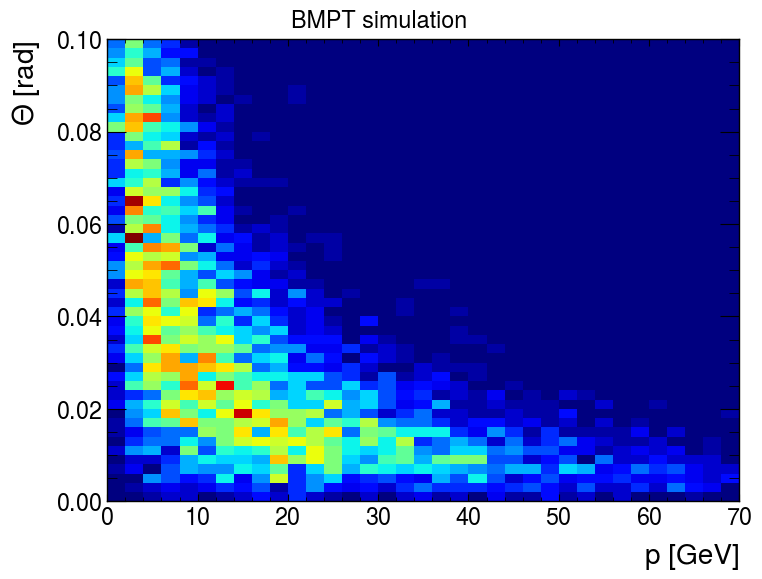

In [90]:
fig, ax = plt.subplots()
ax.hist2d(p_bmpt, theta_bmpt, bins=[np.linspace(0, 70, 36), np.linspace(0, 0.1, 51)],cmap='jet')
ax.set_ylabel('$\Theta$ [rad]')
ax.set_xlabel('p [GeV]')
ax.set_ylim((0, 0.1))
ax.set_xlim((0, 70))
fig.suptitle('BMPT simulation')
fig.show()

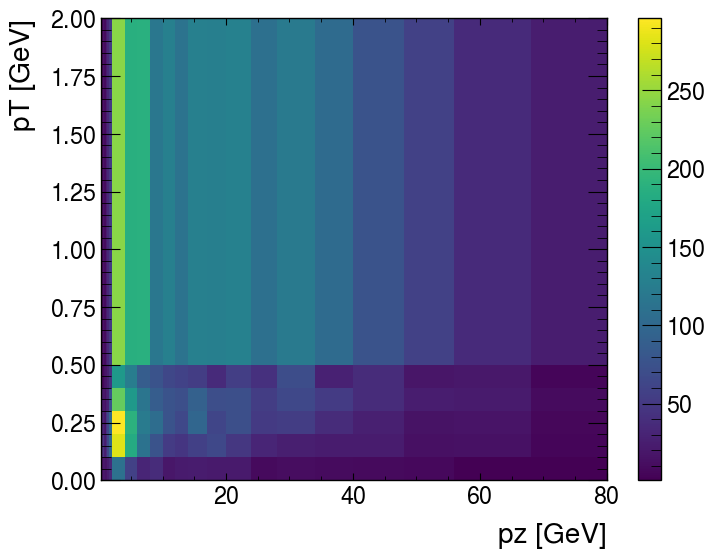

In [52]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_bmpt, pT_bmpt, bins=[bins_pz, bins_pT])
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.colorbar(h[3], ax=ax)

fig.show()

In [247]:
bmpt_hist, xedges, yedges = np.histogram2d(pz_bmpt, pT_bmpt, bins=[bins_pz, bins_pT])
#for i in range(len(MIPP_avg)):
#    for j in range(len(MIPP_avg[i])):
#        if MIPP_avg[i][j] == 0:
#            bmpt_hist[i][j] = 0

bmpt_hist_norm = 0.9*bmpt_hist/np.sum(bmpt_hist) #normalize distribution to 0.9 pi0/POT

ratio = np.zeros_like(bmpt_hist)
for i in range(len(ratio)):
    for j in range(len(ratio[i])):
        if bmpt_hist_norm[i][j] != 0:
            ratio[i][j] = MIPP_avg[i][j] / bmpt_hist_norm[i][j]

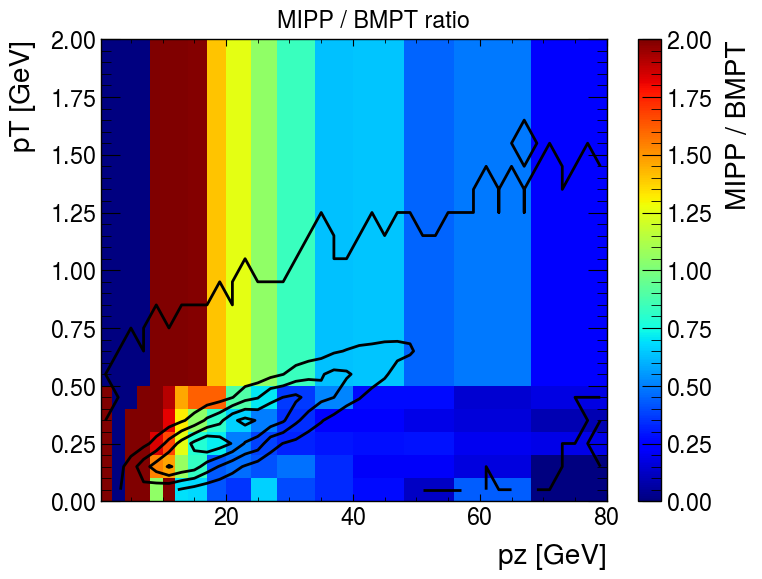

Percentage of events in contour: 71.78649698910012
 
MIPP / BMPT ratios in contour
-----------------------------
2.5182553713934928
2.1658561507936507
1.5424141414141415
1.8429566137566138
1.4717869658119658
1.67131432748538
1.0673612293144208
1.2522094017094016
0.8237910331384014
0.78805372279496
1.0526621489621488
0.42328205128205126
0.7181571684587813
0.8182956181533647
0.4661981481481482
0.4923103395061728
0.6572629629629629
0.8929327272727273
0.38033137254901955
0.49662431865828094
0.7053021164021165
0.3428584615384615
0.363521578099839
0.5142373015873016
-----------------------------
Average ratio: 0.9778323029664086


In [241]:
HH, xe, ye = np.histogram2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2

fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
rat = ax.pcolormesh(X, Y, ratio.T,cmap='jet',vmin=0, vmax=2)
cs = ax.contour(*midpoints, grid, levels=4, colors='k', zorder=40)
cbar = fig.colorbar(rat)
cbar.set_label('MIPP / BMPT')
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP / BMPT ratio')
plt.show()

dat = cs.allsegs[1][0]
ldmevents = 0
totalevents = 0
path = mpl.path.Path(dat)
for i in range(len(HH)):
    for j in range(len(HH[i])):
        xmid = (xe[i] + xe[i+1])/2
        ymid = (ye[j] + ye[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            ldmevents += HH[i][j]
        totalevents += HH[i][j]
print("Percentage of events in contour:", 100*ldmevents/totalevents)
print(" ")

print("MIPP / BMPT ratios in contour")
print("-----------------------------")
binvalues = []
for i in range(len(ratio)):
    for j in range(len(ratio[i])):
        xmid = (bins_pz[i] + bins_pz[i+1])/2
        ymid = (bins_pT[j] + bins_pT[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            print(ratio[i][j])
            binvalues.append(ratio[i][j])
print("-----------------------------")
print("Average ratio:", np.mean(binvalues))

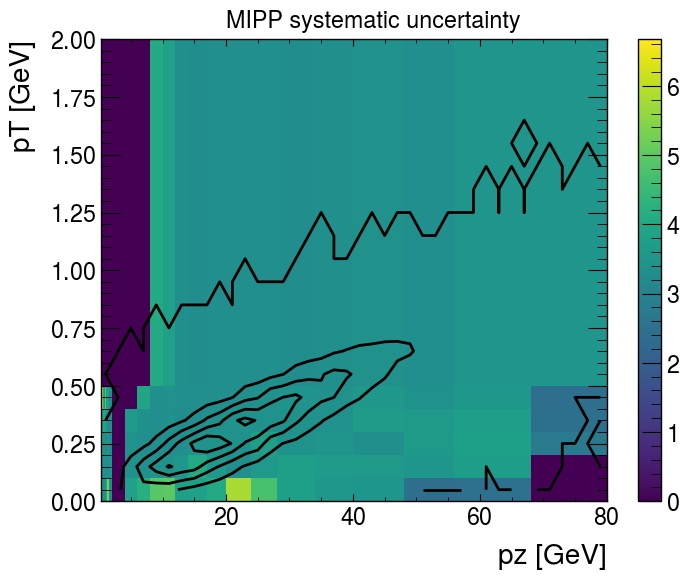

MIPP systematic uncertainty in contour
-----------------------------
3.388104189661233 %
3.3923480069120266 %
3.4401199107007883 %
3.3305029650189475 %
3.409904690750168 %
3.270370774086633 %
3.525567330232114 %
3.3023779311278108 %
4.058386378845661 %
3.4279184646079317 %
3.326954312881378 %
3.601617692093374 %
3.450815121098202 %
3.344622549705721 %
3.319958584079025 %
3.3808652738611156 %
3.4391641426369866 %
3.288054135807377 %
3.7370610110085174 %
3.362339215486742 %
3.3556407733844216 %
3.38485228628961 %
3.448514172799642 %
3.3448019373350046 %
-----------------------------
Average: 3.4304525771004344 % systematic uncertainty


In [237]:
fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
systmap = ax.pcolormesh(X, Y, MIPP_avg_syst.T)
cs = ax.contour(*midpoints, grid, levels=4, colors='k', zorder=40)
cbar = fig.colorbar(systmap)
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP systematic uncertainty')
plt.show()

print("MIPP systematic uncertainty in contour")
print("-----------------------------")
binvalues = []
for i in range(len(MIPP_avg_syst)):
    for j in range(len(MIPP_avg_syst[i])):
        xmid = (bins_pz[i] + bins_pz[i+1])/2
        ymid = (bins_pT[j] + bins_pT[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            print(MIPP_avg_syst[i][j],"%")
            binvalues.append(MIPP_avg_syst[i][j])
print("-----------------------------")
print("Average:", np.mean(binvalues), "% systematic uncertainty")

In [248]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

Etheta2_vals = []
Etheta2_weights = []

E_vals = []
theta_vals = []

allevents = 0
goodevents = 0

for f in files:
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("event"):
                    CurrentEventNumber = int(line.split("event ")[1])
                if line.startswith("pion"):                    
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]
                    
                    allevents += 1
                    for pzi in range(len(ratio)):
                        if pz >= bins_pz[pzi] and pz < bins_pz[pzi+1]:
                            for pTi in range(len(ratio[pzi])):
                                if pT > bins_pT[pTi] and pT < bins_pT[pTi+1]:
                                    if ratio[pzi][pTi] < 10 and ratio[pzi][pTi] > 0:
                                        goodevents += 1                                        
                                        OnCurrentEvent = False
                                        for line2 in fi:
                                            if line2.startswith("event"):
                                                ThisEventNumber = int(line2.split("event ")[1])
                                                if ThisEventNumber == CurrentEventNumber:
                                                    OnCurrentEvent = True
                                                else:
                                                    continue
                                                    
                                            if not OnCurrentEvent:
                                                if line2.startswith("electron"):
                                                    rline = line2[15:]
                                                    val   = rline.split()
                                                    if val:
                                                        val = [float(i) for i in val]
                                                    theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                                    E = val[3]                                                    
                                                    Etheta2_vals.append(E*theta*theta)
                                                    Etheta2_weights.append(ratio[pzi][pTi])
                                                    
                                                    E_vals.append(E)
                                                    theta_vals.append(theta)
                                                if line2.startswith("endevent"):
                                                    break
                                    else:
                                        OnCurrentEvent = False
                                        for line2 in fi:
                                            if line2.startswith("event"):
                                                ThisEventNumber = int(line2.split("event ")[1])
                                                if ThisEventNumber == CurrentEventNumber:
                                                    OnCurrentEvent = True
                                                else:
                                                    continue
                                                    
                                            if not OnCurrentEvent:
                                                if line2.startswith("electron"):
                                                    rline = line2[15:]
                                                    val   = rline.split()
                                                    if val:
                                                        val = [float(i) for i in val]
                                                    theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                                    E = val[3]                                                    
                                                    Etheta2_vals.append(E*theta*theta)
                                                    Etheta2_weights.append(1)
                                                    
                                                    E_vals.append(E)
                                                    theta_vals.append(theta)
                                                if line2.startswith("endevent"):
                                                    break
                    

print("Number of events skipped:", allevents - goodevents)
print("Percentage of events skipped:", 100*(allevents-goodevents)/allevents)

Process 19 masses
Number of events skipped: 17891
Percentage of events skipped: 1.9878888888888888


In [214]:
Etheta2_nominal = []
E_nominal = []
theta_nominal = []
for f in files:
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("event"):
                    CurrentEventNumber = int(line.split("event ")[1])
                if line.startswith("electron"):                    
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                    E = val[3] 
                    Etheta2_nominal.append(E*theta*theta)
                    E_nominal.append(E)
                    theta_nominal.append(theta)

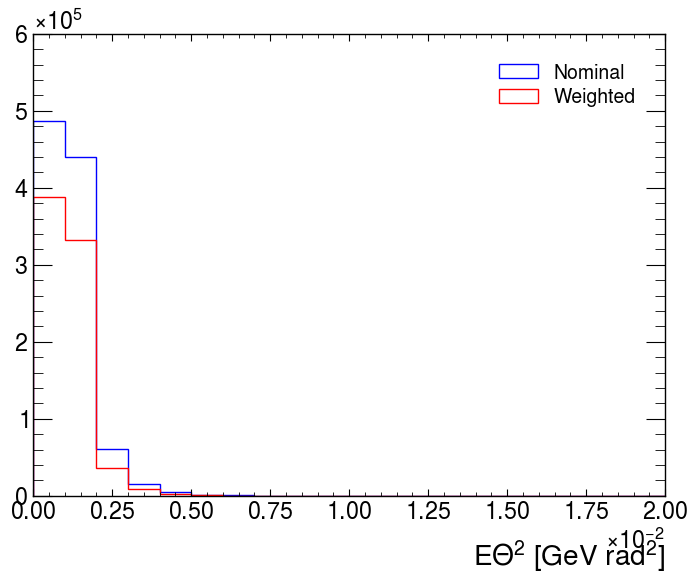

In [249]:
fig, ax = plt.subplots()
ax.hist(Etheta2_nominal, bins=np.linspace(0, 0.02, 21), color='blue', histtype='step',label='Nominal')
ax.hist(Etheta2_vals, bins=np.linspace(0, 0.02, 21), weights=Etheta2_weights, color='red',histtype='step',label='Weighted')
ax.set_xlabel('E$\Theta^2$ [GeV rad$^2$]')
#ax.set_yscale('log')
ax.legend()
fig.show()

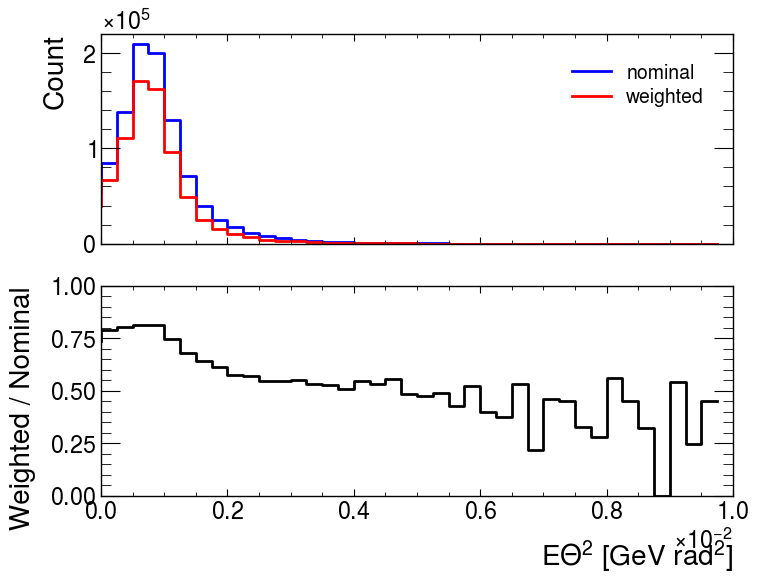

In [252]:
nominal, edges = np.histogram(Etheta2_nominal, bins=np.linspace(0, 0.01, 41))
weighted, edges = np.histogram(Etheta2_vals, bins=np.linspace(0, 0.01, 41), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.step(edges[:-1], nominal, color='blue',label='nominal')
ax0.step(edges[:-1], weighted, color='red', label='weighted')
ax1.set_xlabel('E$\Theta^2$ [GeV rad$^2$]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylim((0,2.2e5))
ax1.set_ylim((0,1))
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()

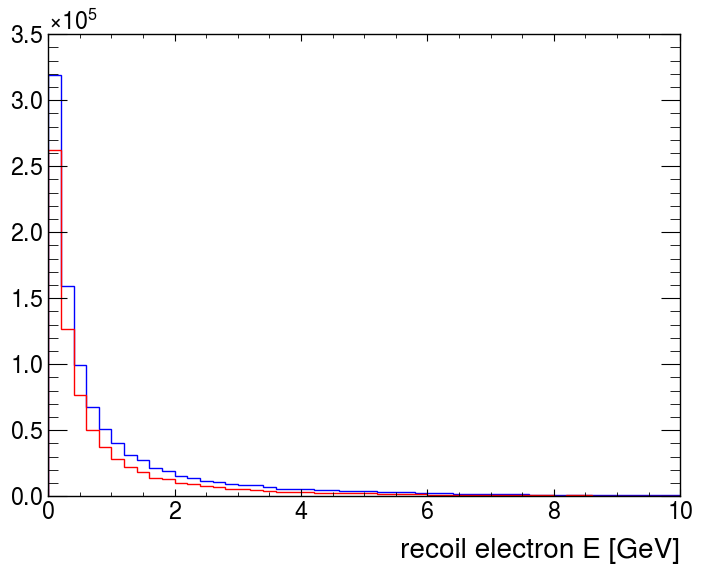

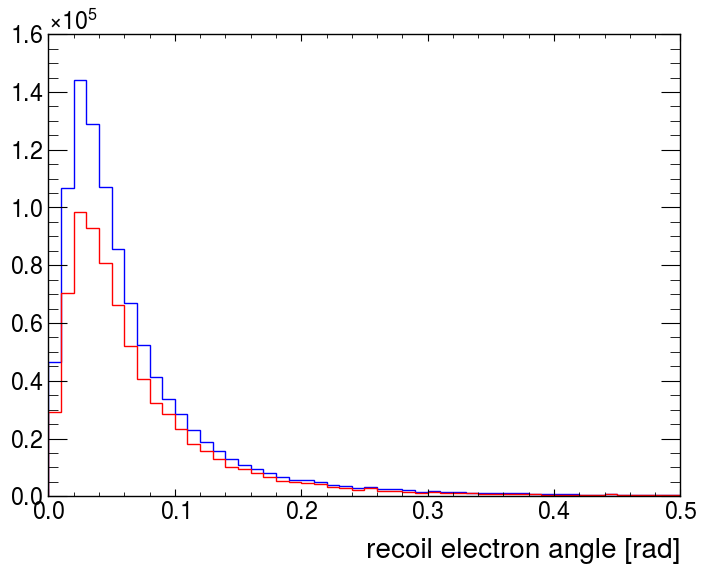

In [243]:
fig, ax = plt.subplots()
ax.hist(E_nominal, bins=np.linspace(0, 10, 51), color='blue', histtype='step',label='nominal')
ax.hist(E_vals, bins=np.linspace(0,10,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax.set_xlabel('recoil electron E [GeV]')
#ax.set_yscale('log')
fig.show()

fig, ax = plt.subplots()
ax.hist(theta_nominal, bins=np.linspace(0, 0.5, 51), color='blue', histtype='step',label='Nominal')
ax.hist(theta_vals, bins=np.linspace(0,0.5,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax.set_xlabel('recoil electron angle [rad]')
#ax.set_yscale('log')
fig.show()

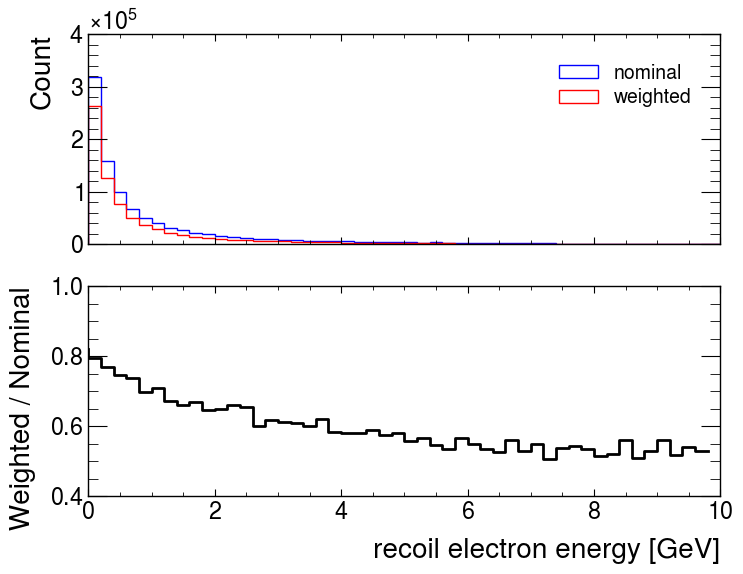

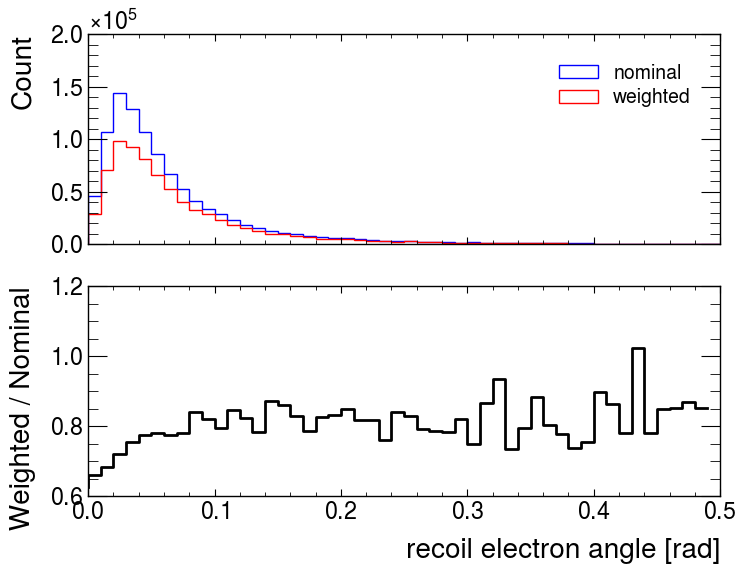

In [245]:
nominal, edges = np.histogram(E_nominal, bins=np.linspace(0, 10, 51))
weighted, edges = np.histogram(E_vals, bins=np.linspace(0, 10, 51), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(E_nominal, bins=np.linspace(0, 10, 51), color='blue', histtype='step',label='nominal')
ax0.hist(E_vals, bins=np.linspace(0,10,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax1.set_xlabel('recoil electron energy [GeV]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()

nominal, edges = np.histogram(theta_nominal, bins=np.linspace(0, 0.5, 51))
weighted, edges = np.histogram(theta_vals, bins=np.linspace(0, 0.5, 51), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(theta_nominal, bins=np.linspace(0, 0.5, 51), color='blue', histtype='step',label='nominal')
ax0.hist(theta_vals, bins=np.linspace(0,0.5,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax1.set_xlabel('recoil electron angle [rad]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()